In [2]:
import pandas as pd # 引用套件並縮寫為 pd  
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math

from sklearn.model_selection import train_test_split       #split data
from sklearn.experimental import enable_iterative_imputer  #deal with missing data
from sklearn.impute import IterativeImputer                #deal with missing data
from sklearn.model_selection import KFold                  #deal with validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn import neighbors
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.datasets import make_regression


import seaborn as sns                                      #deal with heatmap

In [3]:
df99 = pd.read_csv('data/akari_data.csv', low_memory=False)

In [4]:
target250 = pd.read_csv('data/target250.csv', low_memory=False,index_col=0)
target350 = pd.read_csv('data/target350.csv', low_memory=False,index_col=0)
target500 = pd.read_csv('data/target500.csv', low_memory=False,index_col=0)
targeterr250 = pd.read_csv('data/targeterr250.csv', low_memory=False,index_col=0)
targeterr350 = pd.read_csv('data/targeterr350.csv', low_memory=False,index_col=0)
targeterr500 = pd.read_csv('data/targeterr500.csv', low_memory=False,index_col=0)

In [5]:
train250 = pd.read_csv('data/train250.csv', low_memory=False,index_col=0)
train350 = pd.read_csv('data/train350.csv', low_memory=False,index_col=0)
train500 = pd.read_csv('data/train500.csv', low_memory=False,index_col=0)
trainerr250 = pd.read_csv('data/trainerr250.csv', low_memory=False,index_col=0)
trainerr350 = pd.read_csv('data/trainerr350.csv', low_memory=False,index_col=0)
trainerr500 = pd.read_csv('data/trainerr500.csv', low_memory=False,index_col=0)
train250z = pd.read_csv('data/train250 with z.csv', low_memory=False,index_col=0)
train350z = pd.read_csv('data/train350 with z.csv', low_memory=False,index_col=0)
train500z = pd.read_csv('data/train500 with z.csv', low_memory=False,index_col=0)

In [6]:
xgbtrain250 = pd.read_csv('data/xgbtrain250.csv', low_memory=False,index_col=0)
xgbtrain350 = pd.read_csv('data/xgbtrain350.csv', low_memory=False,index_col=0)
xgbtrain500 = pd.read_csv('data/xgbtrain500.csv', low_memory=False,index_col=0)

In [7]:
spec_train_250 = pd.read_csv('data/specz/spec_train_250.csv', low_memory=False,index_col=0)
spec_train_350 = pd.read_csv('data/specz/spec_train_350.csv', low_memory=False,index_col=0)
spec_train_500 = pd.read_csv('data/specz/spec_train_500.csv', low_memory=False,index_col=0)

spec_target_250 = pd.read_csv('data/specz/spec_target_250.csv', low_memory=False,index_col=0)
spec_target_350 = pd.read_csv('data/specz/spec_target_350.csv', low_memory=False,index_col=0)
spec_target_500 = pd.read_csv('data/specz/spec_target_500.csv', low_memory=False,index_col=0)

In [8]:
# train_imp = pd.read_csv('data/train_imp.csv',low_memory=False,index_col=0)
test_imp = pd.read_csv('data/test_imp.csv',low_memory=False,index_col=0)
# trainerr_imp = pd.read_csv('data/trainerr_imp.csv',low_memory=False,index_col=0)
testerr_imp = pd.read_csv('data/testerr_imp.csv',low_memory=False,index_col=0)

testz = pd.read_csv('data/testz.csv',low_memory=False,index_col=0)
testz_imp = pd.read_csv('data/test_imp_z.csv',low_memory=False,index_col=0)

In [9]:
complete=pd.read_csv('data/wide/Completeness_SPIRE_chris.csv',header=None,error_bad_lines=False)

In [10]:
weight = pd.read_csv('data/weight/weight bin=0.5 N2 only.csv',index_col=0)
df_bins = pd.read_csv('data/weight/bin bin=0.5.csv',index_col=0)

In [11]:
sigma3_target250=target250[target250['m250']<12.82]
sigma3_target350=target350[target350['m350']<13.02]
sigma3_target500=target500[target500['m500']<12.62]

sigma3_train250=train250z.reindex(pd.Index(sigma3_target250.index))
sigma3_train350=train350z.reindex(pd.Index(sigma3_target350.index))
sigma3_train500=train500z.reindex(pd.Index(sigma3_target500.index))

spec_sigma3_target250=spec_target_250[spec_target_250['m250']<12.82]
spec_sigma3_target350=spec_target_350[spec_target_350['m350']<13.02]
spec_sigma3_target500=spec_target_500[spec_target_500['m500']<12.62]

spec_sigma3_train250=spec_train_250.reindex(pd.Index(spec_sigma3_target250.index))
spec_sigma3_train350=spec_train_350.reindex(pd.Index(spec_sigma3_target350.index))
spec_sigma3_train500=spec_train_500.reindex(pd.Index(spec_sigma3_target500.index))


In [12]:
len(spec_sigma3_target500),len(spec_sigma3_target250),len(spec_sigma3_target350)

(6, 173, 109)

In [13]:
len(sigma3_target500),len(sigma3_target250),len(sigma3_target350)

(152, 1389, 946)

In [48]:
np.min(sigma3_target250),np.min(sigma3_target350),np.min(sigma3_target500)

(m250    10.481
 dtype: float64,
 m350    10.924
 dtype: float64,
 m500    11.246
 dtype: float64)

In [10]:
bins_N2=df_bins.loc[0]
bins_N2=bins_N2.dropna()
# bins_N2
weight_N2=weight.loc[2].dropna()
# weight_N2

In [11]:
# weight=pd.read_csv('data/weight/weight bin=0.5 total.csv',index_col=0)
# weight

(4.8839999999999995, -1.0)

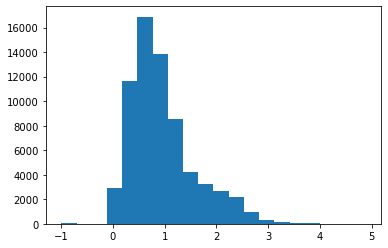

In [12]:
plt.hist(testz['z'],bins=20)
np.max(testz['z']),np.min(testz['z'])

(4.377, -0.003)

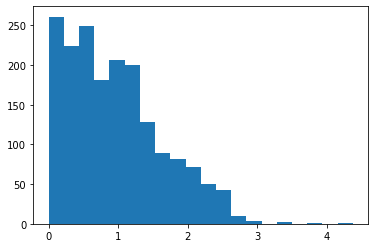

In [13]:
plt.hist(train250z['z'],bins=20)
np.max(train250z['z']),np.min(train250z['z'])

In [14]:
from astropy.cosmology import WMAP9 as cosmo
cosmo.H0

<Quantity 69.32 km / (Mpc s)>

In [15]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

In [16]:
cosmo.luminosity_distance(4)

<Quantity 35842.353288 Mpc>

In [17]:
DL=cosmo.luminosity_distance(train250z['z'])
df_DL=pd.DataFrame(DL)
# df_DL.set_index(train250z.index,inplace=True)

In [18]:
f=10**((train250-8.9)/-2.5)
L=f.mul((4*np.pi*df_DL**2).values,axis='index')

targetf=10**((target250-8.9)/-2.5)
targetL=targetf.mul((4*np.pi*df_DL**2).values,axis='index')


In [19]:
modz=np.array([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
modDL=cosmo.luminosity_distance(modz)
df_modDL=pd.DataFrame(modDL)
# df_modDL

In [20]:
# target250[:20],target350[:20],target500[:20]

In [21]:
for i, a in enumerate(df_modDL[0]):
    print(i,a)
    modf=L/4/np.pi/a**2
    mAB=-2.5*np.log10(modf) + 8.9
    mAB.to_csv(f'data/faint/train250 for z = {modz[i]}.csv')
    
for i, a in enumerate(df_modDL[0]):
    print(i,a)
    modf=targetL/4/np.pi/a**2
    mAB=-2.5*np.log10(modf) + 8.9
    mAB.to_csv(f'data/faint/target250 for z = {modz[i]}.csv')

0 2832.8066645306358
1 6607.052884981937


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


2 10908.214995766886
3 15537.037407590691
4 20392.45569870883
5 25417.16938116146
6 30575.25056398365
7 35842.35328799687
8 41200.99631077419
9 46638.0695919651
0 2832.8066645306358
1 6607.052884981937
2 10908.214995766886
3 15537.037407590691
4 20392.45569870883
5 25417.16938116146
6 30575.25056398365
7 35842.35328799687
8 41200.99631077419
9 46638.0695919651


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


In [22]:
train_data=dict()
for i in modz:
    train_data[f'{i}'] =  pd.read_csv(f'data/faint/train250 for z = {i}.csv',index_col=0)
    
target_data=dict()
for i in modz:
    target_data[f'{i}'] =  pd.read_csv(f'data/faint/target250 for z = {i}.csv',index_col=0)

In [23]:
# target_data[f'{modz[0]}']

In [24]:
wl=[0.48,0.62,0.77,0.91,0.98,2.4,3.2,4.1,7,9,11,15,18,24,3.6,4.6,3.6,4.5,250]
modz=np.array([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])

for j in range(5):
    for i in modz:
    #     plt.plot(wl,train_data[f'{i}'].iloc[0].T,'o',250,target_data[f'{i}'].iloc[0],'o',label=[f'z={i}'])
        plt.plot(wl,pd.concat([train_data[f'{i}'].iloc[j].T,target_data[f'{i}'].iloc[j]]),'o',label=[f'z={i}'])
    #     plt.plot(250,target_data[f'{i}'].iloc[0],'o')
    # plt.plot(wl,train_data['1.0'].iloc[0].T,'x')
    # plt.plot(wl,train_data['1.5'].iloc[0].T,'x')
    # plt.plot(wl,train_data['2.0'].iloc[0].T,'x')
        plt.legend()

    plt.semilogx()
    plt.axhline(y=14)
    plt.xlabel('wavelength (um)')
    plt.ylabel('m_AB(mag)')
    plt.title('k correction sample')
#     plt.savefig(f'result/faint/galaxy sample_{j}')
    plt.close()

In [25]:
pd.concat([train_data[f'{i}'].iloc[0].T,target_data[f'{i}'].iloc[0]])

GCm     28.592330
RCm     27.109330
ICm     26.004602
ZCm     25.562869
YCm     25.234199
N2m     24.421330
N3m     24.107330
N4m     24.733330
S7m     26.071222
S9m     23.956330
S11m    23.132330
L15m    23.603330
L18m    23.385330
L24m    23.298510
w1m     24.384330
w2m     24.860330
ir1     24.454330
ir2     24.670330
m250    17.610330
Name: 21, dtype: float64

In [26]:
# # x=0
# # df_weight['weight']=pd.DataFrame(data=x)
# # df_weight=[0 for i in range(1800)]
# df_weight=[]
# for i in range(len(train250z['N2m'])):
#     bmin=min(bins_N2)
#     j=0
# #     if train250z['N2m'].iloc[i] < bmin: 
# #         df_weight.append(weight_N2.iloc(j))
# #         break
# #     else: 
# #         bmin=bmin+0.5
# #         j=j+1  
        
        
#     while train250z['N2m'].iloc[i] > bmin:
#         df_weight[i].append(weight_N2.iloc[j])
#         j=j+1
#         bmin=bmin+0.5
    

In [14]:
# x=0
# df_weight['weight']=pd.DataFrame(data=x)
df_weight=[0 for i in range(1800)]
# df_weight=[0 for i in range(1800)]
for i in range(len(train250z['N2m'])):
    bmin=min(bins_N2)
    j=0
#     if train250z['N2m'].iloc[i] < bmin: 
#         df_weight.append(weight_N2.iloc(j))
#         break
#     else: 
#         bmin=bmin+0.5
#         j=j+1  
        
        
    while train250z['N2m'].iloc[i] > bmin:
        df_weight[i]=weight_N2.iloc[j]
        j=j+1
        bmin=bmin+0.5
    
    
# len(weight_N2)
# df_weight[1]=1
df_weight=np.array(df_weight)

NameError: name 'bins_N2' is not defined

In [15]:
fulltrain250=xgbtrain250[xgbtrain250.count(axis='columns') > 17]
fulltrain350=xgbtrain350[xgbtrain350.count(axis='columns') > 17]
fulltrain500=xgbtrain500[xgbtrain500.count(axis='columns') > 17]
print(len(fulltrain250),len(fulltrain350),len(fulltrain500))



fulltarget250=target250['m250'].loc[fulltrain250.index].to_frame()
fulltarget350=target350['m350'].loc[fulltrain350.index].to_frame()
fulltarget500=target500['m500'].loc[fulltrain500.index].to_frame()

387 368 198


In [16]:
inicname=list(train250.columns)
colortrain=dict()
colortarget=dict()
# print(inicname[0]+'_'+inicname[1])

for i,a in enumerate(inicname):
    colortarget[a+'_SPIRE250']=train250[a]-target250['m250']
    for j,b in enumerate(inicname):
        if j>i:
#             print(a+'_'+b)
            colortrain[a+'_'+b]=train250[a]-train250[b]
#             print(i,j)


colortrain=pd.DataFrame(colortrain)
colortarget=pd.DataFrame(colortarget)
# colortarget

In [17]:
inicname=list(train250.columns)
# inicname[5:14]

fullcolortrain250=dict()
fullcolortrain350=dict()
fullcolortrain500=dict()
# fullcolortarget250=dict()
# print(inicname[0]+'_'+inicname[1])

for i,a in enumerate(inicname):
    fullcolortrain250[a+'_SPIRE250']=fulltrain250[a]-fulltarget250['m250']
    fullcolortrain350[a+'_SPIRE350']=fulltrain350[a]-fulltarget350['m350']
    fullcolortrain500[a+'_SPIRE500']=fulltrain500[a]-fulltarget500['m500']
    
    
fullcolortrain250=pd.DataFrame(fullcolortrain250)
fullcolortrain350=pd.DataFrame(fullcolortrain350)
fullcolortrain500=pd.DataFrame(fullcolortrain500)
# print(fullcolortrain250)



inicname1=list(spec_train_250.columns)
# inicname[5:14]

speccolortrain250=dict()
speccolortrain350=dict()
speccolortrain500=dict()
# speccolortarget250=dict()
# print(inicname[0]+'_'+inicname[1])

for i,a in enumerate(inicname1[:-1]):
    speccolortrain250[a+'_SPIRE250']=spec_train_250[a]-spec_target_250['m250']
    speccolortrain350[a+'_SPIRE350']=spec_train_350[a]-spec_target_350['m350']
    speccolortrain500[a+'_SPIRE500']=spec_train_500[a]-spec_target_500['m500']
    
    
speccolortrain250=pd.DataFrame(speccolortrain250)
speccolortrain350=pd.DataFrame(speccolortrain350)
speccolortrain500=pd.DataFrame(speccolortrain500)
# print(fullcolortrain250)

In [18]:

# plt.plot(target250['m250'],colortarget250[list(colortarget250.columns)[0]],'o')
for i,a in enumerate(inicname):
    if i >-11:
        plt.plot(fulltarget250['m250'],fullcolortrain250[list(fullcolortrain250.columns)[i]],'o')
        plt.xlabel('SPIRE250',fontsize=15)
        plt.ylabel(f'{list(fullcolortrain250.columns)[i]}',fontsize=15)
        plt.savefig(f'data/color/match/SPIRE250/{list(fullcolortrain250.columns)[i]}')
        plt.close()
        
        plt.plot(fulltarget350['m350'],fullcolortrain350[list(fullcolortrain350.columns)[i]],'o')
        plt.xlabel('SPIRE350',fontsize=15)
        plt.ylabel(f'{list(fullcolortrain350.columns)[i]}',fontsize=15)
        plt.savefig(f'data/color/match/SPIRE350/{list(fullcolortrain350.columns)[i]}')
        plt.close()        
        
        plt.plot(fulltarget500['m500'],fullcolortrain500[list(fullcolortrain500.columns)[i]],'o')
        plt.xlabel('SPIRE500',fontsize=15)
        plt.ylabel(f'{list(fullcolortrain500.columns)[i]}',fontsize=15)
        plt.savefig(f'data/color/match/SPIRE500/{list(fullcolortrain500.columns)[i]}')
        plt.close()
        
        
for i,a in enumerate(list(speccolortrain250.columns)):
    if i >-16:
#         plt.plot(fulltarget250['m250'],fullcolortrain250[list(fullcolortrain250.columns)[i]],'o')
        plt.plot(spec_target_250['m250'],speccolortrain250[a],'o')
        plt.xlabel('SPIRE250',fontsize=15)
        plt.ylabel(f'{a}',fontsize=15)
        plt.savefig(f'data/specz/color/match/SPIRE250/{a}')
        plt.close()
for i,a in enumerate(list(speccolortrain350.columns)):
    if i >-16:        
        plt.plot(spec_target_350['m350'],speccolortrain350[a],'o')
        plt.xlabel('SPIRE350',fontsize=15)
        plt.ylabel(f'{a}',fontsize=15)
        plt.savefig(f'data/specz/color/match/SPIRE350/{a}')
        plt.close()        
for i,a in enumerate(list(speccolortrain500.columns)):
    if i >-16:        
        plt.plot(spec_target_500['m500'],speccolortrain500[a],'o')
        plt.xlabel('SPIRE500',fontsize=15)
        plt.ylabel(f'{a}',fontsize=15)
        plt.savefig(f'data/specz/color/match/SPIRE500/{a}')
        plt.close()
        

In [19]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, f_regression
# X, y = load_digits(return_X_y=True)
X=colortrain
y=colortarget['N2m_SPIRE250']
# X.shape

%time feature_selection = SelectKBest(f_regression, k=10)

X_new=feature_selection.fit_transform(X, y)

Wall time: 0 ns


In [33]:
trainname=feature_selection.get_feature_names_out()
# trainname15=feature_selection.get_feature_names_out()
# trainname20=feature_selection.get_feature_names_out()
# colortrain[trainname15]
# trainname,trainname15,
# trainname20

In [34]:
# C=0.464
# gamma=0.07
# epsilon=0.1
# kernel='rbf'
# svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)

# X=colortrain
# y=colortarget['N2m_SPIRE250']
# svr_fit=svr.fit(X,y)

# %time r = permutation_importance(svr_fit,X,y,n_repeats=3,random_state=0)

# # x=np.array([i for i in range(19)])
# # r['importances_std']

# cname=list(colortrain.columns)
# lir_trainsz=['GCm','RCm','ICm','ZCm','YCm','N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','redshift']
# plt.barh(cname,r['importances_mean'],xerr=r['importances_std'])
# plt.xlabel('feature importance')
# plt.title('Permutation importance color')
# # plt.savefig('Permutation importance svr 19bands SPIRE250')


In [20]:
cwvalidtarget250=target250[target250['m250']>=13]
cwtarget250=target250[target250['m250']<13]

s12cwvalidtarget250=target250[target250['m250']>=12.5]
s12cwtarget250=target250[target250['m250']<12.5]


# 11-13 predict 11-14
p1=target250[target250['m250']<=13][:741]
p2=target250[target250['m250']<=13][741:]
p3=target250[target250['m250']>13]

target=p2
validtarget=pd.concat([p1,p3])
train=train250z.loc[target['m250'].index]
validtrain=train250z.loc[validtarget['m250'].index]


cwtrain250=train250z.loc[cwtarget250['m250'].index]
cwvalidinput250=train250z.loc[cwvalidtarget250['m250'].index]


s12cwtrain250=train250z.loc[s12cwtarget250['m250'].index]
s12cwvalidinput250=train250z.loc[s12cwvalidtarget250['m250'].index]

In [21]:
# color faint, bright sources
# colorbrighttarget=colortarget['N2m_SPIRE250'].loc[cwtarget250['m250'].index]
# colorfainttarget=colortarget['N2m_SPIRE250'].loc[cwvalidtarget250['m250'].index]
colorbrighttarget=colortarget.loc[cwtarget250['m250'].index]
colorfainttarget=colortarget.loc[cwvalidtarget250['m250'].index]

colorbrighttrain=colortrain[trainname].loc[cwtarget250['m250'].index]
colorfainttrain=colortrain[trainname].loc[cwvalidtarget250['m250'].index]

NameError: name 'trainname' is not defined

In [37]:
len(cwvalidtarget250)

318

In [38]:
# colorbrighttrain.to_csv('data/color/bright_train.csv')
# colorbrighttarget.to_csv('data/color/bright_target.csv')
# colorfainttrain.to_csv('data/color/faint_train.csv')
# colorfainttarget.to_csv('data/color/faint_target.csv')


In [39]:
iniweight = pd.read_csv('result/color/weight/weight total bin=0.5.csv',index_col=0)
inibins = pd.read_csv('result/color/weight/bin bin=0.5.csv',index_col=0)

norweight= pd.read_csv('result/color/weight/nor weight total bin=0.1.csv',index_col=0)
norbins= pd.read_csv('result/color/weight/nor bin bin=0.1.csv',index_col=0)

In [40]:
iniweight.iloc[0][2]

1.1954887220000001

In [41]:
# iniweight.iloc[0]

In [42]:
colorbrighttrain[trainname[0]].iloc[1]

2.362424734811711

In [43]:
colorbrighttrain[trainname[0]]

21       2.401272
105      2.362425
235      7.961000
353      2.620406
381      3.820000
           ...   
91153    6.869000
91331    6.253000
91374    3.830773
91690    1.949000
91860    8.027189
Name: ICm_L15m, Length: 1482, dtype: float64

In [44]:
df_iniweight=[0 for i in range(len(colorbrighttrain[trainname[0]]))]
# df_weight=[0 for i in range(1800)]
for i in range(len(colorbrighttrain[trainname[0]])):
    bmin=np.min(inibins.iloc[0])
    j=0
#     if train250z['N2m'].iloc[i] < bmin: 
#         df_weight.append(weight_N2.iloc(j))
#         break
#     else: 
#         bmin=bmin+0.5
#         j=j+1  
        
        
    while colorbrighttrain[trainname[0]].iloc[i] >= bmin:
        df_iniweight[i]=iniweight.iloc[0][j]
        j=j+1
        bmin=bmin+0.5
    
    
# len(weight_N2)
# df_weight[1]=1
df_iniweight=np.array(df_iniweight)

In [45]:
len(df_iniweight)

1482

In [46]:
# colorbrighttrain
targetname=list(colortarget.columns)
targetname=targetname[5:14]

norcolorbrighttrain=dict()
norcolorfainttrain=dict()
norcolorbrighttarget=dict()
norcolorfainttarget=dict()
for  i,a in enumerate(trainname):
    maximum=np.max([np.max(colorbrighttrain[a]),np.max(colorfainttrain[a])])
    minimum=np.min([np.min(colorbrighttrain[a]),np.min(colorfainttrain[a])])
    
    norcolorbrighttrain[a] = (colorbrighttrain[a]-minimum)/(maximum-minimum)
    norcolorfainttrain[a] = (colorfainttrain[a]-minimum)/(maximum-minimum)
    
norcolorbrighttrain=pd.DataFrame(norcolorbrighttrain)
norcolorfainttrain=pd.DataFrame(norcolorfainttrain)

for  i,a in enumerate(targetname):
    maximum=np.max([np.max(colorbrighttarget[a]),np.max(colorfainttarget[a])])
    minimum=np.min([np.min(colorbrighttarget[a]),np.min(colorfainttarget[a])])
    
    norcolorbrighttarget[a] = (colorbrighttarget[a]-minimum)/(maximum-minimum)
    norcolorfainttarget[a] = (colorfainttarget[a]-minimum)/(maximum-minimum)

norcolorbrighttarget=pd.DataFrame(norcolorbrighttarget)
norcolorfainttarget=pd.DataFrame(norcolorfainttarget)


# norcolorbrighttrain
# norcolorfainttarget


In [47]:
# norcolorbrighttrain.to_csv('data/color/nor_bright_train.csv')
# norcolorbrighttarget.to_csv('data/color/nor_bright_target.csv')
# norcolorfainttrain.to_csv('data/color/nor_faint_train.csv')
# norcolorfainttarget.to_csv('data/color/nor_faint_target.csv')


In [48]:
from sklearn import linear_model
from sklearn import neighbors
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


In [49]:
fulltarget250

,m250
381,12.016
613,11.656
914,12.176
948,12.403
1117,12.520
...,...
89323,12.135
90291,12.401
90361,12.487
90553,11.823


In [22]:
# fulltrain250,fulltarget250
# fulltarget=[fulltarget250,fulltarget350,fulltarget500]
fulltarget=[fulltarget250['m250'],fulltarget350['m350'],fulltarget500['m500']]
spectarget=[spec_target_250['m250'],spec_target_350['m350'],spec_target_500['m500']]
target=[target250['m250'],target350['m350'],target500['m500']]

fullweight_temp=[[] for i in range(3)]
for k,b in enumerate(fulltarget):
    ax=plt.hist(b,density=True)
    # ax[0],ax[1]
    ax0=[0 for i in range(len(ax[0]))]
    for i in range(len(ax[0])):
        ax0[i]=1.0/ax[0][i]
#     print(ax0)
    weight_temp=np.array([0.0 for i in range(len(b))])
    for i,a in enumerate(b):
        for j in range(len(ax[0])):
            if a > ax[1][j]:
                weight_temp[i]=ax0[j]
    plt.close()
#     print(weight_temp)
    fullweight_temp[k]=(weight_temp)
fullweight250=fullweight_temp[0]
fullweight350=fullweight_temp[1]
fullweight500=fullweight_temp[2]
                
    
    
fullweight_temp=[[] for i in range(3)]
for k,b in enumerate(target):
    ax=plt.hist(b,density=True)
    # ax[0],ax[1]
    ax0=[0 for i in range(len(ax[0]))]
    for i in range(len(ax[0])):
        ax0[i]=1.0/ax[0][i]
#     print(ax0)
    weight_temp=np.array([0.0 for i in range(len(b))])
    for i,a in enumerate(b):
        for j in range(len(ax[0])):
            if a > ax[1][j]:
                weight_temp[i]=ax0[j]
    plt.close()
#     print(weight_temp)
    fullweight_temp[k]=(weight_temp)
weight250=fullweight_temp[0]
weight350=fullweight_temp[1]
weight500=fullweight_temp[2]


fullweight_temp=[[] for i in range(3)]
for k,b in enumerate(spectarget):
    ax=plt.hist(b,density=True)
    # ax[0],ax[1]
    ax0=[0 for i in range(len(ax[0]))]
    for i in range(len(ax[0])):
        ax0[i]=1.0/ax[0][i]
#     print(ax0)
    weight_temp=np.array([0.0 for i in range(len(b))])
    for i,a in enumerate(b):
        for j in range(len(ax[0])):
            if a > ax[1][j]:
                weight_temp[i]=ax0[j]
    plt.close()
#     print(weight_temp)
    fullweight_temp[k]=(weight_temp)
specweight250=fullweight_temp[0]
specweight350=fullweight_temp[1]
specweight500=fullweight_temp[2]

In [36]:
# model=[linear_train,knn_train,DT,RF,XGB,MLP]
model={'linear regression':linear_train,'k nearest neighbor':knn_train ,'decision tree':DT,'random forest':RF, 'xgboost':XGB,'multi-layer perceptron':MLP,'Support vector machine':svr}
model_type=['linear regression','k nearest neighbor','decision tree','random forest','xgboost','multi-layer perceptron','Support vector machine']
# model[model_type[3]]()[:2]

train=[train250z,train350z,train500z]
target=[target250['m250'],target350['m350'],target500['m500']]
targetband=['SPIRE250','SPIRE350','SPIRE500']
def model_train(X=train,y=target,weight=None):
    rmse=[]
    validate_result=[]
    validate_truth=[]
    for j in model_type:
        for i in range(3):
            if weight is None:
                result=model[j](X=X[i],y=y[i])
            else:
                result=model[j](X=X[i],y=y[i],weight=weight[i])
            
            rmse+=result[:2]
            validate_result+=[result[3][i*4] for i in range(10)]
            validate_truth+=[result[3][i*4+1]for i in range(10)]

#             flux_list,validate_rmse,train_rmse=result[3],result[0],result[1]
#             fig,ax = plt.subplots(1,2)
#             # plt.suptitle('SPIRE250 linear model 18 features')
#             plt.suptitle(f'{targetband[i]} {j} 18 features')
#             x = np.linspace(0, 3, 1000)
#             ax[0].plot(flux_list[1],flux_list[0],'o',markersize=2)
#             ax[0].plot(x+11, x+11 , linestyle='solid')
#             ax[0].set_xlabel(f'true {targetband[i]}(mag)')
#             ax[0].set_ylabel(f'predicted {targetband[i]}(mag)')
#             # ax[0].legend(['','y=x'])
#             ax[0].set_title('validate data')
#             ax[0].text(12,11,'RMSE='+str(validate_rmse)[0:5])

#             x = np.linspace(0, 3, 1000)
#             ax[1].plot(flux_list[3],flux_list[2],'o',markersize=2)
#             ax[1].plot(x+11, x+11 , linestyle='solid')
#             ax[1].set_xlabel(f'true {targetband[i]}(mag)')
#             #ax[1].set_ylabel('predict flux(mag)')
#             # ax[1].legend(['','y=x'])
#             ax[1].set_title('train data')
#             ax[1].text(12,11,'RMSE='+str(train_rmse)[0:5])

#             # svr_lin.get_params(deep=True)
#             # svr_lin_r=svr_lin.score(X_test,y_test),svr_lin.score(X_train,y_train)
#             #print(svr_r)

# #             plt.savefig(f'result/{targetband[i]} {j} 18 features')
#             plt.close
    return rmse,validate_result,validate_truth

In [38]:
train=[train250z,train350z,train500z]
target=[target250['m250'],target350['m350'],target500['m500']]
weight=[weight250,weight350,weight500]
%time modelre=model_train()

Wall time: 3min 34s


In [544]:
fulltrain=[fulltrain250,fulltrain350,fulltrain500]
fulltarget=[fulltarget250['m250'],fulltarget350['m350'],fulltarget500['m500']]
fullweight=[fullweight250,fullweight350,fullweight500]
%time fullmodelre=model_train(X=fulltrain,y=fulltarget,weight=fullweight)

Wall time: 43.6 s


In [189]:
spectrain=[spec_train_250,spec_train_350,spec_train_500]
spectarget=[spec_target_250['m250'],spec_target_350['m350'],spec_target_500['m500']]
specweight=[specweight250,specweight350,specweight500]
%time fullmodelre=model_train(X=spectrain,y=spectarget,weight=specweight)

Wall time: 12.5 s


In [37]:

sigma3train=[sigma3_train250,sigma3_train350,sigma3_train500]
sigma3target=[sigma3_target250['m250'],sigma3_target350['m350'],sigma3_target500['m500']]
# specweight=[specweight250,specweight350,specweight500]
%time fullmodelre=model_train(X=sigma3train,y=sigma3target)

Wall time: 2min 9s


In [47]:
np.min(sigma3_target500)

m500    11.246
dtype: float64

In [39]:
valid250=[modelre[1][i*30:i*30+10] for i in range(7)]
valid350=[modelre[1][i*30+10:i*30+20] for i in range(7)]
valid500=[modelre[1][i*30+20:i*30+30] for i in range(7)]

valid_truth250=[modelre[2][i*30:i*30+10] for i in range(7)]
valid_truth350=[modelre[2][i*30+10:i*30+20] for i in range(7)]
valid_truth500=[modelre[2][i*30+20:i*30+30] for i in range(7)]

rmse250=[modelre[0][i*6] for i in range(7)]
rmse350=[modelre[0][i*6+2] for i in range(7)]
rmse500=[modelre[0][i*6+4] for i in range(7)]



fullvalid250=[fullmodelre[1][i*30:i*30+10] for i in range(7)]
fullvalid350=[fullmodelre[1][i*30+10:i*30+20] for i in range(7)]
fullvalid500=[fullmodelre[1][i*30+20:i*30+30] for i in range(7)]

fullvalid_truth250=[fullmodelre[2][i*30:i*30+10] for i in range(7)]
fullvalid_truth350=[fullmodelre[2][i*30+10:i*30+20] for i in range(7)]
fullvalid_truth500=[fullmodelre[2][i*30+20:i*30+30] for i in range(7)]

fullrmse250=[fullmodelre[0][i*6] for i in range(7)]
fullrmse350=[fullmodelre[0][i*6+2] for i in range(7)]
fullrmse500=[fullmodelre[0][i*6+4] for i in range(7)]

In [40]:
v250=[[] for i in range(7)]
v350=[[] for i in range(7)]
v500=[[] for i in range(7)]

vt250=[[] for i in range(7)]
vt350=[[] for i in range(7)]
vt500=[[] for i in range(7)]

for i in range(7):
    for j in range(10):
        v250[i]+=valid250[i][j].tolist()
        v350[i]+=valid350[i][j].tolist()
        v500[i]+=valid500[i][j].tolist()
        
        vt250[i]+=valid_truth250[i][j].tolist()
        vt350[i]+=valid_truth350[i][j].tolist()
        vt500[i]+=valid_truth500[i][j].tolist()
        
        
len(vt250),len(v350),len(v500)



fullv250=[[] for i in range(7)]
fullv350=[[] for i in range(7)]
fullv500=[[] for i in range(7)]

fullvt250=[[] for i in range(7)]
fullvt350=[[] for i in range(7)]
fullvt500=[[] for i in range(7)]

for i in range(7):
    for j in range(10):
        fullv250[i]+=fullvalid250[i][j].tolist()
        fullv350[i]+=fullvalid350[i][j].tolist()
        fullv500[i]+=fullvalid500[i][j].tolist()
        
        fullvt250[i]+=fullvalid_truth250[i][j].tolist()
        fullvt350[i]+=fullvalid_truth350[i][j].tolist()
        fullvt500[i]+=fullvalid_truth500[i][j].tolist()
        
        
len(vt250),len(v350),len(v500)

(7, 7, 7)

In [192]:
# len(v250[0]),len(v250[1]),len(v350[0]),len(v350[0])
# for i in range(len(fullv250)):
#     print(len(fullvt250[i]),len(fullvt350[i]),len(fullvt500[i]))

In [41]:
model_name=['LR','KNN','DT','RF','Xgboost','MLP','SVM']
model_name250=['SPIRE250',*model_name]
model_name350=['SPIRE350',*model_name]
model_name500=['SPIRE500',*model_name]

In [132]:
len(fullvt250[1])

1389

In [ ]:
a=np.min(data_list['flux_list_true'])
b=np.max(data_list['flux_list_true'])
r=np.corrcoef(flux_list_true,flux_list_predict)[0][1]

In [151]:
fig,axs=plt.subplots(3,3,figsize=(30,20))
plt.suptitle('sigma3 SPIRE250 scattering for 7 models',fontsize=30)
for i in range(7):
    a=i//3
    b=i%3
    
    c=np.min(fullvt250[i])
    d=np.max(fullvt250[i])
#     r=np.corrcoef(flux_list_true,flux_list_predict)[0][1]
    x=np.linspace(c-0.2,d+0.2,1000)
    
    axs[a,b].plot(fullvt250[i],fullv250[i],'o',markersize=2)
    axs[a,b].plot( x , x ,linestyle='solid')
    
    axs[a,b].set_xlabel(f'True {model_name250[0]}',fontsize=16)
    axs[a,b].set_ylabel(f'Predicted {model_name250[0]}',fontsize=16)
    axs[a,b].text(c,d,f'{model_name[i]}',fontsize=16)
    axs[a,b].text(d-0.5,c,'RMSE='+str(fullrmse250[i])[0:5],fontsize=16)
axs[2,1].axis('off')
axs[2,2].axis('off')
# plt.savefig('result/full/weight full SPIRE250 scattering plot for 7 models')
# plt.savefig('result/full/full SPIRE250 scattering plot for 7 models')
plt.savefig('result/specz/sigma3 SPIRE250 scattering plot for 7 models')
plt.close() 


fig,axs=plt.subplots(3,3,figsize=(30,20))
plt.suptitle('sigma3 SPIRE350 scattering for 7 models',fontsize=30)
for i in range(7):
    a=i//3
    b=i%3
    
    c=np.min(fullvt350[i])
    d=np.max(fullvt350[i])
#     r=np.corrcoef(flux_list_true,flux_list_predict)[0][1]
    x=np.linspace(c-0.2,d+0.2,1000)
    
    axs[a,b].plot(fullvt350[i],fullv350[i],'o',markersize=2)
    axs[a,b].plot( x , x ,linestyle='solid')
    
    axs[a,b].set_xlabel(f'True {model_name350[0]}',fontsize=16)
    axs[a,b].set_ylabel(f'Predicted {model_name350[0]}',fontsize=16)
    axs[a,b].text(c,d,f'{model_name[i]}',fontsize=16)
    axs[a,b].text(d-0.5,c,'RMSE='+str(fullrmse350[i])[0:5],fontsize=16)
axs[2,1].axis('off')
axs[2,2].axis('off')
# plt.savefig('result/full/weight full SPIRE350 scattering plot for 7 models')
# plt.savefig('result/full/full SPIRE350 scattering plot for 7 models')
plt.savefig('result/specz/sigma3 SPIRE350 scattering plot for 7 models')
plt.close() 

fig,axs=plt.subplots(3,3,figsize=(30,20))
plt.suptitle('sigma3 SPIRE500 scattering for 7 models',fontsize=30)
for i in range(7):
    a=i//3
    b=i%3
    
    c=np.min(fullvt500[i])
    d=np.max(fullvt500[i])
#     r=np.corrcoef(flux_list_true,flux_list_predict)[0][1]
    x=np.linspace(c-0.2,d+0.2,1000)
    
    axs[a,b].plot(fullvt500[i],fullv500[i],'o',markersize=2)
    axs[a,b].plot( x , x ,linestyle='solid') 
    
    axs[a,b].set_xlabel(f'True {model_name500[0]}',fontsize=16)
    axs[a,b].set_ylabel(f'Predicted {model_name500[0]}',fontsize=16)
    axs[a,b].text(c,d,f'{model_name[i]}',fontsize=16)
    axs[a,b].text(d-0.5,c,'RMSE='+str(fullrmse500[i])[0:5],fontsize=16)
axs[2,1].axis('off')
axs[2,2].axis('off')
# plt.savefig('result/full/weight full SPIRE500 scattering plot for 7 models')
# plt.savefig('result/full/full SPIRE500 scattering plot for 7 models')
plt.savefig('result/specz/sigma3 SPIRE500 scattering plot for 7 models')
plt.close() 

In [196]:
fig,axs=plt.subplots(3,3,figsize=(30,20))
plt.suptitle('SPIRE250 scattering for 7 models',fontsize=30)
for i in range(7):
    a=i//3
    b=i%3
    x=np.linspace(0,4,1000)
    axs[a,b].plot(vt250[i],v250[i],'o',markersize=2)
    axs[a,b].plot(x+10.3,x+10.3,linestyle='solid')
    
    axs[a,b].set_xlabel(f'True {model_name250[0]}',fontsize=16)
    axs[a,b].set_ylabel(f'Predicted {model_name250[0]}',fontsize=16)
    axs[a,b].text(10.3,14,f'{model_name[i]}',fontsize=16)
    axs[a,b].text(13,10.8,'RMSE='+str(rmse250[i])[0:5],fontsize=16)
axs[2,1].axis('off')
axs[2,2].axis('off')
plt.savefig('result/SPIRE250 scattering plot for 7 models')
plt.close() 

fig,axs=plt.subplots(3,3,figsize=(30,20))
plt.suptitle('SPIRE350 scattering for 7 models',fontsize=30)
for i in range(7):
    a=i//3
    b=i%3
    x=np.linspace(0,3.5,1000)
    axs[a,b].plot(vt350[i],v350[i],'o',markersize=2)
    axs[a,b].plot(x+10.8,x+10.8,linestyle='solid')
    
    axs[a,b].set_xlabel(f'True {model_name350[0]}',fontsize=16)
    axs[a,b].set_ylabel(f'Predicted {model_name350[0]}',fontsize=16)
    axs[a,b].text(10.8,14,f'{model_name[i]}',fontsize=16)
    axs[a,b].text(13,10.8,'RMSE='+str(rmse350[i])[0:5],fontsize=16)
axs[2,1].axis('off')
axs[2,2].axis('off')
plt.savefig('result/SPIRE350 scattering plot for 7 models')
plt.close() 

fig,axs=plt.subplots(3,3,figsize=(30,20))
plt.suptitle('SPIRE500 scattering for 7 models',fontsize=30)
for i in range(7):
    a=i//3
    b=i%3
    x=np.linspace(1,3,1000)
    axs[a,b].plot(vt500[i],v500[i],'o',markersize=2)
    axs[a,b].plot(x+11,x+11,linestyle='solid')
    
    axs[a,b].set_xlabel(f'True {model_name500[0]}',fontsize=16)
    axs[a,b].set_ylabel(f'Predicted {model_name500[0]}',fontsize=16)
    axs[a,b].text(11,14,f'{model_name[i]}',fontsize=16)
    axs[a,b].text(13,11.2,'RMSE='+str(rmse500[i])[0:5],fontsize=16)
axs[2,1].axis('off')
axs[2,2].axis('off')
plt.savefig('result/SPIRE500 scattering plot for 7 models')
plt.close() 

In [136]:
data250=[target250['m250'],*[v250[i] for i in range(7)]]
data350=[target350['m350'],*[v350[i] for i in range(7)]]
data500=[target500['m500'],*[v500[i] for i in range(7)]]

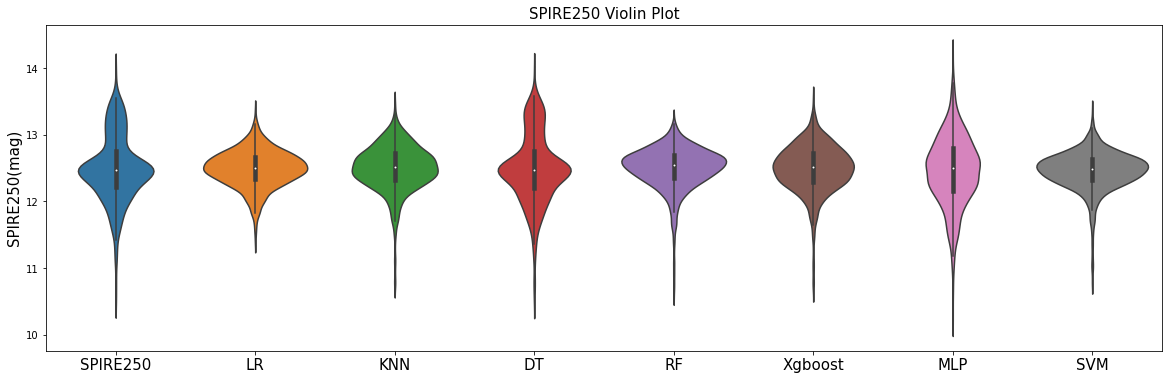

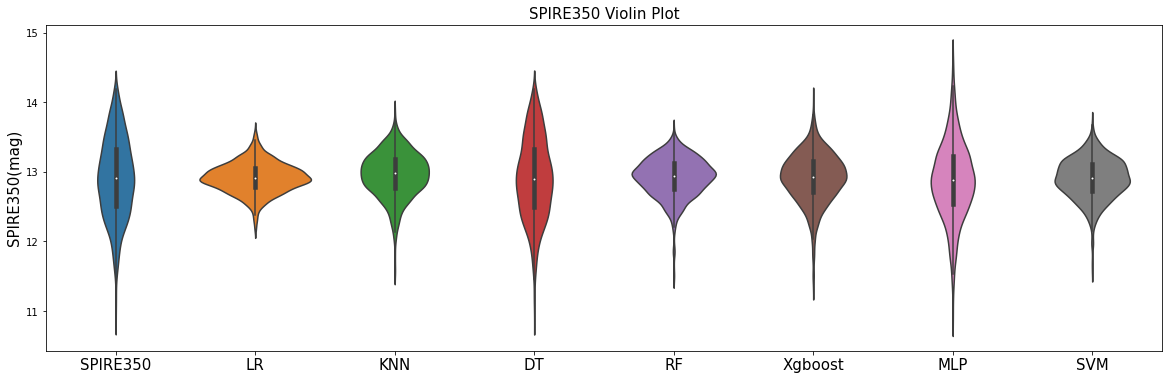

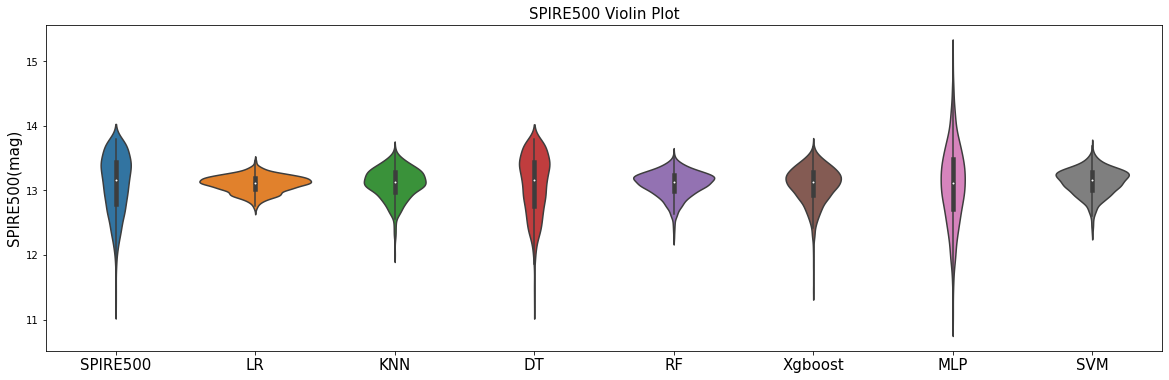

In [148]:
data1=[v250[0],v250[1],v250[2],v250[3],v250[4],v250[5],v250[6]]
# data=[target250['m250'],v250[0],v250[1],v250[2],v250[3],v250[4],v250[5],v250[6]]
# model_name=['SPIRE250','linear regression',
#  'k nearest neighbor',
#  'decision tree',
#  'random forest',
#  'xgboost',
#  'multi-layer perceptron',
#  'Support vector machine']
model_name=['LR','KNN','DT','RF','Xgboost','MLP','SVM']
model_name250=['SPIRE250',*model_name]
model_name350=['SPIRE350',*model_name]
model_name500=['SPIRE500',*model_name]
# print(model_name250)

# pd_data=pd.DataFrame(data=data1,index=model_name[1:]).T
# pd_data250=pd.concat([target250.reset_index(drop=True).rename(columns={'m250':'SPIRE250'}),pd_data],axis=1)

# ax = sns.violinplot(y=pd_data['linear regression'], data=pd_data)
fig=plt.figure(figsize=(20,6))
ax = sns.violinplot(data=data250)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], model_name250,fontsize=15)
plt.title('SPIRE250 Violin Plot',fontsize=15)
# plt.xlabel('Validation set')
plt.ylabel('SPIRE250(mag)',fontsize=15)
# plt.savefig('result/SPIRE250 seaborn violin plot')

fig=plt.figure(figsize=(20,6))
ax = sns.violinplot(data=data350)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], model_name350,fontsize=15)
plt.title('SPIRE350 Violin Plot',fontsize=15)
# plt.xlabel('Validation set')
plt.ylabel('SPIRE350(mag)',fontsize=15)
# plt.savefig('result/SPIRE350 seaborn violin plot')

fig=plt.figure(figsize=(20,6))
ax = sns.violinplot(data=data500)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], model_name500,fontsize=15)
plt.title('SPIRE500 Violin Plot',fontsize=15)
# plt.xlabel('Validation set')
plt.ylabel('SPIRE500(mag)',fontsize=15)
# plt.savefig('result/SPIRE500 seaborn violin plot')

In [273]:
pd_data250

,m250,linear regression,k nearest neighbor,decision tree,random forest,xgboost,multi-layer perceptron,Support vector machine
0,12.309,12.675079,12.477882,13.006,12.66818,12.476347,12.533480,12.598742
1,12.265,12.743323,12.158023,13.495,12.81481,12.943191,12.644864,12.514775
2,12.423,12.407233,12.496762,12.832,12.52104,12.596954,12.332175,12.415752
3,12.410,12.377632,12.501133,12.301,12.35528,12.437502,12.203139,12.329264
4,12.016,12.526264,12.412571,13.120,12.50626,12.286263,12.936248,12.524035
...,...,...,...,...,...,...,...,...
1795,12.272,12.561976,12.794494,12.611,12.62120,12.540128,12.724208,12.507573
1796,12.368,12.279161,11.769730,12.135,12.31119,12.157203,12.029843,12.107495
1797,13.048,12.300354,12.457182,12.202,12.31337,11.934753,12.235281,12.310434
1798,11.875,12.495227,12.372401,12.387,12.51324,12.486497,12.811555,12.417185


Text(0, 0.5, 'SPIRE250(mag)')

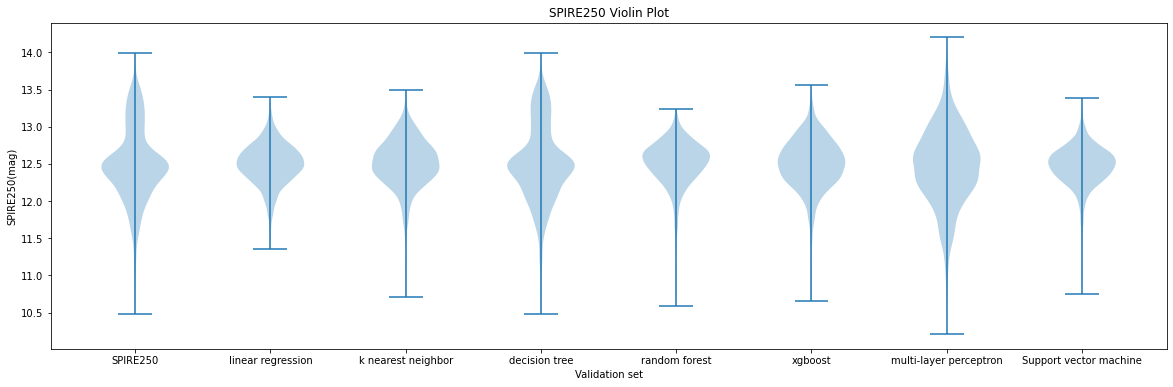

In [142]:

# data=[valid250[0][0],valid250[1][0],valid250[2][0],valid250[3][0],valid250[4][0],valid250[5][0],valid250[6][0]]
data=[target250['m250'],v250[0],v250[1],v250[2],v250[3],v250[4],v250[5],v250[6]]
plt.figure(figsize=(20,6))
plt.violinplot(data)
plt.xticks([1,2,3,4,5,6,7,8], ['SPIRE250','linear regression',
 'k nearest neighbor',
 'decision tree',
 'random forest',
 'xgboost',
 'multi-layer perceptron',
 'Support vector machine'])
plt.title('SPIRE250 Violin Plot')
plt.xlabel('Validation set')
plt.ylabel('SPIRE250(mag)')
# plt.savefig('result/SPIRE250 violin plot')

In [149]:
len(v350[0]),len(v350[1]),len(v350[2]),len(v350[3]),len(v350[4])

(1646, 1646, 1646, 1646, 1646)

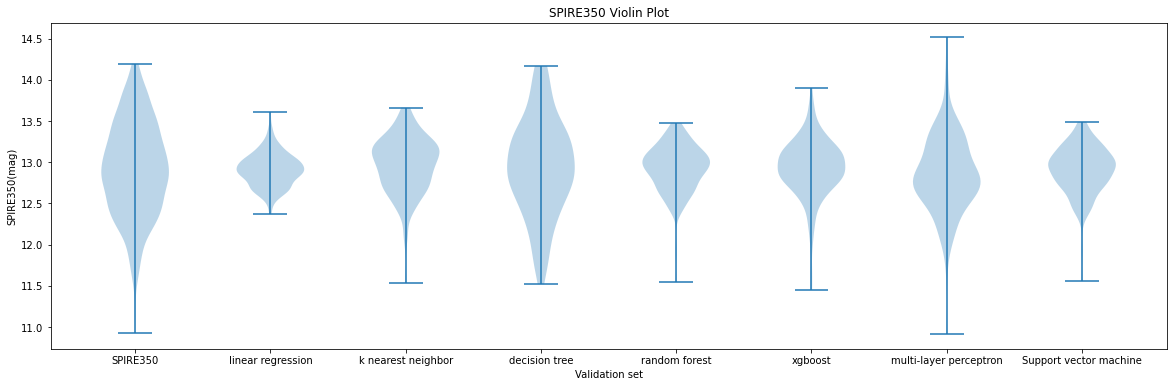

In [160]:
data=[target350['m350'],v350[0],v350[1],v350[2],v350[3],v350[4],v350[5],v350[6]]
# data=[target350['m350'],v350[0]]
plt.figure(figsize=(20,6))
plt.violinplot(data)
plt.xticks([1,2,3,4,5,6,7,8], ['SPIRE350','linear regression',
 'k nearest neighbor',
 'decision tree',
 'random forest',
 'xgboost',
 'multi-layer perceptron',
 'Support vector machine'])
plt.title('SPIRE350 Violin Plot')
plt.xlabel('Validation set')
plt.ylabel('SPIRE350(mag)')
# plt.savefig('result/SPIRE350 violin plot')

In [168]:
fullrmse250

[0.359728579059236,
 0.37666353120109214,
 0.48292291742618315,
 0.3534565736135372,
 0.3749332848460973,
 0.5256648206510436,
 0.3582832044811507]

Text(0.5, 1.0, 'The RMSE with different models')

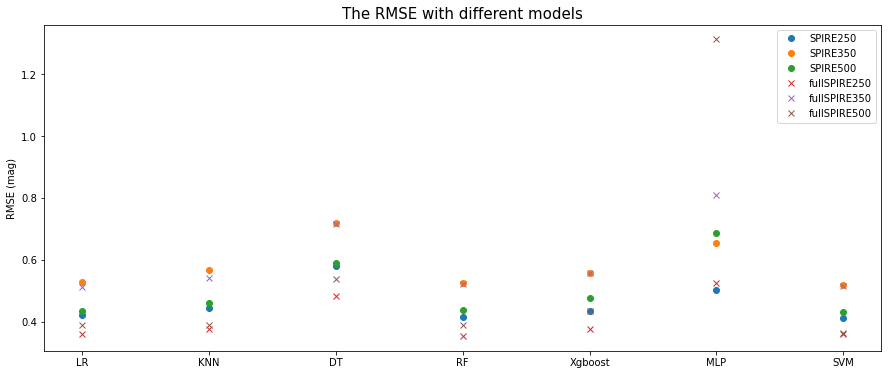

In [170]:
plt.figure(figsize=(15,6))
plt.plot(model_name,rmse250,'o',label='SPIRE250')
plt.plot(model_name,rmse350,'o',label='SPIRE350')
plt.plot(model_name,rmse500,'o',label='SPIRE500')
plt.plot(model_name,fullrmse250,'x',label='fullSPIRE250')
plt.plot(model_name,fullrmse350,'x',label='fullSPIRE350')
plt.plot(model_name,fullrmse500,'x',label='fullSPIRE500')
plt.legend()

plt.ylabel('RMSE (mag)')
plt.title('The RMSE with different models',fontsize=15)
# plt.savefig('result/RMSE with different models')

In [245]:
# ##function recall the best coeff of error and heatmap
# ##return rmse of test,train set and the min of test

def heatmap_knn(X=train250z,y=target250['m250'],w=np.logspace(0,2,10),C=np.logspace(-1,1,10),gamma=np.logspace(-2,0,10),kernel='rbf',n_splits=10,test_ratio=0.1,n_neighbors=[4,5],weights='distance',p=[2]):
#     grid=np.zeros((len(C),len(gamma))),np.zeros((len(C),len(gamma)))
#     grid_rbf1=np.zeros((len(C),len(gamma)))
    
    validate_rmse=[]
    corcoef=[]
    n_neighbor=[]
    p_p=[]
    
    for i,c in enumerate(n_neighbors):
        for j,g in enumerate(p):
#             grid[0][i,j],grid[1][i,j]=knn_train(X=X,y=y,C=c,gamma=g, kernel=kernel,n_neighbors=n_neighbors,weights=weights,p=p
#                                                   n_splits=n_splits, test_ratio=test_ratio)[:2]
            
            print(c,g)
            result=knn_train(X=X,y=y,n_neighbors=c,weights=weights,p=g,
                                                  n_splits=n_splits, test_ratio=test_ratio)
#             validate_rmse=result[0]
            validate_rmse.append(result[0])
            train_rmse=result[1]
            flux_list_true=[]
            flux_list_predict=[]
            target_index=[]

            for i in range(10):
                flux_list_true+=result[3][4*i+1].tolist()
                flux_list_predict+=result[3][4*i].tolist()
#                 target_index+=result[5][i].tolist()
                
            r=np.corrcoef(flux_list_true,flux_list_predict)[0][1]
            corcoef.append(r)
#             print(r)
            n_neighbor.append(c)
            p_p.append(g)
    d={'RMSE':validate_rmse,'corcoef':corcoef,'N_neighbor':n_neighbor,'p':p_p}
    data_list=pd.DataFrame(data=d)
    return data_list

#             d={'flux_list_true':flux_list_true,'flux_list_predict':flux_list_predict,'target_index':target_index}  
#             data_list=pd.DataFrame(data=d)

#     min_ind, vtestmin = np.argmin(grid[0]), np.min(grid[0])
#     Cmin = C[min_ind%100//10]
#     gmin = gamma[min_ind%10]
#     vtrain = grid[1][min_ind%100//10][min_ind%10]
    
#     return grid,kernel,Cmin,gmin,vtestmin,vtrain

In [294]:
%time knn350=heatmap_knn(X=spec_train_350,y=spec_target_350['m350'],n_neighbors=[i+4 for i in range(10)],p=[i+2 for i in range(10)])
knn350.to_csv('result/grid_search/specz SPIRE350 knn grid search.csv')

4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
Wall time: 44.3 s


In [259]:
# %time df500=heatmap_knn(X=spec_train_500,y=spec_target_500['m500'],n_neighbors=[i+4 for i in range(10)],p=[i+2 for i in range(10)])
%time df500=heatmap_knn(X=train500z,y=target500['m500'],n_neighbors=[i+4 for i in range(10)],p=[i+2 for i in range(10)])
df500

4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
Wall time: 9min 58s


,RMSE,corcoef,N_neighbor,p
0,0.462890,0.229135,4,2
1,0.469790,0.194866,4,3
2,0.474023,0.176506,4,4
3,0.473348,0.180656,4,5
4,0.472082,0.181544,4,6
...,...,...,...,...
95,0.442282,0.228938,13,7
96,0.442253,0.229218,13,8
97,0.443319,0.221676,13,9
98,0.443050,0.224369,13,10


In [260]:
df500.to_csv('result/grid_search/SPIRE500 knn grid search.csv')

In [288]:
%time knn350=heatmap_knn(X=train350z,y=target350['m350'],n_neighbors=[i+4 for i in range(10)],p=[i+2 for i in range(10)])
knn350.to_csv('result/grid_search/SPIRE350 knn grid search.csv')

4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
Wall time: 32min 58s


In [262]:
# ##function recall the best coeff of error and heatmap
# ##return rmse of test,train set and the min of test

def heatmap_DT(X=train250z,y=target250['m250'],max_depth=None, min_samples_split=[2], min_samples_leaf=[1], min_weight_fraction_leaf=[0.0],
               max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0,n_splits=10,test_ratio=0.1):
#     grid=np.zeros((len(C),len(gamma))),np.zeros((len(C),len(gamma)))
#     grid_rbf1=np.zeros((len(C),len(gamma)))
    
    validate_rmse=[]
    corcoef=[]
    n_neighbor=[]
    p_p=[]
    min_split=[]
    min_leaf=[]
    fraction_leaf=[]
    
    for i,c in enumerate(min_samples_split):
        for j,g in enumerate(min_samples_leaf):
            for k , l in enumerate(min_weight_fraction_leaf):
    #             grid[0][i,j],grid[1][i,j]=knn_train(X=X,y=y,C=c,gamma=g, kernel=kernel,n_neighbors=n_neighbors,weights=weights,p=p
    #                                                   n_splits=n_splits, test_ratio=test_ratio)[:2]

                print(c,g)
                result=DT(X=X,y=y,min_samples_split=c, min_samples_leaf=g, min_weight_fraction_leaf=l,
                                                      n_splits=n_splits, test_ratio=test_ratio)
    #             validate_rmse=result[0]
                validate_rmse.append(result[0])
                train_rmse=result[1]
                flux_list_true=[]
                flux_list_predict=[]
                target_index=[]

                for i in range(10):
                    flux_list_true+=result[3][4*i+1].tolist()
                    flux_list_predict+=result[3][4*i].tolist()
    #                 target_index+=result[5][i].tolist()

                r=np.corrcoef(flux_list_true,flux_list_predict)[0][1]
                corcoef.append(r)
    #             print(r)
    
                min_split.append(c)
                min_leaf.append(g)
                fraction_leaf.append(l)
                
    d={'RMSE':validate_rmse,'corcoef':corcoef,'min_split':min_split,'min_leaf':min_leaf,'fraction_leaf':fraction_leaf}
    data_list=pd.DataFrame(data=d)
    return data_list

#             d={'flux_list_true':flux_list_true,'flux_list_predict':flux_list_predict,'target_index':target_index}  
#             data_list=pd.DataFrame(data=d)

#     min_ind, vtestmin = np.argmin(grid[0]), np.min(grid[0])
#     Cmin = C[min_ind%100//10]
#     gmin = gamma[min_ind%10]
#     vtrain = grid[1][min_ind%100//10][min_ind%10]
    
#     return grid,kernel,Cmin,gmin,vtestmin,vtrain

In [274]:
%time DT500=heatmap_DT(X=train500z,y=target500['m500'],min_samples_split=[0.1*i+0.1 for i in range(10)], min_samples_leaf=[1,2,3,4], min_weight_fraction_leaf=[0.0,0.1,0.2,0.3])
DT500.to_csv('result/grid_search/SPIRE500 DT grid search.csv')

0.1 1
0.1 1
0.1 1
0.1 1
0.1 2
0.1 2
0.1 2
0.1 2
0.1 3
0.1 3
0.1 3
0.1 3
0.1 4
0.1 4
0.1 4
0.1 4
0.2 1
0.2 1
0.2 1
0.2 1
0.2 2
0.2 2
0.2 2
0.2 2
0.2 3
0.2 3
0.2 3
0.2 3
0.2 4
0.2 4
0.2 4
0.2 4
0.30000000000000004 1
0.30000000000000004 1
0.30000000000000004 1
0.30000000000000004 1
0.30000000000000004 2
0.30000000000000004 2
0.30000000000000004 2
0.30000000000000004 2
0.30000000000000004 3
0.30000000000000004 3
0.30000000000000004 3
0.30000000000000004 3
0.30000000000000004 4
0.30000000000000004 4
0.30000000000000004 4
0.30000000000000004 4
0.4 1
0.4 1
0.4 1
0.4 1
0.4 2
0.4 2
0.4 2
0.4 2
0.4 3
0.4 3
0.4 3
0.4 3
0.4 4
0.4 4
0.4 4
0.4 4
0.5 1
0.5 1
0.5 1
0.5 1
0.5 2
0.5 2
0.5 2
0.5 2
0.5 3
0.5 3
0.5 3
0.5 3
0.5 4
0.5 4
0.5 4
0.5 4
0.6 1
0.6 1
0.6 1
0.6 1
0.6 2
0.6 2
0.6 2
0.6 2
0.6 3
0.6 3
0.6 3
0.6 3
0.6 4
0.6 4
0.6 4
0.6 4
0.7000000000000001 1
0.7000000000000001 1
0.7000000000000001 1
0.7000000000000001 1
0.7000000000000001 2
0.7000000000000001 2
0.7000000000000001 2
0.7000000000000001 2


In [289]:
%time DT350=heatmap_DT(X=train350z,y=target350['m350'],min_samples_split=[0.1*i+0.1 for i in range(10)], min_samples_leaf=[1,2,3,4], min_weight_fraction_leaf=[0.0,0.1,0.2,0.3])
DT350.to_csv('result/grid_search/SPIRE350 DT grid search.csv')

0.1 1
0.1 1
0.1 1
0.1 1
0.1 2
0.1 2
0.1 2
0.1 2
0.1 3
0.1 3
0.1 3
0.1 3
0.1 4
0.1 4
0.1 4
0.1 4
0.2 1
0.2 1
0.2 1
0.2 1
0.2 2
0.2 2
0.2 2
0.2 2
0.2 3
0.2 3
0.2 3
0.2 3
0.2 4
0.2 4
0.2 4
0.2 4
0.30000000000000004 1
0.30000000000000004 1
0.30000000000000004 1
0.30000000000000004 1
0.30000000000000004 2
0.30000000000000004 2
0.30000000000000004 2
0.30000000000000004 2
0.30000000000000004 3
0.30000000000000004 3
0.30000000000000004 3
0.30000000000000004 3
0.30000000000000004 4
0.30000000000000004 4
0.30000000000000004 4
0.30000000000000004 4
0.4 1
0.4 1
0.4 1
0.4 1
0.4 2
0.4 2
0.4 2
0.4 2
0.4 3
0.4 3
0.4 3
0.4 3
0.4 4
0.4 4
0.4 4
0.4 4
0.5 1
0.5 1
0.5 1
0.5 1
0.5 2
0.5 2
0.5 2
0.5 2
0.5 3
0.5 3
0.5 3
0.5 3
0.5 4
0.5 4
0.5 4
0.5 4
0.6 1
0.6 1
0.6 1
0.6 1
0.6 2
0.6 2
0.6 2
0.6 2
0.6 3
0.6 3
0.6 3
0.6 3
0.6 4
0.6 4
0.6 4
0.6 4
0.7000000000000001 1
0.7000000000000001 1
0.7000000000000001 1
0.7000000000000001 1
0.7000000000000001 2
0.7000000000000001 2
0.7000000000000001 2
0.7000000000000001 2


In [273]:
DT500=heatmap_DT(X=spec_train_500,y=spec_target_500['m500'],min_samples_split=[0.1*i+0.1 for i in range(10)], min_samples_leaf=[1,2,3,4], min_weight_fraction_leaf=[0.0,0.1,0.2,0.3])
DT500.to_csv('result/grid_search/specz SPIRE500 DT grid search.csv')

0.1 1
0.1 1
0.1 1
0.1 1
0.1 2
0.1 2
0.1 2
0.1 2
0.1 3
0.1 3
0.1 3
0.1 3
0.1 4
0.1 4
0.1 4
0.1 4
0.2 1
0.2 1
0.2 1
0.2 1
0.2 2
0.2 2
0.2 2
0.2 2
0.2 3
0.2 3
0.2 3
0.2 3
0.2 4
0.2 4
0.2 4
0.2 4
0.30000000000000004 1
0.30000000000000004 1
0.30000000000000004 1
0.30000000000000004 1
0.30000000000000004 2
0.30000000000000004 2
0.30000000000000004 2
0.30000000000000004 2
0.30000000000000004 3
0.30000000000000004 3
0.30000000000000004 3
0.30000000000000004 3
0.30000000000000004 4
0.30000000000000004 4
0.30000000000000004 4
0.30000000000000004 4
0.4 1
0.4 1
0.4 1
0.4 1
0.4 2
0.4 2
0.4 2
0.4 2
0.4 3
0.4 3
0.4 3
0.4 3
0.4 4
0.4 4
0.4 4
0.4 4
0.5 1
0.5 1
0.5 1
0.5 1
0.5 2
0.5 2
0.5 2
0.5 2
0.5 3
0.5 3
0.5 3
0.5 3
0.5 4
0.5 4
0.5 4
0.5 4
0.6 1
0.6 1
0.6 1
0.6 1
0.6 2
0.6 2
0.6 2
0.6 2
0.6 3
0.6 3
0.6 3
0.6 3
0.6 4
0.6 4
0.6 4
0.6 4
0.7000000000000001 1
0.7000000000000001 1
0.7000000000000001 1
0.7000000000000001 1
0.7000000000000001 2
0.7000000000000001 2
0.7000000000000001 2
0.7000000000000001 2


In [295]:
DT350=heatmap_DT(X=spec_train_350,y=spec_target_350['m350'],min_samples_split=[0.1*i+0.1 for i in range(10)], min_samples_leaf=[1,2,3,4], min_weight_fraction_leaf=[0.0,0.1,0.2,0.3])
DT350.to_csv('result/grid_search/specz SPIRE350 DT grid search.csv')

0.1 1
0.1 1
0.1 1
0.1 1
0.1 2
0.1 2
0.1 2
0.1 2
0.1 3
0.1 3
0.1 3
0.1 3
0.1 4
0.1 4
0.1 4
0.1 4
0.2 1
0.2 1
0.2 1
0.2 1
0.2 2
0.2 2
0.2 2
0.2 2
0.2 3
0.2 3
0.2 3
0.2 3
0.2 4
0.2 4
0.2 4
0.2 4
0.30000000000000004 1
0.30000000000000004 1
0.30000000000000004 1
0.30000000000000004 1
0.30000000000000004 2
0.30000000000000004 2
0.30000000000000004 2
0.30000000000000004 2
0.30000000000000004 3
0.30000000000000004 3
0.30000000000000004 3
0.30000000000000004 3
0.30000000000000004 4
0.30000000000000004 4
0.30000000000000004 4
0.30000000000000004 4
0.4 1
0.4 1
0.4 1
0.4 1
0.4 2
0.4 2
0.4 2
0.4 2
0.4 3
0.4 3
0.4 3
0.4 3
0.4 4
0.4 4
0.4 4
0.4 4
0.5 1
0.5 1
0.5 1
0.5 1
0.5 2
0.5 2
0.5 2
0.5 2
0.5 3
0.5 3
0.5 3
0.5 3
0.5 4
0.5 4
0.5 4
0.5 4
0.6 1
0.6 1
0.6 1
0.6 1
0.6 2
0.6 2
0.6 2
0.6 2
0.6 3
0.6 3
0.6 3
0.6 3
0.6 4
0.6 4
0.6 4
0.6 4
0.7000000000000001 1
0.7000000000000001 1
0.7000000000000001 1
0.7000000000000001 1
0.7000000000000001 2
0.7000000000000001 2
0.7000000000000001 2
0.7000000000000001 2


In [281]:
# ##function recall the best coeff of error and heatmap
# ##return rmse of test,train set and the min of test

def heatmap_RF(X=train250z,y=target250['m250'],n_estimators=[100], criterion='squared_error', max_depth=None, min_samples_split=[2], min_samples_leaf=[1], min_weight_fraction_leaf=[0.0], max_features='auto',
               max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, 
               verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None,n_splits=10,test_ratio=0.1):
#     grid=np.zeros((len(C),len(gamma))),np.zeros((len(C),len(gamma)))
#     grid_rbf1=np.zeros((len(C),len(gamma)))
    
    validate_rmse=[]
    corcoef=[]
    n_neighbor=[]
    p_p=[]
    n_estimator=[]
    min_split=[]
    min_leaf=[]
    fraction_leaf=[]
    for o,a in enumerate(n_estimators):
        for i,c in enumerate(min_samples_split):
            for j,g in enumerate(min_samples_leaf):
                for k , l in enumerate(min_weight_fraction_leaf):
        #             grid[0][i,j],grid[1][i,j]=knn_train(X=X,y=y,C=c,gamma=g, kernel=kernel,n_neighbors=n_neighbors,weights=weights,p=p
        #                                                   n_splits=n_splits, test_ratio=test_ratio)[:2]

                    print(c,g)
                    result=RF(X=X,y=y,n_estimators=a,min_samples_split=c, min_samples_leaf=g, min_weight_fraction_leaf=l,
                                                          n_splits=n_splits, test_ratio=test_ratio)
        #             validate_rmse=result[0]
                    validate_rmse.append(result[0])
                    train_rmse=result[1]
                    flux_list_true=[]
                    flux_list_predict=[]
                    target_index=[]

                    for i in range(10):
                        flux_list_true+=result[3][4*i+1].tolist()
                        flux_list_predict+=result[3][4*i].tolist()
        #                 target_index+=result[5][i].tolist()

                    r=np.corrcoef(flux_list_true,flux_list_predict)[0][1]
                    corcoef.append(r)
        #             print(r)
                                        
                    n_estimator.append(a)
                    min_split.append(c)
                    min_leaf.append(g)
                    fraction_leaf.append(l)
                
    d={'RMSE':validate_rmse,'corcoef':corcoef,'n_estimators':n_estimator,'min_split':min_split,'min_leaf':min_leaf,'fraction_leaf':fraction_leaf}
    data_list=pd.DataFrame(data=d)
    return data_list

#             d={'flux_list_true':flux_list_true,'flux_list_predict':flux_list_predict,'target_index':target_index}  
#             data_list=pd.DataFrame(data=d)

#     min_ind, vtestmin = np.argmin(grid[0]), np.min(grid[0])
#     Cmin = C[min_ind%100//10]
#     gmin = gamma[min_ind%10]
#     vtrain = grid[1][min_ind%100//10][min_ind%10]
    
#     return grid,kernel,Cmin,gmin,vtestmin,vtrain

In [290]:
%time RF350=heatmap_RF(X=train350z,y=target350['m350'],n_neighbors=[i+4 for i in range(10)],p=[i+2 for i in range(10)])
RF350.to_csv('result/grid_search/SPIRE350 RF grid search.csv')

0.1 1
0.1 1
0.1 1
0.1 1
0.1 2
0.1 2
0.1 2
0.1 2
0.1 3
0.1 3
0.1 3
0.1 3
0.1 4
0.1 4
0.1 4
0.1 4
0.2 1
0.2 1
0.2 1
0.2 1
0.2 2
0.2 2
0.2 2
0.2 2
0.2 3
0.2 3
0.2 3
0.2 3
0.2 4
0.2 4
0.2 4
0.2 4
0.30000000000000004 1
0.30000000000000004 1
0.30000000000000004 1
0.30000000000000004 1
0.30000000000000004 2
0.30000000000000004 2
0.30000000000000004 2
0.30000000000000004 2
0.30000000000000004 3
0.30000000000000004 3
0.30000000000000004 3
0.30000000000000004 3
0.30000000000000004 4
0.30000000000000004 4
0.30000000000000004 4
0.30000000000000004 4
0.4 1
0.4 1
0.4 1
0.4 1
0.4 2
0.4 2
0.4 2
0.4 2
0.4 3
0.4 3
0.4 3
0.4 3
0.4 4
0.4 4
0.4 4
0.4 4
0.5 1
0.5 1
0.5 1
0.5 1
0.5 2
0.5 2
0.5 2
0.5 2
0.5 3
0.5 3
0.5 3
0.5 3
0.5 4
0.5 4
0.5 4
0.5 4
0.6 1
0.6 1
0.6 1
0.6 1
0.6 2
0.6 2
0.6 2
0.6 2
0.6 3
0.6 3
0.6 3
0.6 3
0.6 4
0.6 4
0.6 4
0.6 4
0.7000000000000001 1
0.7000000000000001 1
0.7000000000000001 1
0.7000000000000001 1
0.7000000000000001 2
0.7000000000000001 2
0.7000000000000001 2
0.7000000000000001 2


In [285]:
# %time RF500=heatmap_RF(X=train500z,y=target500['m500'])
%time RF500=heatmap_RF(X=train500z,y=target500['m500'],min_samples_split=[0.1*i+0.1 for i in range(10)], min_samples_leaf=[1,2,3,4], min_weight_fraction_leaf=[0.0,0.1,0.2,0.3])
RF500.to_csv('result/grid_search/SPIRE500 RF grid search.csv')

0.1 1
0.1 1
0.1 1
0.1 1
0.1 2
0.1 2
0.1 2
0.1 2
0.1 3
0.1 3
0.1 3
0.1 3
0.1 4
0.1 4
0.1 4
0.1 4
0.2 1
0.2 1
0.2 1
0.2 1
0.2 2
0.2 2
0.2 2
0.2 2
0.2 3
0.2 3
0.2 3
0.2 3
0.2 4
0.2 4
0.2 4
0.2 4
0.30000000000000004 1
0.30000000000000004 1
0.30000000000000004 1
0.30000000000000004 1
0.30000000000000004 2
0.30000000000000004 2
0.30000000000000004 2
0.30000000000000004 2
0.30000000000000004 3
0.30000000000000004 3
0.30000000000000004 3
0.30000000000000004 3
0.30000000000000004 4
0.30000000000000004 4
0.30000000000000004 4
0.30000000000000004 4
0.4 1
0.4 1
0.4 1
0.4 1
0.4 2
0.4 2
0.4 2
0.4 2
0.4 3
0.4 3
0.4 3
0.4 3
0.4 4
0.4 4
0.4 4
0.4 4
0.5 1
0.5 1
0.5 1
0.5 1
0.5 2
0.5 2
0.5 2
0.5 2
0.5 3
0.5 3
0.5 3
0.5 3
0.5 4
0.5 4
0.5 4
0.5 4
0.6 1
0.6 1
0.6 1
0.6 1
0.6 2
0.6 2
0.6 2
0.6 2
0.6 3
0.6 3
0.6 3
0.6 3
0.6 4
0.6 4
0.6 4
0.6 4
0.7000000000000001 1
0.7000000000000001 1
0.7000000000000001 1
0.7000000000000001 1
0.7000000000000001 2
0.7000000000000001 2
0.7000000000000001 2
0.7000000000000001 2


In [286]:
RF350=heatmap_RF(X=spec_train_350,y=spec_target_350['m350'],min_samples_split=[0.1*i+0.1 for i in range(10)], min_samples_leaf=[1,2,3,4], min_weight_fraction_leaf=[0.0,0.1,0.2,0.3])
RF350.to_csv('result/grid_search/specz SPIRE350 RF grid search.csv')

,RMSE,corcoef,n_estimators,min_split,min_leaf,fraction_leaf
0,0.430269,0.298818,100,0.1,1,0.0
1,0.434476,0.262111,100,0.1,1,0.1
2,0.436564,0.242531,100,0.1,1,0.2
3,0.440450,0.206514,100,0.1,1,0.3
4,0.430099,0.299258,100,0.1,2,0.0
...,...,...,...,...,...,...
155,0.450473,-0.115920,100,1.0,3,0.3
156,0.450409,-0.115063,100,1.0,4,0.0
157,0.450415,-0.114012,100,1.0,4,0.1
158,0.450474,-0.112432,100,1.0,4,0.2


In [136]:
# ##function recall the best coeff of error and heatmap
# ##return rmse of test,train set and the min of test

def heatmap_svr(X=train250z,y=target250['m250'],w=np.logspace(0,2,10),C=[0.1,0.2],gamma=[0.1,0.2],kernel='rbf',n_splits=10,test_ratio=0.1,
                n_neighbors=[4,5],weights='distance',p=[2]):
#     grid=np.zeros((len(C),len(gamma))),np.zeros((len(C),len(gamma)))
#     grid_rbf1=np.zeros((len(C),len(gamma)))
    
    validate_rmse=[]
    corcoef=[]
    C_p=[]
    g_p=[]
    
    for i,c in enumerate(C):
        for j,g in enumerate(gamma):
#             grid[0][i,j],grid[1][i,j]=knn_train(X=X,y=y,C=c,gamma=g, kernel=kernel,n_neighbors=n_neighbors,weights=weights,p=p
#                                                   n_splits=n_splits, test_ratio=test_ratio)[:2]
            
            print(c,g)
            result=svr(X=X,y=y,C=c,gamma=g, n_splits=n_splits, test_ratio=test_ratio)
#             validate_rmse=result[0]
            validate_rmse.append(result[0])
            train_rmse=result[1]
            flux_list_true=[]
            flux_list_predict=[]
            target_index=[]

            for i in range(10):
                flux_list_true+=result[3][4*i+1].tolist()
                flux_list_predict+=result[3][4*i].tolist()
#                 target_index+=result[5][i].tolist()
                
            r=np.corrcoef(flux_list_true,flux_list_predict)[0][1]
            corcoef.append(r)
#             print(r)
            C_p.append(c)
            g_p.append(g)
        
    d={'RMSE':validate_rmse,'corcoef':corcoef,'C':C_p,'gamma':g_p}
    data_list=pd.DataFrame(data=d)
    return data_list

#             d={'flux_list_true':flux_list_true,'flux_list_predict':flux_list_predict,'target_index':target_index}  
#             data_list=pd.DataFrame(data=d)

#     min_ind, vtestmin = np.argmin(grid[0]), np.min(grid[0])
#     Cmin = C[min_ind%100//10]
#     gmin = gamma[min_ind%10]
#     vtrain = grid[1][min_ind%100//10][min_ind%10]
    
#     return grid,kernel,Cmin,gmin,vtestmin,vtrain

In [139]:
%time svr500=heatmap_svr(X=train500z,y=target500['m500'],C=np.logspace(-1,1,10),gamma=np.logspace(-2,0,10))
svr500.to_csv('result/grid_search/SPIRE500 SVR grid search.csv')

0.1 0.01
0.1 0.016681005372000592
0.1 0.027825594022071243
0.1 0.046415888336127774
0.1 0.0774263682681127
0.1 0.1291549665014884
0.1 0.21544346900318834
0.1 0.3593813663804626
0.1 0.5994842503189409
0.1 1.0
0.16681005372000587 0.01
0.16681005372000587 0.016681005372000592
0.16681005372000587 0.027825594022071243
0.16681005372000587 0.046415888336127774
0.16681005372000587 0.0774263682681127
0.16681005372000587 0.1291549665014884
0.16681005372000587 0.21544346900318834
0.16681005372000587 0.3593813663804626
0.16681005372000587 0.5994842503189409
0.16681005372000587 1.0
0.2782559402207124 0.01
0.2782559402207124 0.016681005372000592
0.2782559402207124 0.027825594022071243
0.2782559402207124 0.046415888336127774
0.2782559402207124 0.0774263682681127
0.2782559402207124 0.1291549665014884
0.2782559402207124 0.21544346900318834
0.2782559402207124 0.3593813663804626
0.2782559402207124 0.5994842503189409
0.2782559402207124 1.0
0.46415888336127786 0.01
0.46415888336127786 0.016681005372000592


In [141]:
%time svr350=heatmap_svr(X=train350z,y=target350['m350'],C=np.logspace(-1,1,10),gamma=np.logspace(-2,0,10))
svr350.to_csv('result/grid_search/SPIRE350 SVR grid search.csv')

0.1 0.01
0.1 0.016681005372000592
0.1 0.027825594022071243
0.1 0.046415888336127774
0.1 0.0774263682681127
0.1 0.1291549665014884
0.1 0.21544346900318834
0.1 0.3593813663804626
0.1 0.5994842503189409
0.1 1.0
0.16681005372000587 0.01
0.16681005372000587 0.016681005372000592
0.16681005372000587 0.027825594022071243
0.16681005372000587 0.046415888336127774
0.16681005372000587 0.0774263682681127
0.16681005372000587 0.1291549665014884
0.16681005372000587 0.21544346900318834
0.16681005372000587 0.3593813663804626
0.16681005372000587 0.5994842503189409
0.16681005372000587 1.0
0.2782559402207124 0.01
0.2782559402207124 0.016681005372000592
0.2782559402207124 0.027825594022071243
0.2782559402207124 0.046415888336127774
0.2782559402207124 0.0774263682681127
0.2782559402207124 0.1291549665014884
0.2782559402207124 0.21544346900318834
0.2782559402207124 0.3593813663804626
0.2782559402207124 0.5994842503189409
0.2782559402207124 1.0
0.46415888336127786 0.01
0.46415888336127786 0.016681005372000592


In [142]:
%time svr250=heatmap_svr(X=train250z,y=target250['m250'],C=np.logspace(-1,1,10),gamma=np.logspace(-2,0,10))
svr250.to_csv('result/grid_search/SPIRE250 SVR grid search.csv')

0.1 0.01
0.1 0.016681005372000592
0.1 0.027825594022071243
0.1 0.046415888336127774
0.1 0.0774263682681127
0.1 0.1291549665014884
0.1 0.21544346900318834
0.1 0.3593813663804626
0.1 0.5994842503189409
0.1 1.0
0.16681005372000587 0.01
0.16681005372000587 0.016681005372000592
0.16681005372000587 0.027825594022071243
0.16681005372000587 0.046415888336127774
0.16681005372000587 0.0774263682681127
0.16681005372000587 0.1291549665014884
0.16681005372000587 0.21544346900318834
0.16681005372000587 0.3593813663804626
0.16681005372000587 0.5994842503189409
0.16681005372000587 1.0
0.2782559402207124 0.01
0.2782559402207124 0.016681005372000592
0.2782559402207124 0.027825594022071243
0.2782559402207124 0.046415888336127774
0.2782559402207124 0.0774263682681127
0.2782559402207124 0.1291549665014884
0.2782559402207124 0.21544346900318834
0.2782559402207124 0.3593813663804626
0.2782559402207124 0.5994842503189409
0.2782559402207124 1.0
0.46415888336127786 0.01
0.46415888336127786 0.016681005372000592


In [143]:
print(np.min(svr250['RMSE']),np.max(svr250['corcoef']))
print(np.min(svr350['RMSE']),np.max(svr350['corcoef']))
print(np.min(svr500['RMSE']),np.max(svr500['corcoef']))

0.4091456321843279 0.5917690528525195
0.5133727437813239 0.4407440126424468
0.4300100180607407 0.31477361652419833


In [147]:
a=np.max(sigma3_target500['m500'])
for i,b in enumerate(sigma3_target500['m500']):
    if b == a:
        print(i)
        break

49


In [149]:
len(spec_target_250['m250']),len(spec_target_350['m350']),len(spec_target_500['m500'])

(188, 179, 95)

In [ ]:
C=np.logspace(-1,1,10),gamma=np.logspace(-2,0,10)

In [ ]:
# ##function recall the best coeff of error and heatmap
# ##return rmse of test,train set and the min of test

def heatmap_linear(X=train250z,y=target250['m250'],w=np.logspace(0,2,10),C=np.logspace(-1,1,10),gamma=np.logspace(-2,0,10),kernel='rbf',n_splits=10,test_ratio=0.1):
    grid=np.zeros((len(C),len(gamma))),np.zeros((len(C),len(gamma)))
#     grid_rbf1=np.zeros((len(C),len(gamma)))
    
    for i,c in enumerate(C):
        for j,g in enumerate(gamma):
            grid[0][i,j],grid[1][i,j]=linear_train(X=X,y=y,C=c,gamma=g, kernel=kernel,
                                                  n_splits=n_splits, test_ratio=test_ratio)[:2]
#         print (i , j)

    min_ind, vtestmin = np.argmin(grid[0]), np.min(grid[0])
    Cmin = C[min_ind%100//10]
    gmin = gamma[min_ind%10]
    vtrain = grid[1][min_ind%100//10][min_ind%10]
    
    return grid,kernel,Cmin,gmin,vtestmin,vtrain

In [ ]:
%time linear_heatmap=heatmap_linear(X=train250z,y=target250['m250'])

In [28]:
from sklearn import linear_model
def linear_train(X=train250z,y=target250['m250'],weight=None,C=100,gamma=0.1,epsilon=0.1,kernel='rbf',n_splits=10,test_ratio=0.1,train_ratio=0.9,random_state=0):
#     baye=linear_model.BayesianRidge()
    baye=linear_model.LinearRegression()
#     ss = ShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=0)
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=0)
    kf.get_n_splits(X)
    rmse=[]
    result=[]
    trainind=[]
    testind=[]
    
    for train_index, test_index in kf.split(X):
        #print("%s %s" % (train_index, test_index))
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]    #set the train test dataset
        if weight is None:
            result_svr=baye.fit(X_train,y_train).predict(X_test),baye.fit(X_train,y_train).predict(X_train)
        else:
            weight_train=weight[train_index]
            result_svr=baye.fit(X_train,y_train,sample_weight=weight_train).predict(X_test),baye.fit(X_train,y_train,sample_weight=weight_train).predict(X_train) 
         
        result+=result_svr[0], y_test,result_svr[1], y_train
#         print(result)
        mse=sklearn.metrics.mean_squared_error(y_test,result_svr[0]),sklearn.metrics.mean_squared_error(y_train,result_svr[1])
        rmse+=[(math.sqrt(mse[0]),math.sqrt(mse[1]))]
#         print(mse,rmse)
        trainind.append(train_index)
        testind.append(test_index)

    #print(rmse)
    #rmse[0][1]
 
    return np.mean([i[0] for i in rmse]),np.mean([i[1] for i in rmse]),rmse,result,kernel,trainind,testind

In [53]:
linere=linear_train(X=fulltrain500,y=fulltarget500['m500'],weight=fullweight500)
linere[:2]

(0.48712773656028324, 0.41779770350834167)

In [54]:
plot(result=linere)

NameError: name 'plot' is not defined

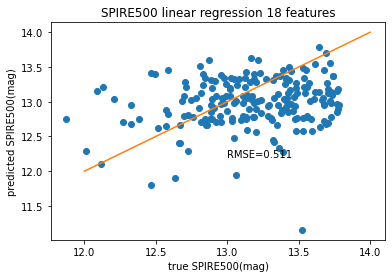

In [435]:
plot(result=linere)

In [243]:
linere350=linear_train(X=train350z,y=target350['m350'])
linere350[:2]

(0.5295715401227952, 0.5240666215285004)

In [26]:
linere500=linear_train(X=fulltrain500,y=fulltarget500['m500'])
linere500[:2]

(0.4019005019967766, 0.35879210840604453)

In [24]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe_connected'
import plotly.graph_objects as go


In [75]:
def plot(result=linere500,band='500',model='linear regression'):
#     result=linere500
    validate_rmse=result[0]
    train_rmse=result[1]
    flux_list_true=[]
    flux_list_predict=[]
    target_index=[]
    
    for i in range(10):
        flux_list_true+=result[3][4*i+1].tolist()
        flux_list_predict+=result[3][4*i].tolist()
        target_index+=result[5][i].tolist()
    d={'flux_list_true':flux_list_true,'flux_list_predict':flux_list_predict,'target_index':target_index}    
    data_list=pd.DataFrame(data=d)
    
    a=np.min(data_list['flux_list_true'])
    b=np.max(data_list['flux_list_true'])
    r=np.corrcoef(flux_list_true,flux_list_predict)[0][1]
    print(r)
    x = np.linspace(a-0.2, b+0.2, 1000)
    fig=px.scatter(x=data_list['flux_list_true'],y=data_list['flux_list_predict'],text=data_list['target_index'])

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data_list['flux_list_true'],y=data_list['flux_list_predict'],text=data_list['target_index'],mode='markers'))
#     fig=px.line(x,x)
    # Add traces
    fig.add_trace(go.Scatter(x=x, y=x))
    fig.show()
    
    plt.plot(flux_list_true,flux_list_predict,'o')
    plt.plot(x, x , linestyle='solid')
    plt.text(13,12.2,'RMSE='+str(validate_rmse)[0:5])
    plt.title(f'SPIRE{band} {model} 18 features')
    plt.xlabel(f'true SPIRE{band}(mag)')
    plt.ylabel(f'predicted SPIRE{band}(mag)')

In [63]:
ty=sigma3_target500[sigma3_target500['m500']>12]
tx=sigma3_train500.loc[ty['m500'].index]

0.1905903760935287


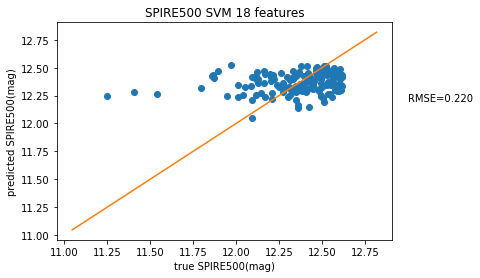

In [77]:
sigma3_svrre500=svr(X=sigma3_train500,y=sigma3_target500['m500'])
# sigma3_svrre500=svr(X=tx,y=ty['m500'])
plot(result=sigma3_svrre500,model='SVM')

In [123]:
# plot(result=svrre500)
good=[89,35,1,38,30]
outlier=[29,69,88,34,36]
good_spec=sigma3_target500.index.tolist()
# good_spec=spec_sigma3_target500.index.tolist()

RA_spz=[]
Dec_spz=[]
for i in range(len(good_spec)):
    RA_spz.append(df99['raAS'].iloc[good_spec[i]])
    Dec_spz.append(df99['decAS'].iloc[good_spec[i]])
    
#     RA_spz.append(df99['RA_spz'].iloc[a[good[i]]])
#     Dec_spz.append(df99['Dec_spz'].iloc[a[good[i]]])
    
#     RA_spz.append(df99['RA_spz'].iloc[a[outlier[i]]])
#     Dec_spz.append(df99['Dec_spz'].iloc[a[outlier[i]]])

d={'RA_spz':RA_spz,'Dec_spz':Dec_spz}
df_cor=pd.DataFrame(data=d)
df_cor.to_csv('data/specz/sigma3 500 coordinate.csv')
# df_cor.to_csv('data/specz/specz sigma3 500 coordinate.csv')

In [129]:
# Region file format: DS9 version 4.1
# global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
# fk5
# circle(268.54706,65.74620999999999,10") # text={spec_sigma3_1}
# circle(271.36804,65.90894,10") # text={spec_sigma3_2}
# circle(271.37991,66.74705,10") # text={spec_sigma3_3}
# circle(270.76552999999996,67.24722,10") # text={spec_sigma3_4}
# circle(269.2403,67.49677,10") # text={spec_sigma3_5}
# circle(271.11215,67.34643,10") # text={spec_sigma3_6}
       
       
path=('sigma3_region.txt')
k=open(path,'w')
print('#Region file format: DS9 version 4.1',file=k)
print('global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 fk5',file=k)
for i, a in enumerate(df_cor['RA_spz']):
       print('circle(' + str(df_cor['RA_spz'].loc[i]) + ','+ str(df_cor['Dec_spz'].loc[i]) + ',10") # text={sigma3_' + str(i+1) + '}',file=k)
       
k.close()

In [128]:
path=('sigma3_ds9.txt')
k=open(path,'w')
for i, a in enumerate(df_cor['RA_spz']):
    print('ds9 /home/leo/AKARI_image/mapCombined_PSW_psrc.fits -scale limits -0.0662527 0.046648 -zscale   -cmap bb  -pan to  ' + str(df_cor['RA_spz'].loc[i]) +' +' + str(df_cor['Dec_spz'].loc[i])+ 
          ' fk5 -zoom 36 -regionfile sigma3_region.txt  -saveimage jpeg ~/AKARI_image/sigma3_image/sigma3_SPIRE250_'+str(i+1) + '.jpg  -exit &',file=k)
for i, a in enumerate(df_cor['RA_spz']):
    print('ds9 /home/leo/AKARI_image/mapCombined_PMW_psrc.fits -scale limits -0.0662527 0.046648 -zscale   -cmap bb  -pan to  ' + str(df_cor['RA_spz'].loc[i]) + ' +' + str(df_cor['Dec_spz'].loc[i])+ 
          ' fk5 -zoom 36 -regionfile sigma3_region.txt  -saveimage jpeg ~/AKARI_image/sigma3_image/sigma3_SPIRE350_'+str(i+1) + '.jpg  -exit &',file=k)
for i, a in enumerate(df_cor['RA_spz']):
    print('ds9 /home/leo/AKARI_image/mapCombined_PLW_psrc.fits -scale limits -0.0662527 0.046648 -zscale   -cmap bb  -pan to  ' + str(df_cor['RA_spz'].loc[i]) + ' +' + str(df_cor['Dec_spz'].loc[i])+ 
          ' fk5 -zoom 36 -regionfile sigma3_region.txt  -saveimage jpeg ~/AKARI_image/sigma3_image/sigma3_SPIRE500_'+str(i+1) + '.jpg  -exit &',file=k)
k.close()

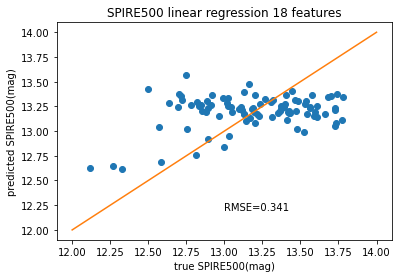

In [164]:
plot(result=svrre500)

In [247]:
%time knn500=knn_train(X=fulltrain500,y=fulltarget500['m500'])

Wall time: 444 ms


In [60]:
plot(result=knn500)

NameError: name 'knn500' is not defined

Text(12, 11, 'RMSE=0.358')

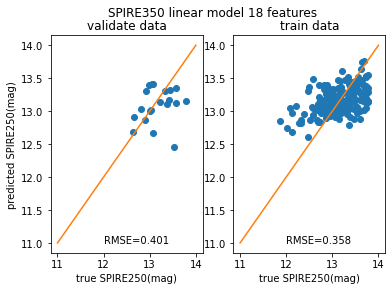

In [178]:
#plot invalidate training set result
# flux_list,validate_rmse,train_rmse=linere[3],linere[0],linere[1]
# flux_list,validate_rmse,train_rmse=linere350[3],linere350[0],linere350[1]
flux_list,validate_rmse,train_rmse=linere500[3],linere500[0],linere500[1]
fig,ax = plt.subplots(1,2)
# plt.suptitle('SPIRE250 linear model 18 features')
plt.suptitle('SPIRE350 linear model 18 features')
x = np.linspace(0, 3, 1000)
ax[0].plot(flux_list[1],flux_list[0],'o')
ax[0].plot(x+11, x+11 , linestyle='solid')
ax[0].set_xlabel('true SPIRE250(mag)')
ax[0].set_ylabel('predicted SPIRE250(mag)')
# ax[0].legend(['','y=x'])
ax[0].set_title('validate data')
ax[0].text(12,11,'RMSE='+str(validate_rmse)[0:5])

x = np.linspace(0, 3, 1000)
ax[1].plot(flux_list[3],flux_list[2],'o')
ax[1].plot(x+11, x+11 , linestyle='solid')
ax[1].set_xlabel('true SPIRE250(mag)')
#ax[1].set_ylabel('predict flux(mag)')
# ax[1].legend(['','y=x'])
ax[1].set_title('train data')
ax[1].text(12,11,'RMSE='+str(train_rmse)[0:5])

# svr_lin.get_params(deep=True)
# svr_lin_r=svr_lin.score(X_test,y_test),svr_lin.score(X_train,y_train)
#print(svr_r)

# plt.savefig('result/SPIRE350 linear model 18 features')

In [29]:
from sklearn import neighbors
def knn_train(X=train250z,y=target250['m250'],weight=None,n_splits=10,test_ratio=0.1,train_ratio=0.9,random_state=0,n_neighbors=5,weights='distance',p=19):
    knn=neighbors.KNeighborsRegressor(n_neighbors=n_neighbors,weights=weights,p=p)
#     ss = ShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=0)
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=0)
    kf.get_n_splits(X)
    rmse=[]
    result=[]
    trainind=[]
    testind=[]
    for train_index, test_index in kf.split(X):
        #print("%s %s" % (train_index, test_index))
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]    #set the train test dataset
        result_svr=knn.fit(X_train,y_train).predict(X_test),knn.fit(X_train,y_train).predict(X_train) 
#         if weight is None:
#             result_svr=knn.fit(X_train,y_train).predict(X_test),knn.fit(X_train,y_train).predict(X_train)
#         else:
#             weight_train=weight[train_index]
#             result_svr=knn.fit(X_train,y_train,sample_weight=weight_train).predict(X_test),knn.fit(X_train,y_train,sample_weight=weight_train).predict(X_train) 
         
        result+=result_svr[0], y_test,result_svr[1], y_train
#         print(result)
        mse=sklearn.metrics.mean_squared_error(y_test,result_svr[0]),sklearn.metrics.mean_squared_error(y_train,result_svr[1])
        rmse+=[(math.sqrt(mse[0]),math.sqrt(mse[1]))]
#         print(mse,rmse)
        trainind.append(train_index)
        testind.append(test_index)

    #print(rmse)
    #rmse[0][1]
 
    return np.mean([i[0] for i in rmse]),np.mean([i[1] for i in rmse]),rmse,result,trainind,testind

In [215]:
knnre=knn_train()
knnre[:2]

(0.4423585484629215, 0.0)

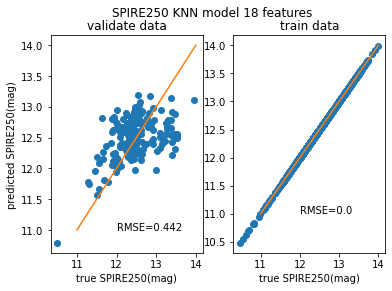

In [86]:
#plot invalidate training set result
flux_list,validate_rmse,train_rmse=knnre[3],knnre[0],knnre[1]
fig,ax = plt.subplots(1,2)
plt.suptitle('SPIRE250 KNN model 18 features')
x = np.linspace(0, 3, 1000)
ax[0].plot(flux_list[1],flux_list[0],'o')
ax[0].plot(x+11, x+11 , linestyle='solid')
ax[0].set_xlabel('true SPIRE250(mag)')
ax[0].set_ylabel('predicted SPIRE250(mag)')
# ax[0].legend(['','y=x'])
ax[0].set_title('validate data')
ax[0].text(12,11,'RMSE='+str(validate_rmse)[0:5])

x = np.linspace(0, 3, 1000)
ax[1].plot(flux_list[3],flux_list[2],'o')
ax[1].plot(x+11, x+11 , linestyle='solid')
ax[1].set_xlabel('true SPIRE250(mag)')
#ax[1].set_ylabel('predict flux(mag)')
# ax[1].legend(['','y=x'])
ax[1].set_title('train data')
ax[1].text(12,11,'RMSE='+str(train_rmse)[0:5])

# svr_lin.get_params(deep=True)
# svr_lin_r=svr_lin.score(X_test,y_test),svr_lin.score(X_train,y_train)
#print(svr_r)

plt.savefig('result/KNN model 18 features')

In [30]:
from sklearn import tree

def DT(X=train250z,y=target250['m250'],weight=None,n_splits=10,test_ratio=0.1,train_ratio=0.9,random_state=0,n_neighbors=5,weights='distance',p=19, min_samples_split=5, min_samples_leaf=1, min_weight_fraction_leaf=0.0,):
#     knn=neighbors.KNeighborsRegressor(n_neighbors=n_neighbors,weights=weights,p=p)
#     ss = ShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=0)
    DT = tree.DecisionTreeRegressor( criterion='squared_error', splitter='random', max_depth=None, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_features=None,
                                    random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=0)
    kf.get_n_splits(X)
    rmse=[]
    result=[]
    trainind=[]
    testind=[]
    for train_index, test_index in kf.split(X):
        #print("%s %s" % (train_index, test_index))
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]    #set the train test dataset
#         result_svr= DT.fit(X_train,y_train).predict(X_test), DT.fit(X_train,y_train).predict(X_train) 
        if weight is None:
            result_svr=DT.fit(X_train,y_train).predict(X_test),DT.fit(X_train,y_train).predict(X_train)
        else:
            weight_train=weight[train_index]
            result_svr=DT.fit(X_train,y_train,sample_weight=weight_train).predict(X_test),DT.fit(X_train,y_train,sample_weight=weight_train).predict(X_train) 
         
        result+=result_svr[0], y_test,result_svr[1], y_train
#         print(result)
        mse=sklearn.metrics.mean_squared_error(y_test,result_svr[0]),sklearn.metrics.mean_squared_error(y_train,result_svr[1])
        rmse+=[(math.sqrt(mse[0]),math.sqrt(mse[1]))]
#         print(mse,rmse)
        trainind.append(train_index)
        testind.append(test_index)

    #print(rmse)
    #rmse[0][1]
 
    return np.mean([i[0] for i in rmse]),np.mean([i[1] for i in rmse]),rmse,result,trainind,testind

In [264]:
dtre=DT(X=fulltrain500,y=fulltarget500['m500'])
dtre[:2]

(0.5111763739568482, 0.15628255260289786)

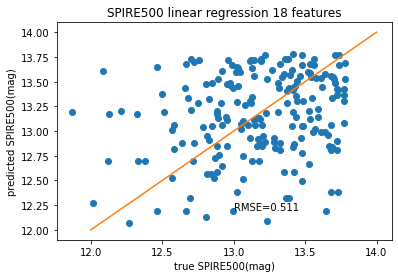

In [266]:
plot(result=dtre)

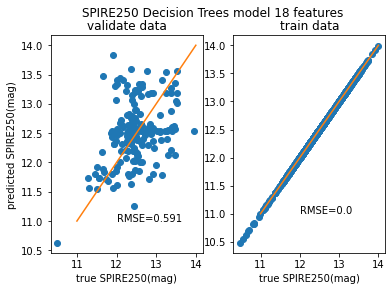

In [87]:
#plot invalidate training set result
flux_list,validate_rmse,train_rmse=dtre[3],dtre[0],dtre[1]
fig,ax = plt.subplots(1,2)
plt.suptitle('SPIRE250 Decision Trees model 18 features')
x = np.linspace(0, 3, 1000)
ax[0].plot(flux_list[1],flux_list[0],'o')
ax[0].plot(x+11, x+11 , linestyle='solid')
ax[0].set_xlabel('true SPIRE250(mag)')
ax[0].set_ylabel('predicted SPIRE250(mag)')
# ax[0].legend(['','y=x'])
ax[0].set_title('validate data')
ax[0].text(12,11,'RMSE='+str(validate_rmse)[0:5])

x = np.linspace(0, 3, 1000)
ax[1].plot(flux_list[3],flux_list[2],'o')
ax[1].plot(x+11, x+11 , linestyle='solid')
ax[1].set_xlabel('true SPIRE250(mag)')
#ax[1].set_ylabel('predict flux(mag)')
# ax[1].legend(['','y=x'])
ax[1].set_title('train data')
ax[1].text(12,11,'RMSE='+str(train_rmse)[0:5])

# svr_lin.get_params(deep=True)
# svr_lin_r=svr_lin.score(X_test,y_test),svr_lin.score(X_train,y_train)
#print(svr_r)

plt.savefig('result/DT model 18 features')

In [31]:
from sklearn.ensemble import RandomForestRegressor
def RF(X=train250z,y=target250['m250'],weight=None,n_splits=10,test_ratio=0.1,train_ratio=0.9,random_state=0,n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
       min_weight_fraction_leaf=0.0, max_features='auto',max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None):
    
#     knn=neighbors.KNeighborsRegressor(n_neighbors=n_neighbors,weights=weights,p=p)
#     ss = ShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=0)
#     DT = tree.DecisionTreeRegressor()
    RF = RandomForestRegressor(n_estimators=n_estimators, criterion='squared_error', max_depth=None, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_features='auto',
                               max_leaf_nodes=None,
                               min_impurity_decrease=0.0,bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=0)
    kf.get_n_splits(X)
    rmse=[]
    result=[]
    trainind=[]
    testind=[]
    for train_index, test_index in kf.split(X):
        #print("%s %s" % (train_index, test_index))
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]    #set the train test dataset
#         result_svr= RF.fit(X_train,y_train).predict(X_test), RF.fit(X_train,y_train).predict(X_train)
        if weight is None:
            result_svr=RF.fit(X_train,y_train).predict(X_test),RF.fit(X_train,y_train).predict(X_train)
        else:
            weight_train=weight[train_index]
            result_svr=RF.fit(X_train,y_train,sample_weight=weight_train).predict(X_test),RF.fit(X_train,y_train,sample_weight=weight_train).predict(X_train) 
         

        result+=result_svr[0], y_test,result_svr[1], y_train
#         print(result)
        mse=sklearn.metrics.mean_squared_error(y_test,result_svr[0]),sklearn.metrics.mean_squared_error(y_train,result_svr[1])
        rmse+=[(math.sqrt(mse[0]),math.sqrt(mse[1]))]
#         print(mse,rmse)
        trainind.append(train_index)
        testind.append(test_index)

    #print(rmse)
    #rmse[0][1]
 
    return np.mean([i[0] for i in rmse]),np.mean([i[1] for i in rmse]),rmse,result,trainind,testind

In [345]:
%time rfre=RF(X=fulltrain500, y = fulltarget500['m500'])
rfre[:2]

Wall time: 509 ms


(0.3869675409887507, 0.26663239687874546)

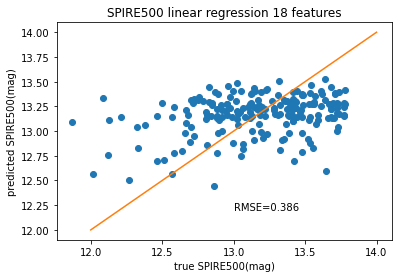

In [346]:
plot(result=rfre)

Text(12, 11, 'RMSE=0.155')

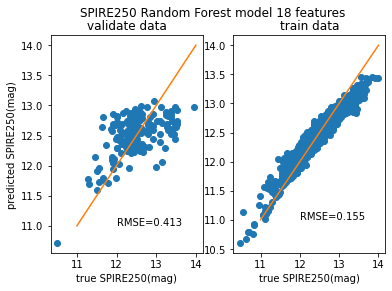

In [110]:
#plot invalidate training set result
flux_list,validate_rmse,train_rmse=rfre[3],rfre[0],rfre[1]
fig,ax = plt.subplots(1,2)
plt.suptitle('SPIRE250 Random Forest model 18 features')
x = np.linspace(0, 3, 1000)
ax[0].plot(flux_list[1],flux_list[0],'o')
ax[0].plot(x+11, x+11 , linestyle='solid')
ax[0].set_xlabel('true SPIRE250(mag)')
ax[0].set_ylabel('predicted SPIRE250(mag)')
# ax[0].legend(['','y=x'])
ax[0].set_title('validate data')
ax[0].text(12,11,'RMSE='+str(validate_rmse)[0:5])

x = np.linspace(0, 3, 1000)
ax[1].plot(flux_list[3],flux_list[2],'o')
ax[1].plot(x+11, x+11 , linestyle='solid')
ax[1].set_xlabel('true SPIRE250(mag)')
#ax[1].set_ylabel('predict flux(mag)')
# ax[1].legend(['','y=x'])
ax[1].set_title('train data')
ax[1].text(12,11,'RMSE='+str(train_rmse)[0:5])

# svr_lin.get_params(deep=True)
# svr_lin_r=svr_lin.score(X_test,y_test),svr_lin.score(X_train,y_train)
#print(svr_r)

# plt.savefig('result/RF model 18 features')

In [32]:
import xgboost as xgb

def XGB (X=train250z,y=target250['m250'],weight=None,n_splits=10,test_ratio=0.1,train_ratio=0.9,random_state=0,n_neighbors=5,weights='distance',p=19):
#     knn=neighbors.KNeighborsRegressor(n_neighbors=n_neighbors,weights=weights,p=p)
#     ss = ShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=0)
#     DT = tree.DecisionTreeRegressor()
#     RF = RandomForestRegressor(max_depth=2, random_state=0)
    xgb_model=xgb.XGBRegressor(booster='gbtree',objective="reg:squarederror",gamma=0.01,random_state=42,max_depth=5)
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=0)
    kf.get_n_splits(X)
    rmse=[]
    result=[]
    trainind=[]
    testind=[]
    for train_index, test_index in kf.split(X):
        #print("%s %s" % (train_index, test_index))
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]    #set the train test dataset
#         result_svr= xgb_model.fit(X_train,y_train).predict(X_test), xgb_model.fit(X_train,y_train).predict(X_train) 
        if weight is None:
            result_svr=xgb_model.fit(X_train,y_train).predict(X_test),xgb_model.fit(X_train,y_train).predict(X_train)
        else:
            weight_train=weight[train_index]
            result_svr=xgb_model.fit(X_train,y_train,sample_weight=weight_train).predict(X_test),xgb_model.fit(X_train,y_train,sample_weight=weight_train).predict(X_train) 
         
        result+=result_svr[0], y_test,result_svr[1], y_train
#         print(result)
        mse=sklearn.metrics.mean_squared_error(y_test,result_svr[0]),sklearn.metrics.mean_squared_error(y_train,result_svr[1])
        rmse+=[(math.sqrt(mse[0]),math.sqrt(mse[1]))]
#         print(mse,rmse)
        trainind.append(train_index)
        testind.append(test_index)

    #print(rmse)
    #rmse[0][1]
 
    return np.mean([i[0] for i in rmse]),np.mean([i[1] for i in rmse]),rmse,result,trainind,testind

In [81]:
xgbre= XGB()
xgbre[:2]

(0.4334315208010861, 0.09442306409870244)

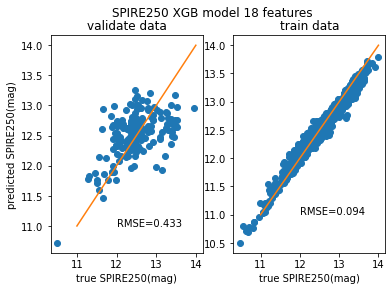

In [89]:
#plot invalidate training set result
flux_list,validate_rmse,train_rmse=xgbre[3],xgbre[0],xgbre[1]
fig,ax = plt.subplots(1,2)
plt.suptitle('SPIRE250 XGB model 18 features')
x = np.linspace(0, 3, 1000)
ax[0].plot(flux_list[1],flux_list[0],'o')
ax[0].plot(x+11, x+11 , linestyle='solid')
ax[0].set_xlabel('true SPIRE250(mag)')
ax[0].set_ylabel('predicted SPIRE250(mag)')
# ax[0].legend(['','y=x'])
ax[0].set_title('validate data')
ax[0].text(12,11,'RMSE='+str(validate_rmse)[0:5])

x = np.linspace(0, 3, 1000)
ax[1].plot(flux_list[3],flux_list[2],'o')
ax[1].plot(x+11, x+11 , linestyle='solid')
ax[1].set_xlabel('true SPIRE250(mag)')
#ax[1].set_ylabel('predict flux(mag)')
# ax[1].legend(['','y=x'])
ax[1].set_title('train data')
ax[1].text(12,11,'RMSE='+str(train_rmse)[0:5])

# svr_lin.get_params(deep=True)
# svr_lin_r=svr_lin.score(X_test,y_test),svr_lin.score(X_train,y_train)
#print(svr_r)

plt.savefig('result/XGB model 18 features')

In [33]:
#cross-validation svr_rbf spire250

# def svr(dx=train250,dy=target250['m250'],X=train250,y=target250['m250'],test=testz,C=100,gamma=0.1,epsilon=0.1,kernel='rbf',n_splits=10,test_ratio=0.1,train_ratio=0.9,random_state=0):
def svr (X=train250z,y=target250['m250'],weight=None,n_splits=10,test_ratio=0.1,train_ratio=0.9,random_state=0,n_neighbors=5,weights='distance',p=19,kernel='rbf', C=0.464, gamma=0.07, epsilon=0.1):
#     ss = ShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=0)
#     knn=neighbors.KNeighborsRegressor(n_neighbors=n_neighbors,weights=weights,p=p)
#     ss = ShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=0)
#     DT = tree.DecisionTreeRegressor()
#     RF = RandomForestRegressor(max_depth=2, random_state=0)
#     xgb_model=xgb.XGBRegressor(booster='gbtree',objective="reg:squarederror",gamma=0.01,random_state=42,max_depth=5)
    mlp=MLPRegressor(random_state=1, max_iter=500)
    svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)    
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=0)
    kf.get_n_splits(X)
    rmse=[]
    result=[]
    trainind=[]
    testind=[]
    for train_index, test_index in kf.split(X):
        #print("%s %s" % (train_index, test_index))
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]    #set the train test dataset
#         result_svr= svr.fit(X_train,y_train).predict(X_test), svr.fit(X_train,y_train).predict(X_train) 
        if weight is None:
            result_svr=svr.fit(X_train,y_train).predict(X_test),svr.fit(X_train,y_train).predict(X_train)
        else:
            weight_train=weight[train_index]
            result_svr=svr.fit(X_train,y_train,sample_weight=weight_train).predict(X_test),svr.fit(X_train,y_train,sample_weight=weight_train).predict(X_train) 
         
        result+=result_svr[0], y_test,result_svr[1], y_train
#         print(result)
        mse=sklearn.metrics.mean_squared_error(y_test,result_svr[0]),sklearn.metrics.mean_squared_error(y_train,result_svr[1])
        rmse+=[(math.sqrt(mse[0]),math.sqrt(mse[1]))]
#         print(mse,rmse)
        trainind.append(train_index)
        testind.append(test_index)

    #print(rmse)
    #rmse[0][1]
 
    return np.mean([i[0] for i in rmse]),np.mean([i[1] for i in rmse]),rmse,result,trainind,testind

In [63]:
svr()[:2]

(0.41138284576781914, 0.3666138085016367)

In [85]:
svrre500=svr(X=spec_train_500,y=spec_target_500['m500'])

In [68]:
svrre500[-1:]

([array([ 2, 13, 16, 30, 33, 56, 61, 62, 79, 80]),
  array([ 7,  8, 22, 45, 51, 60, 73, 76, 90, 94]),
  array([ 6, 24, 26, 42, 43, 48, 74, 78, 84, 88]),
  array([ 3, 18, 27, 54, 55, 63, 66, 82, 85, 87]),
  array([ 4,  5, 15, 17, 38, 40, 41, 53, 59, 86]),
  array([ 0, 10, 11, 23, 28, 34, 35, 50, 52]),
  array([ 1, 14, 31, 32, 57, 68, 71, 75, 81]),
  array([19, 20, 29, 49, 69, 72, 89, 92, 93]),
  array([12, 25, 37, 39, 46, 58, 65, 70, 77]),
  array([ 9, 21, 36, 44, 47, 64, 67, 83, 91])],)

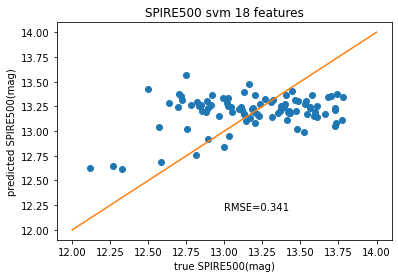

In [64]:
plot(result=svrre500,band='500',model='svm')

In [34]:
def MLP (X=train250z,y=target250['m250'],weight=None,n_splits=10,test_ratio=0.1,train_ratio=0.9,random_state=0,n_neighbors=5,weights='distance',p=19):
#     knn=neighbors.KNeighborsRegressor(n_neighbors=n_neighbors,weights=weights,p=p)
#     ss = ShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=0)
#     DT = tree.DecisionTreeRegressor()
#     RF = RandomForestRegressor(max_depth=2, random_state=0)
#     xgb_model=xgb.XGBRegressor(booster='gbtree',objective="reg:squarederror",gamma=0.01,random_state=42,max_depth=5)
    mlp=MLPRegressor(random_state=1, max_iter=500)
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=0)
    kf.get_n_splits(X)
    rmse=[]
    result=[]
    trainind=[]
    testind=[]
    for train_index, test_index in kf.split(X):
        #print("%s %s" % (train_index, test_index))
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]    #set the train test dataset
        result_svr= mlp.fit(X_train,y_train).predict(X_test), mlp.fit(X_train,y_train).predict(X_train) 
#         if weight is None:
#             result_svr=mlp.fit(X_train,y_train).predict(X_test),mlp.fit(X_train,y_train).predict(X_train)
#         else:
#             weight_train=weight[train_index]
#             result_svr=mlp.fit(X_train,y_train,sample_weight=weight_train).predict(X_test),mlp.fit(X_train,y_train,sample_weight=weight_train).predict(X_train) 
         
        result+=result_svr[0], y_test,result_svr[1], y_train
#         print(result)
        mse=sklearn.metrics.mean_squared_error(y_test,result_svr[0]),sklearn.metrics.mean_squared_error(y_train,result_svr[1])
        rmse+=[(math.sqrt(mse[0]),math.sqrt(mse[1]))]
#         print(mse,rmse)
        trainind.append(train_index)
        testind.append(test_index)

    #print(rmse)
    #rmse[0][1]
 
    return np.mean([i[0] for i in rmse]),np.mean([i[1] for i in rmse]),rmse,result,trainind,testind

In [93]:
mlpre=MLP()
mlpre[:2]

(0.5035174462995556, 0.5046229766155667)

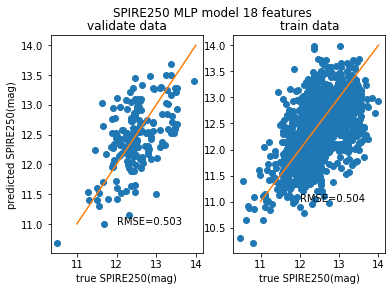

In [95]:
#plot invalidate training set result
flux_list,validate_rmse,train_rmse=mlpre[3],mlpre[0],mlpre[1]
fig,ax = plt.subplots(1,2)
plt.suptitle('SPIRE250 MLP model 18 features')
x = np.linspace(0, 3, 1000)
ax[0].plot(flux_list[1],flux_list[0],'o')
ax[0].plot(x+11, x+11 , linestyle='solid')
ax[0].set_xlabel('true SPIRE250(mag)')
ax[0].set_ylabel('predicted SPIRE250(mag)')
# ax[0].legend(['','y=x'])
ax[0].set_title('validate data')
ax[0].text(12,11,'RMSE='+str(validate_rmse)[0:5])

x = np.linspace(0, 3, 1000)
ax[1].plot(flux_list[3],flux_list[2],'o')
ax[1].plot(x+11, x+11 , linestyle='solid')
ax[1].set_xlabel('true SPIRE250(mag)')
#ax[1].set_ylabel('predict flux(mag)')
# ax[1].legend(['','y=x'])
ax[1].set_title('train data')
ax[1].text(12,11,'RMSE='+str(train_rmse)[0:5])

# svr_lin.get_params(deep=True)
# svr_lin_r=svr_lin.score(X_test,y_test),svr_lin.score(X_train,y_train)
#print(svr_r)

plt.savefig('result/MLP model 18 features')

Text(0.5, 0.9, 'N2_SPIRE250 color weght change')

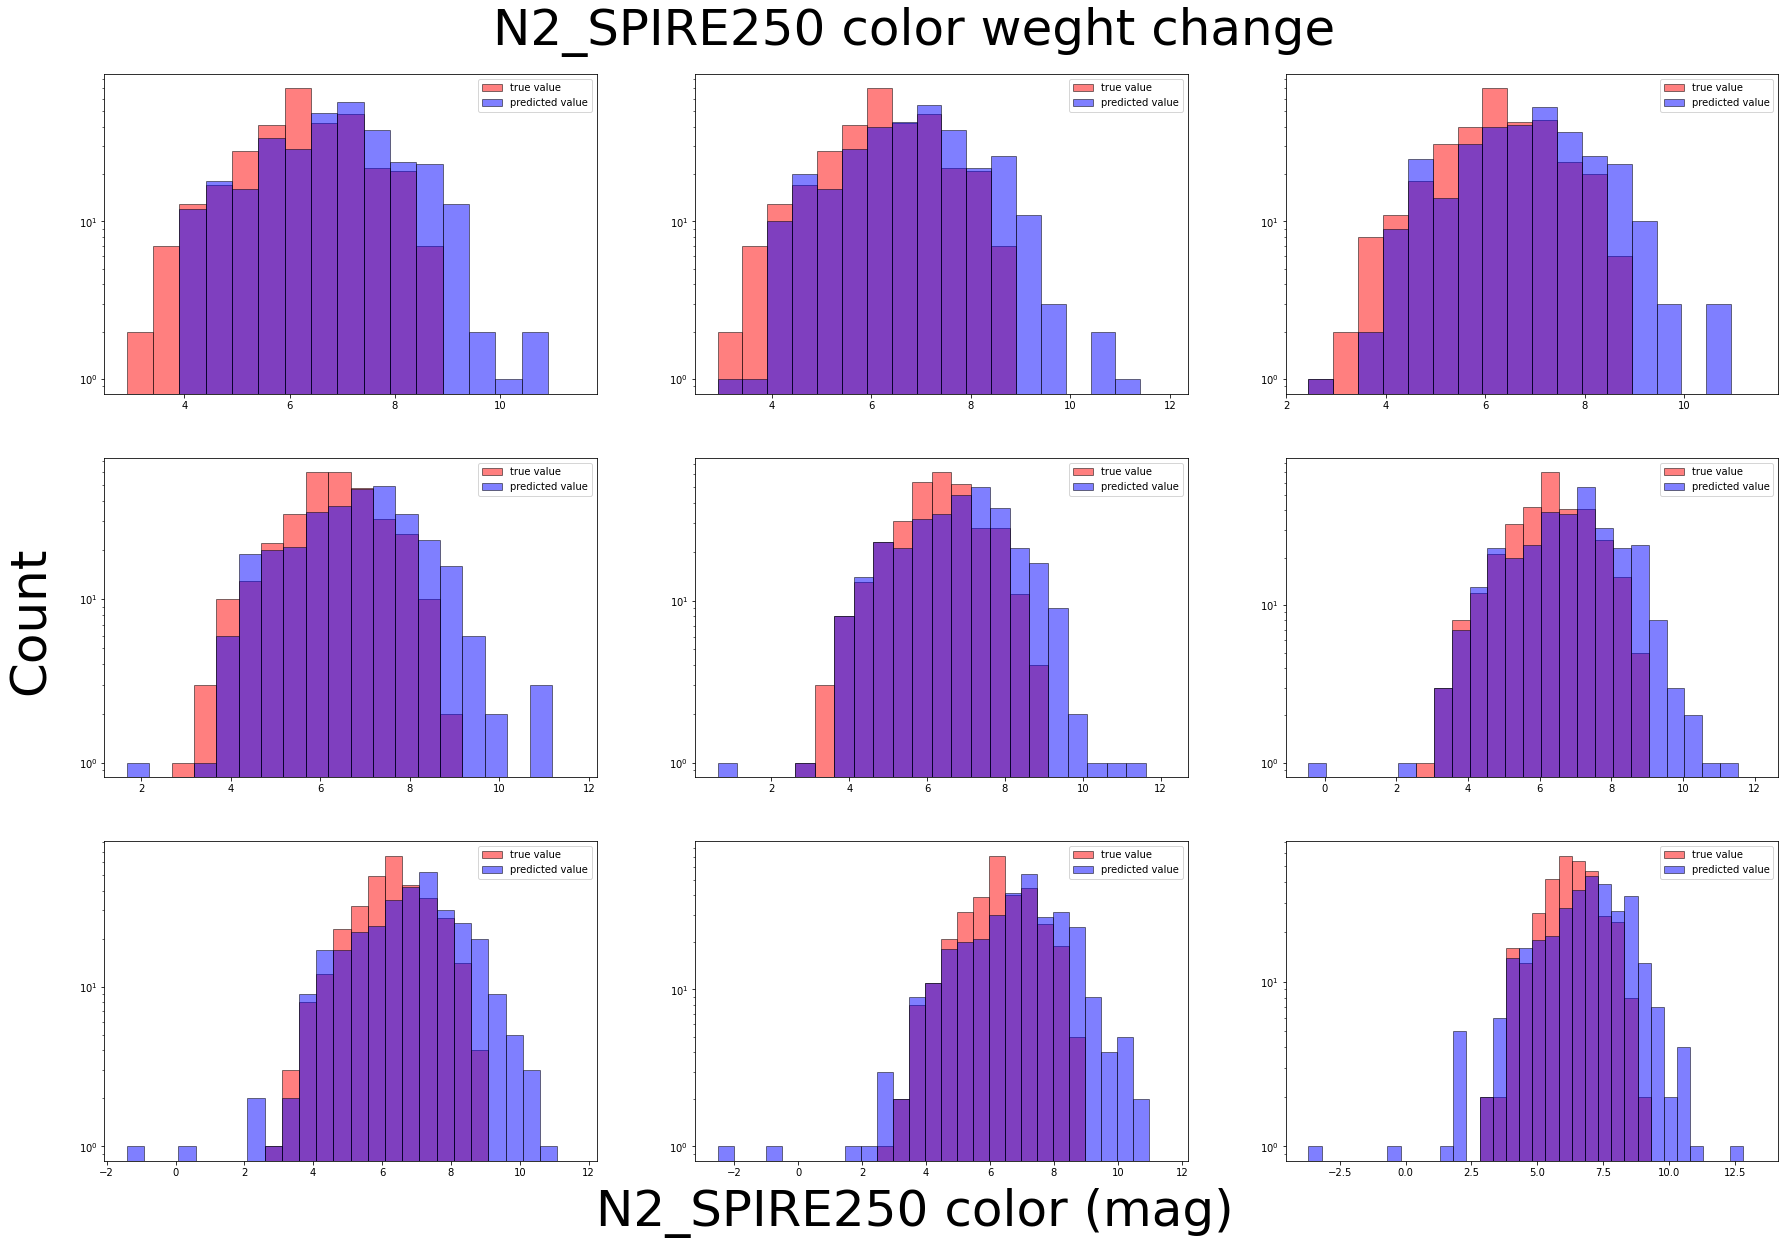

In [168]:
w=np.logspace(2,4,10)
w=w[1:]
j=0

fig, axs = plt.subplots(3,3,figsize=(30,20))
for i in w:
    
#     C=0.464158
#     gamma=0.0278255
    C=0.5778215933746764
    gamma=0.5440374915355539
    epsilon=0.1
#     w=2.54
    kernel='rbf'
    svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)

#     X=train
#     y=target['m250']
#     Y=validtrain
#     y1=validtarget['m250']
    
    X=colorbrighttrain
    y=colorbrighttarget[targetname[0]]
    Y=colorfainttrain 
    data=colorfainttarget[targetname[0]]
    

#     svrre=svr.fit(X=train250z,y=target250['m250'],sample_weight=df_weight*i).predict(Y)
#     svrre=svr.fit(X=X,y=y,sample_weight=df_reweight*i).predict(cwvalidinput250)
    svrre=svr.fit(X=X,y=y,sample_weight=df_iniweight*i).predict(Y)
    
    binwidth=0.5
#     data=target250['m250']

    
    data=data
    data1=svrre
    
    binmin=np.min([np.min(data),np.min(data1)])
    binmax=np.max([np.max(data),np.max(data1)])
    bins=np.arange(binmin,binmax+2*binwidth,binwidth)
    
    a=j//3
    b=j%3
    

    # plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
    axs[a,b].hist(data,bins=bins,label='true value',edgecolor = 'black',color='r',alpha=0.5)
    axs[a,b].hist(data1,bins=bins,label='predicted value',edgecolor = 'black',color='b',alpha=0.5)
    axs[a,b].semilogy()
    axs[a,b].legend()
#     axs[a,b].set_xlabel('SPIRE250 flux (mag)')
#     axs[a,b].set_ylabel('Count')
#     axs[a,b].set_title('svr weight target250 flux distribution re-split 13 new-w C0=0.464 w=%s'%(i))
#     max(target250['m250']),min(target250['m250'])
    j=j+1
    
fig.text(0.5, 0.08, 'N2_SPIRE250 color (mag)', ha='center',fontsize=50)
fig.text(0.08, 0.5, 'Count', va='center', rotation='vertical',fontsize=50)
fig.text(0.5,0.9,'N2_SPIRE250 color weight change',ha='center',fontsize=50)

# plt.savefig('result/color/color weight change s13 split')

In [111]:
targetname=list(colortarget.columns)
targetname=targetname[5:14]

# C=hre[2]
# gamma=hre[3]

C=0.5778215933746764
gamma=0.5440374915355539
epsilon=0.1
kernel='rbf'
svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)
rmse=[]
for  i,a in enumerate(targetname):

    X=colorbrighttrain
    y=colorbrighttarget[a]
    Y=colorfainttrain 
    data=colorfainttarget[a]
    
    svrre=svr.fit(X,y).predict(Y)
    svrtrainre=svr.fit(X,y).predict(X)
    
    mse=sklearn.metrics.mean_squared_error(data,svrre)
    rmse=math.sqrt(mse)
    trainmse=sklearn.metrics.mean_squared_error(y,svrtrainre)
    trainrmse=math.sqrt(trainmse)
    
    
#     color training and validation scattering
    fig,ax = plt.subplots(1,2)
    plt.suptitle('SVR_rbf model color 10 features scattering')
#     plt.supxlabel(f'true {a} (mag) ',fontsize=12)
#     ax.set_xlabel(f'true {a} (mag) ',fontsize=12)

#     x = np.linspace(0, 6.5, 1000)
    ax[0].plot(data,svrre,'o')
#     ax[0].plot(x+3.5, x+3.5 , linestyle='solid')
#   x=np.linspace(*plt.xlim())
    x=ax[0].get_xlim()
    ax[0].plot(x,x)
    ax[0].set_xlabel(f'true {a} (mag) ',fontsize=12)
    ax[0].set_ylabel(f'predicted {a} (mag) ',fontsize=12)
    # ax[0].legend(['','y=x'])
    ax[0].set_title('validatinon data')
    ax[0].text(6,4,'RMSE='+str(rmse)[0:5])

#     x = np.linspace(0, 7, 1000)
    ax[1].plot(y,svrtrainre,'o')
#     ax[1].plot(x+3, x+3 , linestyle='solid')
    ax[1].set_xlabel(f'true {a} data(mag)',fontsize=12)
#     x1=np.linspace(*plt.xlim())
    x1=ax[1].get_xlim()
    ax[1].plot(x1,x1)
    #ax[1].set_ylabel('predict flux(mag)')
    # ax[1].legend(['','y=x'])
    ax[1].set_title('training data')
    ax[1].text(6,4,'RMSE='+str(trainrmse)[0:5])

    # svr_lin.get_params(deep=True)
    # svr_lin_r=svr_lin.score(X_test,y_test),svr_lin.score(X_train,y_train)
    #print(svr_r)

#     plt.savefig('SVR_rbf model color 10 features')
    plt.savefig(f'result/color/train/{a} color scattering')
    plt.close()    
    
#      ### color validation distribution   
#     binwidth=0.2
#     bins=np.arange(np.min(data)-1, np.max(data) + binwidth, binwidth)
#     # plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
#     plt.hist(data,bins=bins,label='true value',edgecolor = 'black',color='r',alpha=0.5)
#     plt.hist(svrre,bins=bins,label='predicted value',edgecolor = 'black',color='b',alpha=0.5)
#     plt.xlabel(a,fontsize=12)
#     plt.ylabel('Count',fontsize=12)
#     plt.semilogy()
#     plt.legend(loc='upper left')
#     plt.title(f'{a} color distribution',fontsize=12)
#     # max(cwtarget250['m250']),min(cwtarget250['m250'])
#     plt.savefig(f'result/color/{a} color distribution')
#     plt.close()
# #     print(f'result/color/{a} color distribution')

     #### color training and validation  three  distribution 
#     binwidth=0.2
#     bins=np.arange(np.min(data)-1, np.max(data) + binwidth, binwidth)
#     # plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
# #     plt.hist(X,bins=bins,label='true value',edgecolor = 'black',color='r',alpha=0.5)
#     plt.hist(data,bins=bins,label='true value',edgecolor = 'black',color='r',alpha=0.5)
#     plt.hist(svrre,bins=bins,label='predicted value',edgecolor = 'black',color='b',alpha=0.5)
#     plt.hist(y,bins=bins,label='training data value',edgecolor = 'black',color='g',alpha=0.2)
#     plt.xlabel(a,fontsize=12)
#     plt.ylabel('Count',fontsize=12)
#     plt.semilogy()
#     plt.legend(loc='upper left')
#     plt.title(f'{a} color training data distribution',fontsize=12)
#     # max(cwtarget250['m250']),min(cwtarget250['m250'])
#     plt.savefig(f'result/color/{a} color training distribution')
#     plt.close()

     #### color validation scattering
# #     up=np.max(data,svrre)
# #     low=np.min(data,svrre)
# #     x = np.linspace(0, 6.5, 1000)
#     plt.plot(data,svrre,'o')
# #     plt.plot(x+3.5, x+3.5 , linestyle='solid')
# #     plt.axline([4,4],[5,5])
#     x=np.linspace(*plt.xlim())
#     plt.xlabel(f'true {a} (mag)',fontsize=12)
#     plt.ylabel(f'predicted {a} (mag)',fontsize=12)
#     plt.title(f'{a} color scatter plot',fontsize=12)
#     plt.plot(x,x)
#     plt.text(6,4,'RMSE='+str(rmse)[0:5],size=12)
#     plt.savefig(f'result/color/{a} color scattering')
#     plt.close()

#     binwidth=0.2
#     data=y
#     bins=np.arange(np.min(data)-1, np.max(data) + binwidth, binwidth)
#     # plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
# #     plt.hist(X,bins=bins,label='true value',edgecolor = 'black',color='r',alpha=0.5)
#     plt.hist(y,bins=bins,label='true train value',edgecolor = 'black',color='r',alpha=0.5)
#     plt.hist(svrtrainre,bins=bins,label='predicted train value',edgecolor = 'black',color='b',alpha=0.5)
# #     plt.hist(y,bins=bins,label='training data value',edgecolor = 'black',color='g',alpha=0.2)
#     plt.xlabel(a,fontsize=12)
#     plt.ylabel('Count',fontsize=12)
#     plt.semilogy()
#     plt.legend(loc='upper left')
#     plt.title(f'{a} color training data distribution',fontsize=12)
#     # max(cwtarget250['m250']),min(cwtarget250['m250'])
#     plt.savefig(f'result/color/train/{a} color training data distribution')
#     plt.close()

    
# #     up=np.max(data,svrre)
# #     low=np.min(data,svrre)
# #     x = np.linspace(0, 6.5, 1000)
#     plt.plot(data,svrtrainre,'o')
# #     plt.plot(x+3.5, x+3.5 , linestyle='solid')
# #     plt.axline([4,4],[5,5])
#     x=np.linspace(*plt.xlim())
#     plt.xlabel(f'true {a} (mag)',fontsize=12)
#     plt.ylabel(f'predicted {a} (mag)',fontsize=12)
#     plt.title(f'{a} color trainig data scatter plot',fontsize=12)
#     plt.plot(x,x)
#     plt.text(6,4,'RMSE='+str(trainrmse)[0:5],size=12)
#     plt.savefig(f'result/color/train/{a} color training data scattering')
#     plt.close()
    

In [106]:
norcolorfainttrain

,ICm_L15m,ICm_L18m,ZCm_L15m,ZCm_L18m,YCm_L15m,YCm_L18m,N2m_N3m,N2m_N4m,N2m_L18m,N2m_ir2
21,0.286668,0.308098,0.285492,0.307391,0.279739,0.306384,0.406089,0.264311,0.340806,0.246048
105,0.282830,0.221768,0.277853,0.211898,0.273582,0.209400,0.391003,0.307677,0.161225,0.172215
235,0.836012,0.838689,0.913562,0.918410,0.817180,0.834307,0.555350,0.501421,0.820242,0.435724
353,0.308320,0.287529,0.307419,0.284528,0.311845,0.292037,0.161049,0.152878,0.341787,0.209782
381,0.426849,0.406543,0.428781,0.407649,0.441389,0.424021,0.415874,0.356806,0.446829,0.338479
...,...,...,...,...,...,...,...,...,...,...
91153,0.728114,0.689482,0.637111,0.603872,0.698419,0.668354,0.393042,0.397153,0.419272,0.372327
91331,0.667249,0.671007,0.670754,0.677981,0.675053,0.689111,0.324545,0.379312,0.495886,0.279135
91374,0.427914,0.419726,0.437533,0.429008,0.444044,0.439983,0.435445,0.248941,0.474949,0.322671
91690,0.241980,0.276843,0.250331,0.285634,0.257995,0.297723,0.111307,0.146016,0.374787,0.169053


In [170]:
# cwvalidre=svr(X=cwtrain250,y=cwtarget250['m250'],test=cwvalidinput250,C=0.464158,gamma=0.0278255)
# 

# C=0.464158
# gamma=0.0278255
targetname=list(colortarget.columns)
targetname=targetname[5:14]

# C=hre[2]
# gamma=hre[3]

# C=0.5778215933746764
# gamma=0.5440374915355539
# normalized training and initial target
C=4.6415888336127775
gamma=1.0
epsilon=0.1
kernel='rbf'
svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)
rmse=[]
for  i,a in enumerate(targetname):
    if 1:
        X=norcolorbrighttrain
        y=colorbrighttarget[a]
        Y=norcolorfainttrain 
        data=colorfainttarget[a]

        svrre=svr.fit(X,y).predict(Y)
        svrtrainre=svr.fit(X,y).predict(X)

        mse=sklearn.metrics.mean_squared_error(data,svrre)
        rmse=math.sqrt(mse)
        trainmse=sklearn.metrics.mean_squared_error(y,svrtrainre)
        trainrmse=math.sqrt(trainmse)


    #     color training and validation scattering
        fig,ax = plt.subplots(1,2)
        plt.suptitle('normalized SVR_rbf model color 10 features scattering')
    #     plt.supxlabel(f'true {a} (mag) ',fontsize=12)
    #     ax.set_xlabel(f'true {a} (mag) ',fontsize=12)

    #     x = np.linspace(0, 6.5, 1000)
        ax[0].plot(data,svrre,'o')
    #     ax[0].plot(x+3.5, x+3.5 , linestyle='solid')
    #   x=np.linspace(*plt.xlim())
        x=ax[0].get_xlim()
        ax[0].plot(x,x)
        ax[0].set_xlabel(f'true {a} (mag) ',fontsize=12)
        ax[0].set_ylabel(f'predicted {a} (mag) ',fontsize=12)
        # ax[0].legend(['','y=x'])
        ax[0].set_title('validatinon data')
        ax[0].text(6,4,'RMSE='+str(rmse)[0:5])

    #     x = np.linspace(0, 7, 1000)
        ax[1].plot(y,svrtrainre,'o')
    #     ax[1].plot(x+3, x+3 , linestyle='solid')
        ax[1].set_xlabel(f'true {a} data(mag)',fontsize=12)
    #     x1=np.linspace(*plt.xlim())
        x1=ax[1].get_xlim()
        ax[1].plot(x1,x1)
        #ax[1].set_ylabel('predict flux(mag)')
        # ax[1].legend(['','y=x'])
        ax[1].set_title('training data')
        ax[1].text(6,4,'RMSE='+str(trainrmse)[0:5])

        # svr_lin.get_params(deep=True)
        # svr_lin_r=svr_lin.score(X_test,y_test),svr_lin.score(X_train,y_train)
        #print(svr_r)

    #     plt.savefig('SVR_rbf model color 10 features')
        plt.savefig(f'result/color/output/normalize/normalized {a} color scattering')
        plt.close()    

         ### color validation distribution   
        binwidth=0.2
        bins=np.arange(np.min(data)-1, np.max(data) + binwidth, binwidth)
        # plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
        plt.hist(data,bins=bins,label='true value',edgecolor = 'black',color='r',alpha=0.5)
        plt.hist(svrre,bins=bins,label='predicted value',edgecolor = 'black',color='b',alpha=0.5)
        plt.xlabel(a,fontsize=12)
        plt.ylabel('Count',fontsize=12)
        plt.semilogy()
        plt.legend(loc='upper left')
        plt.title(f'normalized {a} color distribution',fontsize=12)
        # max(cwtarget250['m250']),min(cwtarget250['m250'])
        plt.savefig(f'result/color/output/normalize/normalized {a} color distribution')
        plt.close()
    #     print(f'result/color/{a} color distribution')

    #      ### color training and validation  three  distribution 
    #     binwidth=0.2
    #     bins=np.arange(np.min(data)-1, np.max(data) + binwidth, binwidth)
    #     # plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
    # #     plt.hist(X,bins=bins,label='true value',edgecolor = 'black',color='r',alpha=0.5)
    #     plt.hist(data,bins=bins,label='true value',edgecolor = 'black',color='r',alpha=0.5)
    #     plt.hist(svrre,bins=bins,label='predicted value',edgecolor = 'black',color='b',alpha=0.5)
    #     plt.hist(y,bins=bins,label='training data value',edgecolor = 'black',color='g',alpha=0.2)
    #     plt.xlabel(a,fontsize=12)
    #     plt.ylabel('Count',fontsize=12)
    #     plt.semilogy()
    #     plt.legend(loc='upper left')
    #     plt.title(f'{a} color training data distribution',fontsize=12)
    #     # max(cwtarget250['m250']),min(cwtarget250['m250'])
    #     plt.savefig(f'result/color/{a} color training distribution')
    #     plt.close()

         #### color validation scattering
    # #     up=np.max(data,svrre)
    # #     low=np.min(data,svrre)
    # #     x = np.linspace(0, 6.5, 1000)
    #     plt.plot(data,svrre,'o')
    # #     plt.plot(x+3.5, x+3.5 , linestyle='solid')
    # #     plt.axline([4,4],[5,5])
    #     x=np.linspace(*plt.xlim())
    #     plt.xlabel(f'true {a} (mag)',fontsize=12)
    #     plt.ylabel(f'predicted {a} (mag)',fontsize=12)
    #     plt.title(f'{a} color scatter plot',fontsize=12)
    #     plt.plot(x,x)
    #     plt.text(6,4,'RMSE='+str(rmse)[0:5],size=12)
    #     plt.savefig(f'result/color/{a} color scattering')
    #     plt.close()

        ### color training data distribution
        binwidth=0.2
        data=y
        bins=np.arange(np.min(data)-1, np.max(data) + binwidth, binwidth)
        # plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
    #     plt.hist(X,bins=bins,label='true value',edgecolor = 'black',color='r',alpha=0.5)
        plt.hist(y,bins=bins,label='true train value',edgecolor = 'black',color='r',alpha=0.5)
        plt.hist(svrtrainre,bins=bins,label='predicted train value',edgecolor = 'black',color='b',alpha=0.5)
    #     plt.hist(y,bins=bins,label='training data value',edgecolor = 'black',color='g',alpha=0.2)
        plt.xlabel(a,fontsize=12)
        plt.ylabel('Count',fontsize=12)
        plt.semilogy()
        plt.legend(loc='upper left')
        plt.title(f'normalized {a} color training data distribution',fontsize=12)
        # max(cwtarget250['m250']),min(cwtarget250['m250'])
        plt.savefig(f'result/color/output/normalize/normalized {a} color training data distribution')
        plt.close()

    
# #     up=np.max(data,svrre)
# #     low=np.min(data,svrre)
# #     x = np.linspace(0, 6.5, 1000)
#     plt.plot(data,svrtrainre,'o')
# #     plt.plot(x+3.5, x+3.5 , linestyle='solid')
# #     plt.axline([4,4],[5,5])
#     x=np.linspace(*plt.xlim())
#     plt.xlabel(f'true {a} (mag)',fontsize=12)
#     plt.ylabel(f'predicted {a} (mag)',fontsize=12)
#     plt.title(f'{a} color trainig data scatter plot',fontsize=12)
#     plt.plot(x,x)
#     plt.text(6,4,'RMSE='+str(trainrmse)[0:5],size=12)
#     plt.savefig(f'result/color/train/{a} color training data scattering')
#     plt.close()
    

In [79]:
# # mse=sklearn.metrics.mean_squared_error(data,svrre)
# # rmse=math.sqrt(mse)
# fig,ax = plt.subplots(1,2)
# x = np.linspace(0, 6.5, 1000)
# # plt.plot(data,svrre,'o')
# ax[0].plot(x+3.5, x+3.5 , linestyle='solid')
# # x=np.linspace(ax[0].get_xlim())
# print(x)
# # plt.text(6,4,'RMSE='+str(rmse)[0:5])
# # plt.savefig('result/color/train/test/a')
# ax[0].get_xlim()

In [250]:
# x=0
# df_weight['weight']=pd.DataFrame(data=x)
df_cwweight=[0 for i in range(1482)]
# df_cwweight_original=[0 for i in range(1482)]
# df_weight=[0 for i in range(1800)]
cweight_N2T=cweight_N2.T
for i in range(len(cwtrain250['N2m'])):
    bmin=min(cwbins_N2)
#     bmin1=min(bins_N2)
    j=0
#     if train250z['N2m'].iloc[i] < bmin: 
#         df_weight.append(weight_N2.iloc(j))
#         break
#     else: 
#         bmin=bmin+0.5
#         j=j+1  
        
        
    while cwtrain250['N2m'].iloc[i] > bmin:
        df_cwweight[i]=cweight_N2T[0].iloc[j]
        j=j+1
        bmin=bmin+0.5

    
# len(weight_N2)
# df_weight[1]=1
df_cwweight=np.array(df_cwweight)
# df_cwweight_original=np.array(df_cwweight_original)

In [249]:
# x=0
# df_weight['weight']=pd.DataFrame(data=x)
df_cwweightex=[0 for i in range(1482)]
# df_cwweight_original=[0 for i in range(1482)]
# df_weight=[0 for i in range(1800)]
cweight_N2Tex=cweight_N2ex.T
for i in range(len(cwtrain250['N2m'])):
    bmin=min(cwbins_N2)
#     bmin1=min(bins_N2)
    j=0
#     if train250z['N2m'].iloc[i] < bmin: 
#         df_weight.append(weight_N2.iloc(j))
#         break
#     else: 
#         bmin=bmin+0.5
#         j=j+1  
        
        
    while cwtrain250['N2m'].iloc[i] > bmin:
        df_cwweightex[i]=cweight_N2Tex[0].iloc[j]
        j=j+1
        bmin=bmin+0.5

    
# len(weight_N2)
# df_weight[1]=1
df_cwweightex=np.array(df_cwweightex)
# df_cwweight_original=np.array(df_cwweight_original)

In [227]:
# x=0
# df_weight['weight']=pd.DataFrame(data=x)
# df_cwweight=[0 for i in range(1482)]
df_cwweight_original=[0 for i in range(1482)]
# df_weight=[0 for i in range(1800)]
cweight_N2T=cweight_N2.T
for i in range(len(cwtrain250['N2m'])):
#     bmin=min(cwbins_N2)
    bmin1=min(bins_N2)
    j=0
#     if train250z['N2m'].iloc[i] < bmin: 
#         df_weight.append(weight_N2.iloc(j))
#         break
#     else: 
#         bmin=bmin+0.5
#         j=j+1  
    
        
    while cwtrain250['N2m'].iloc[i] > bmin1:
        df_cwweight_original[i]=weight_N2.iloc[j]
        j=j+1
        bmin1=bmin1+0.5
    
    
# len(weight_N2)
# df_weight[1]=1
# df_cwweight=np.array(df_cwweight)
df_cwweight_original=np.array(df_cwweight_original)

In [213]:
s12cwtarget250

,m250
21,12.309
105,12.265
235,12.423
353,12.410
381,12.016
...,...
91153,12.183
91331,12.272
91374,12.368
91690,11.875


In [214]:
# x=0
# df_weight['weight']=pd.DataFrame(data=x)
s12df_cwweight=[0 for i in range(977)]
# df_cwweight_original=[0 for i in range(1482)]
# df_weight=[0 for i in range(1800)]
s12cweight_N2T=s12cweight_N2.T
for i in range(len(s12cwtrain250['N2m'])):
    bmin=min(s12cwbins_N2)
#     bmin1=min(bins_N2)
    j=0
#     if train250z['N2m'].iloc[i] < bmin: 
#         df_weight.append(weight_N2.iloc(j))
#         break
#     else: 
#         bmin=bmin+0.5
#         j=j+1  
        
        
    while s12cwtrain250['N2m'].iloc[i] > bmin:
        s12df_cwweight[i]=s12cweight_N2T[0].iloc[j]
        j=j+1
        bmin=bmin+0.5

    
# len(weight_N2)
# df_weight[1]=1
s12df_cwweight=np.array(s12df_cwweight)
# df_cwweight_original=np.array(df_cwweight_original)

In [224]:
# x=0
# df_weight['weight']=pd.DataFrame(data=x)
s12df_cwweight_original=[0 for i in range(977)]
# df_cwweight_original=[0 for i in range(1482)]
# df_weight=[0 for i in range(1800)]
s12cweight_N2T=s12cweight_N2.T
for i in range(len(s12cwtrain250['N2m'])):
    bmin=min(s12cwbins_N2)
#     bmin1=min(bins_N2)
    j=0
#     if train250z['N2m'].iloc[i] < bmin: 
#         df_weight.append(weight_N2.iloc(j))
#         break
#     else: 
#         bmin=bmin+0.5
#         j=j+1  
        
        
    while s12cwtrain250['N2m'].iloc[i] > bmin:
        s12df_cwweight_original[i]=weight_N2.iloc[j]
        j=j+1
        bmin=bmin+0.5

    
# len(weight_N2)
# df_weight[1]=1
# s12df_cwweight=np.array(s12df_cwweight)
s12df_cwweight_original=np.array(s12df_cwweight_original)

In [50]:
# s12df_cwweight_original

In [48]:
cwre=heatmap(X=cwtrain250,y=cwtarget250['m250'])

0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9


In [54]:
cwre[2:]

(0.46415888336127786,
 0.027825594022071243,
 0.29321162490574443,
 0.2750911214620372)

In [109]:
# cwvalidre=svr(X=cwtrain250,y=cwtarget250['m250'],test=cwvalidinput250,C=0.464158,gamma=0.0278255)
# 

C=0.464158
gamma=0.0278255
epsilon=0.1
kernel='rbf'
svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)
X=cwtrain250
y=cwtarget250['m250']
Y=cwvalidinput250
svrre=svr.fit(X,y).predict(Y)

binwidth=0.05
data=cwvalid250['m250']
bins=np.arange(np.min(data)-1, np.max(data) + binwidth, binwidth)
# plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
plt.hist(cwvalid250['m250'],bins=bins,label='training',edgecolor = 'black',color='r',alpha=0.5)
plt.hist(svrre,bins=bins,label='svr test',edgecolor = 'black',color='b',alpha=0.5)
plt.semilogy()
plt.legend()
plt.title('target250 flux distribution')
max(cwtarget250['m250']),min(cwtarget250['m250'])
# plt.savefig('result/distribution/')

NameError: name 'cwvalid250' is not defined

In [51]:
# svrre

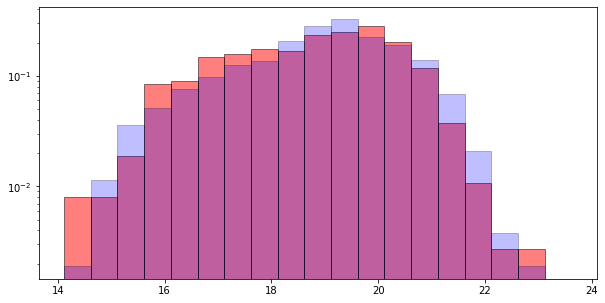

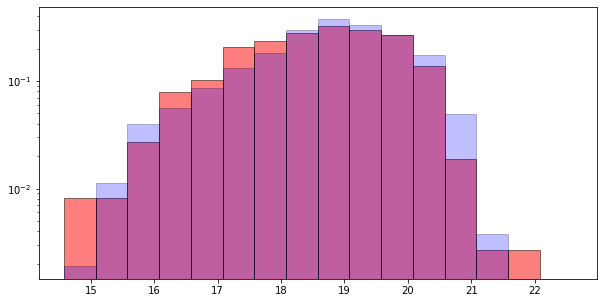

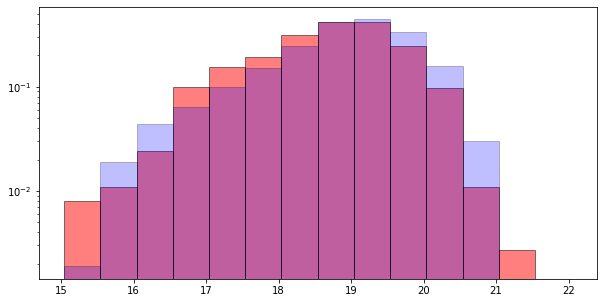

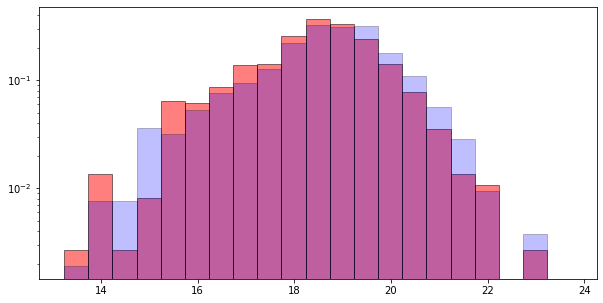

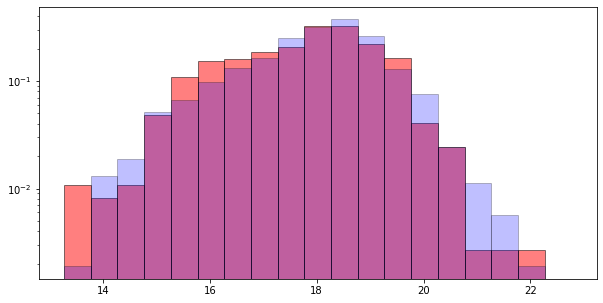

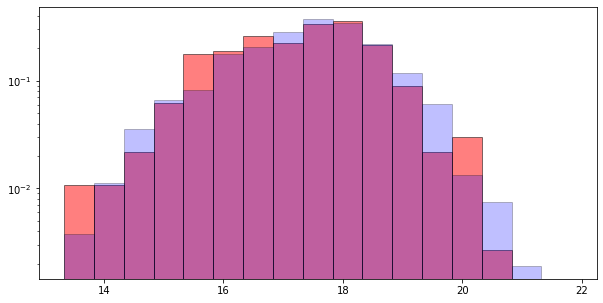

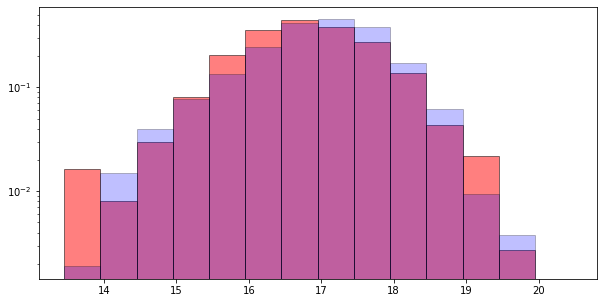

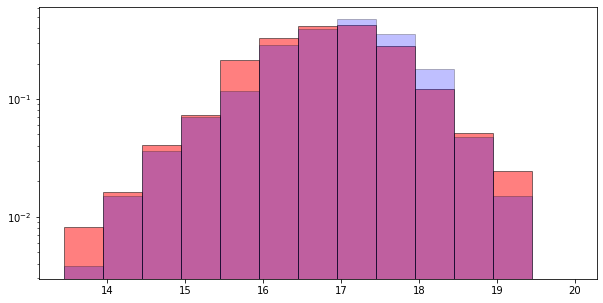

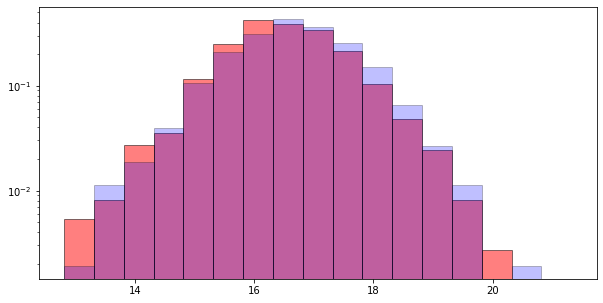

In [294]:
# fig.suptitle('test and imp distribtion',fontsize=20)
# com=[re1,re2,re3,re4,re5,re6,re7,re8,re9]
col=['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2']
binwidth=0.5
colors=['r','b']
# label=['test','test_imp']
counttrain=[]
counttest=[]
binrange=[]
bar=[]
for i in range(9):
    fig, axs = plt.subplots(1,figsize=(10,5))
    x1=testz[col[i]]
#     x2=s12cwtrain250[col[i]]
# #     y1=xgbtrain250[col[i]]
#     y2=s12cwvalidinput250[col[i]]
    
    x2=cwtrain250[col[i]]
    y2=cwvalidinput250[col[i]]
    
    
    x2=train[col[i]]
    y2=validtrain[col[i]]
    
#     counts, bins, bars = plt.hist([x1,x2]) 
#     count.append(counts)
#     plt.cla()
        
    binmin=np.min([np.min(x2),np.min(y2)])
    binmax=np.max([np.max(x2),np.max(y2)])
    bins=np.arange(binmin,binmax+2*binwidth,binwidth)
    axs.semilogy()
#     counts, bins, bars=axs[i].hist([x1,x2],bins=bins,alpha=0.5,label=label,edgecolor = 'black',color=colors,align='left')
    counts, bins, bars = axs.hist(x2,bins=bins,alpha=0.5,label='inference',edgecolor = 'black',color='r',align='left',density=True)
    counttrain.append(counts)
    binrange.append(bins)
#     bar.append(bars)
    counts, bins, bars = axs.hist(y2,bins=bins,alpha=0.25,label='train',edgecolor = 'black',color='b',align='left',density=True)
    counttest.append(counts)
    binrange.append(bins)
#     print(counts,bins,bars)
#     print(counts[0])

#     axs1=axs.twinx()
#     axs1.plot(com[i]['bins'],com[i]['mean'],linewidth=5,label='completeness',color='g')
#     axs1.set_ylabel('completeness',fontsize=20,color='g')
#     axs1.legend(loc='upper left')
    
#     axs.set_title(col[i],fontsize=20)
#     axs.legend()
#     axs.set_xlabel('mag',fontsize=20)
#     axs.set_ylabel('count',fontsize=20)

# #     plt.show()
#     plt.savefig('result/train and test log density distribution with completeness %s'%(col[i]))


In [255]:
cweight_N2,weight_N2,cweight_N2ex

(   0  1  2         3         4         5        6         7         8  \
 0  0  0  0  0.081761  0.064727  0.427994  0.77673  0.572997  1.065229   
 
           9        10       11        12        13       14  15  16  17  
 0  1.475786  1.305806  1.34693  1.123779  1.588765  1.63743   0   0   0  ,
 0     0.046522
 1     0.070891
 2     0.050101
 3     0.058210
 4     0.111136
 5     0.151627
 6     0.263713
 7     0.491021
 8     0.713772
 9     0.886693
 10    1.172040
 11    1.664635
 12    1.921892
 13    1.760838
 14    1.634100
 15    1.463779
 16    2.711564
 17    0.000000
 18    0.000000
 19    0.000000
 Name: 2, dtype: float64,
    0  1  2         3         4         5        6         7         8  \
 0  0  0  0  0.081761  0.064727  0.427994  0.77673  0.572997  1.065229   
 
           9        10       11        12        13       14       15       16  \
 0  1.475786  1.305806  1.34693  1.123779  1.588765  1.63743  1.63743  1.63743   
 
         17  
 0  1.63743  )

In [258]:
cwbins_N2,bins_N2

(0     14.366
 1     14.866
 2     15.366
 3     15.866
 4     16.366
 5     16.866
 6     17.366
 7     17.866
 8     18.366
 9     18.866
 10    19.366
 11    19.866
 12    20.366
 13    20.866
 14    21.366
 15    21.866
 16    22.366
 17    22.866
 18    23.366
 19    23.866
 Name: 0, dtype: float64,
 0     14.366
 1     14.866
 2     15.366
 3     15.866
 4     16.366
 5     16.866
 6     17.366
 7     17.866
 8     18.366
 9     18.866
 10    19.366
 11    19.866
 12    20.366
 13    20.866
 14    21.366
 15    21.866
 16    22.366
 17    22.866
 18    23.366
 19    23.866
 20    24.366
 Name: 0, dtype: float64)

In [295]:
df_counttrain = pd.DataFrame(data=counttrain)
df_counttest = pd.DataFrame(data=counttest)
df_binrange = pd.DataFrame(data=binrange)

In [296]:
df_counttrain.to_csv('data/weight/re weight s13 train bin=0.5.csv')
df_counttest.to_csv('data/weight/re weight s13 test bin=0.5.csv')

In [211]:
s12df_count=pd.read_csv('data/weight/check weight s12 train bin=0.5 N2.csv',index_col=0)

In [212]:
s12cwbins_N2=df_binrange.loc[0].dropna()
s12cweight_N2=s12df_count

In [109]:
df_count=pd.read_csv('data/weight/check weight N2.csv',index_col=0)

In [246]:
df_countex=pd.read_csv('data/weight/check weight N2 extrapolate.csv',index_col=0)

In [297]:
count=pd.read_csv('data/weight/re weight s13 train bin=0.5 N2.csv',index_col=0)

In [301]:
train

,GCm,RCm,ICm,ZCm,YCm,N2m,N3m,N4m,S7m,S9m,S11m,L15m,L18m,L24m,w1m,w2m,ir1,ir2,z
46563,21.860,20.572,19.63200,19.222,18.985000,17.921000,18.114000,18.356000,17.951000,17.332000,17.056000,16.679000,16.847000,17.038000,18.344000,18.535000,18.083000,18.017000,0.362
46574,24.663,23.886,23.40300,22.804,22.396000,20.223096,20.298000,20.209000,17.370982,19.085033,19.236012,18.777366,18.095000,17.754685,20.422000,19.930000,19.477000,19.938000,1.916
46582,18.182,17.484,17.24300,17.113,16.916000,16.786000,17.205000,17.845000,15.981000,15.766000,15.756000,16.102904,16.025009,15.243918,17.251000,17.673000,17.134000,17.514000,0.077
46583,20.006,18.728,18.09200,17.758,17.556000,17.056000,17.469000,17.880000,17.911000,16.821000,16.621000,16.532300,16.368382,16.188760,17.511000,17.797000,17.513000,17.610000,0.269
46598,24.994,24.170,23.37700,22.740,22.527000,20.171000,19.276000,19.273000,19.092966,18.388486,17.646231,16.691000,17.079000,16.658888,19.877000,19.775000,19.506000,19.303000,1.642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91153,24.212,23.352,24.04000,22.496,22.708000,19.025000,18.743000,18.853000,18.837000,18.385000,18.143000,17.171000,17.354000,17.170136,18.960000,18.946000,18.600000,18.595000,1.930
91331,23.949,23.554,22.81700,22.211,21.883000,18.619000,18.505000,18.512000,19.301968,18.948000,18.106000,16.564000,16.328000,16.264905,18.814000,18.911000,18.579523,18.560228,1.616
91374,24.374,22.858,22.05800,21.642,21.391000,20.370000,19.984000,20.738000,19.616591,19.042935,18.637473,17.639115,18.006989,16.862486,20.187000,21.089000,20.168000,20.207000,0.551
91690,19.820,18.476,17.94000,17.614,17.419000,16.965000,17.374000,17.708000,17.276000,16.394000,16.106000,15.991000,15.654000,15.138662,17.594000,17.788000,17.514000,17.628000,0.256


In [309]:
rebins_N2=df_binrange.loc[0].dropna()
reweight_N2=count

# x=0
# df_weight['weight']=pd.DataFrame(data=x)
df_reweight=[0 for i in range(741)]
# df_cwweight_original=[0 for i in range(1482)]
# df_weight=[0 for i in range(1800)]
reweight_N2T=reweight_N2.T
for i in range(len(train['N2m'])):
    bmin=min(rebins_N2)
#     bmin1=min(bins_N2)
    j=0
#     if train250z['N2m'].iloc[i] < bmin: 
#         df_weight.append(weight_N2.iloc(j))
#         break
#     else: 
#         bmin=bmin+0.5
#         j=j+1         
    while train['N2m'].iloc[i] > bmin:
#         df_reweight[i]=reweight_N2.T[0].iloc[j]
        df_reweight[i]=weight_N2[j]
        j=j+1
        bmin=bmin+0.5

    
# len(weight_N2)
# df_weight[1]=1
df_reweight=np.array(df_reweight)
# df_cwweight_original=np.array(df_cwweight_original)

In [311]:
len(df_reweight)

741

In [247]:
cwbins_N2=df_binrange.loc[0].dropna()
cweight_N2=df_count

cwbins_N2=df_binrange.loc[0].dropna()
cweight_N2ex=df_count

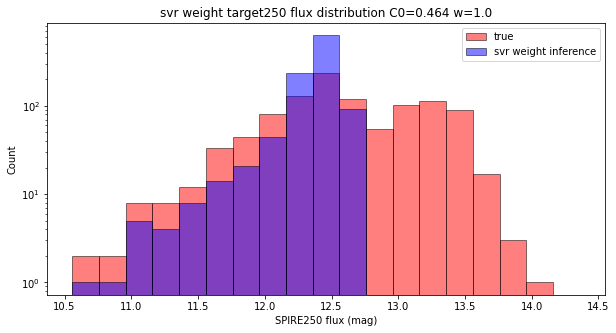

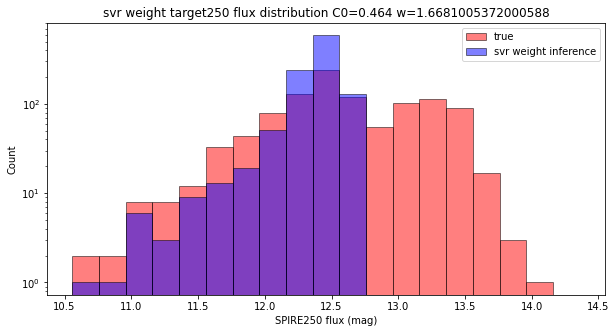

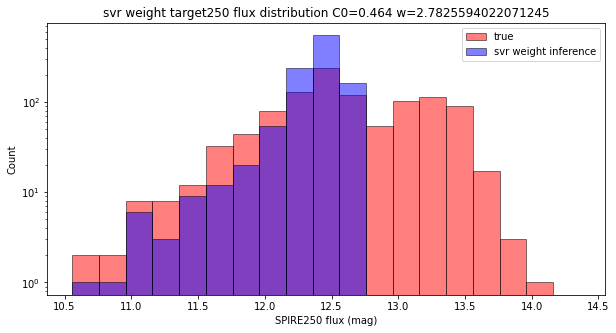

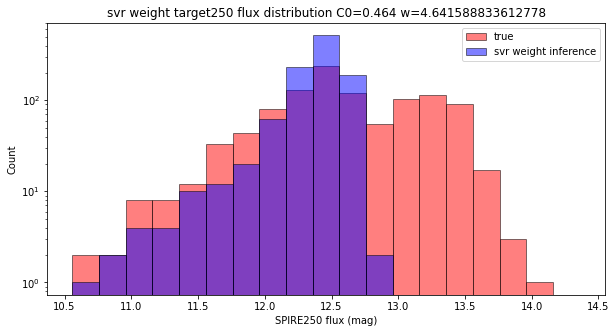

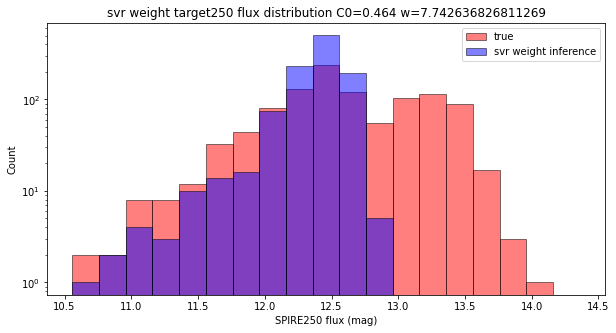

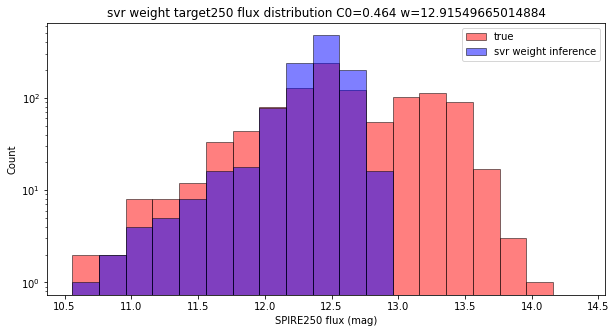

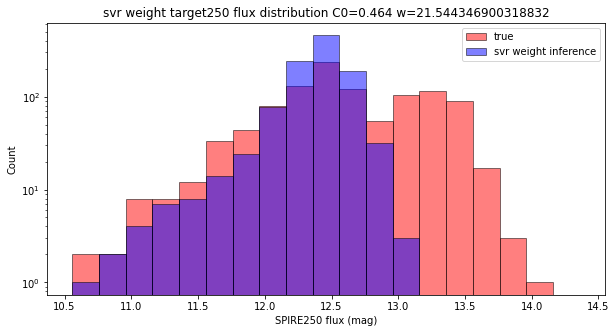

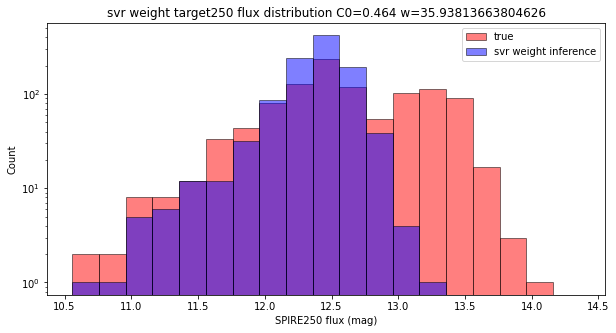

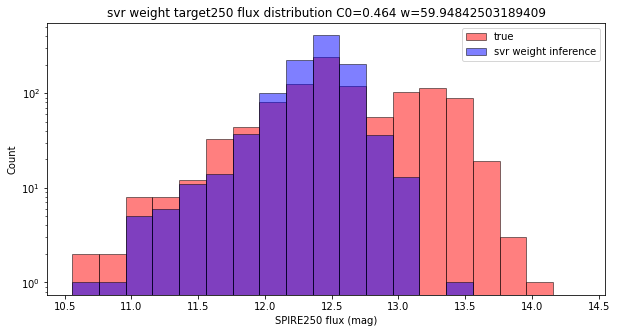

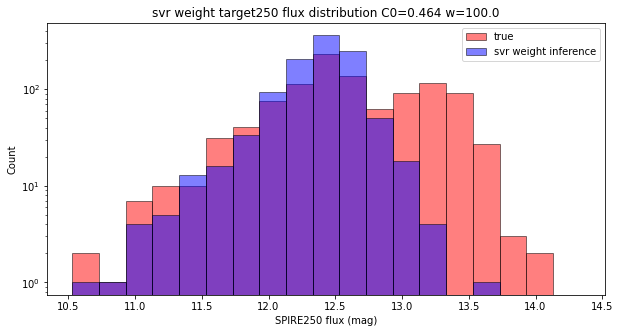

In [304]:
w=np.logspace(0,2,10)
j=0
# w=np.array([100000])
for i in w:
    fig, axs = plt.subplots(1,figsize=(10,5))
    C=0.464158
    gamma=0.0278255
    epsilon=0.1
#     w=2.54
    kernel='rbf'
    svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)

    # knnre=knn.fit(train250z,y=target250['m250']).predict(testz_imp)

    # X=train250z[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','z']]
    # Yz=testz_imp[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','z']]

    X=cwtrain250
    y=cwtarget250['m250']
    Y=cwvalidinput250
    y1=cwvalidtarget250['m250']
#     weight=np.abs(np.random.randn(1800))

    X=train
    y=target['m250']
    Y=validtrain
    y1=validtarget['m250']

    svrre=svr.fit(X=X,y=y,sample_weight=df_reweight*i).predict(Y)

    binwidth=0.2
    data=y1
    data1=svrre
    binmin=np.min([np.min(data),np.min(data1)])
    binmax=np.max([np.max(data),np.max(data1)])
    bins=np.arange(binmin,binmax+2*binwidth,binwidth)


    # plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
    axs.hist(y1,bins=bins,label='true',edgecolor = 'black',color='r',alpha=0.5)
    axs.hist(svrre,bins=bins,label='svr weight inference',edgecolor = 'black',color='b',alpha=0.5)
    axs.semilogy()
    axs.legend()
    axs.set_xlabel('SPIRE250 flux (mag)')
    axs.set_ylabel('Count')
    axs.set_title('svr weight target250 flux distribution C0=0.464 w=%s'%(i))
#     max(target250['m250']),min(target250['m250'])
#     plt.savefig('result/distribution/svr weight target250 flux distribution')

    j=j+1
    
# plt.savefig('result/distribution/svr weight log distribution C0=0464 w%s'%(j))

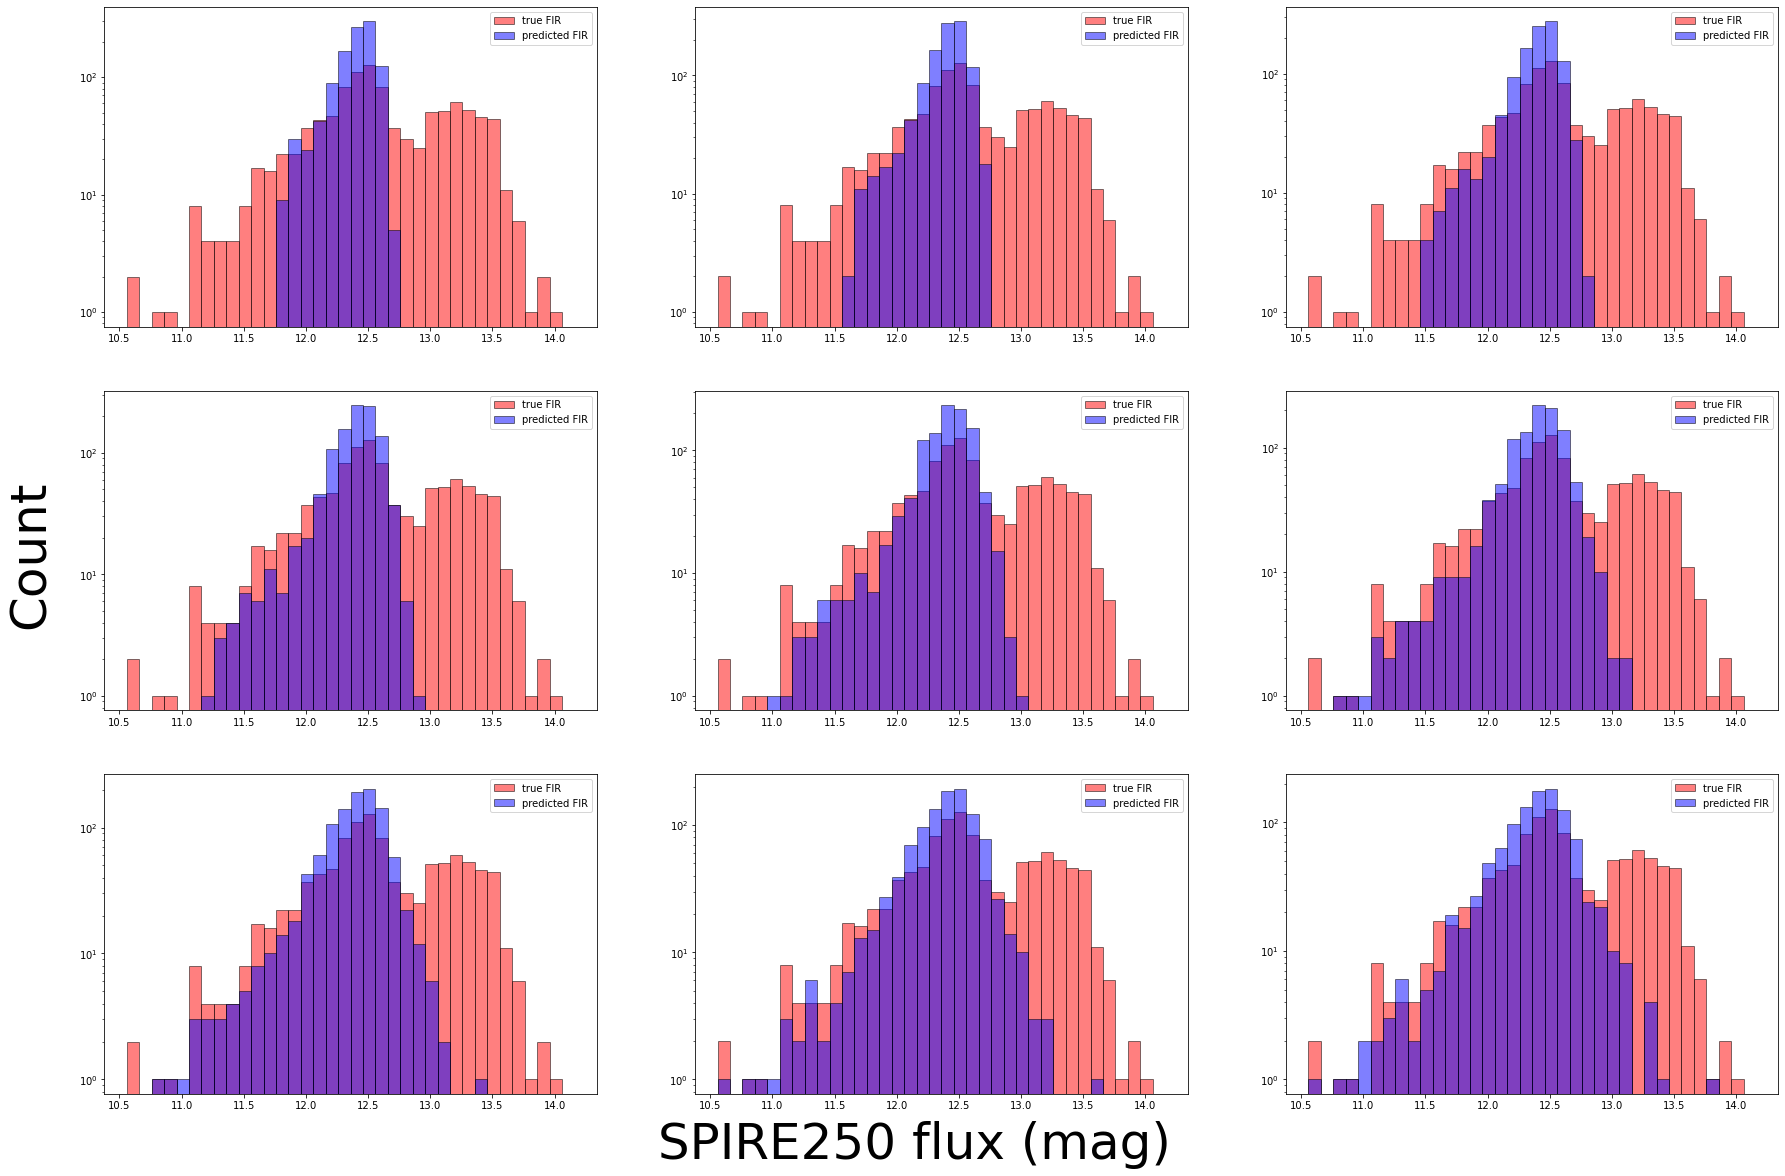

In [317]:
w=np.logspace(0,2,10)
w=w[1:]
j=0

fig, axs = plt.subplots(3,3,figsize=(30,20))
for i in w:
    
    C=0.464158
    gamma=0.0278255
    epsilon=0.1
#     w=2.54
    kernel='rbf'
    svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)

    # knnre=knn.fit(train250z,y=target250['m250']).predict(testz_imp)

    # X=train250z[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','z']]
    # Yz=testz_imp[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','z']]

#     X=cwtrain250
#     y=cwtarget250['m250']
#     Y=cwvalidinput250
#     y1=cwvalidtarget250['m250']


    X=train
    y=target['m250']
    Y=validtrain
    y1=validtarget['m250']

#     svrre=svr.fit(X=train250z,y=target250['m250'],sample_weight=df_weight*i).predict(Y)
#     svrre=svr.fit(X=X,y=y,sample_weight=df_reweight*i).predict(cwvalidinput250)
    svrre=svr.fit(X=X,y=y,sample_weight=df_reweight*i).predict(Y)
    
    binwidth=0.1
#     data=target250['m250']

    
    data=y1
    data1=svrre
    
    binmin=np.min([np.min(data),np.min(data1)])
    binmax=np.max([np.max(data),np.max(data1)])
    bins=np.arange(binmin,binmax+2*binwidth,binwidth)
    
    a=j//3
    b=j%3
    

    # plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
    axs[a,b].hist(data,bins=bins,label='true FIR',edgecolor = 'black',color='r',alpha=0.5)
    axs[a,b].hist(data1,bins=bins,label='predicted FIR',edgecolor = 'black',color='b',alpha=0.5)
    axs[a,b].semilogy()
    axs[a,b].legend()
#     axs[a,b].set_xlabel('SPIRE250 flux (mag)')
#     axs[a,b].set_ylabel('Count')
#     axs[a,b].set_title('svr weight target250 flux distribution re-split 13 new-w C0=0.464 w=%s'%(i))
#     max(target250['m250']),min(target250['m250'])
    j=j+1
    
fig.text(0.5, 0.08, 'SPIRE250 flux (mag)', ha='center',fontsize=50)
fig.text(0.08, 0.5, 'Count', va='center', rotation='vertical',fontsize=50)

# plt.savefig('result/distribution/svr weight log change s13 split reweight')

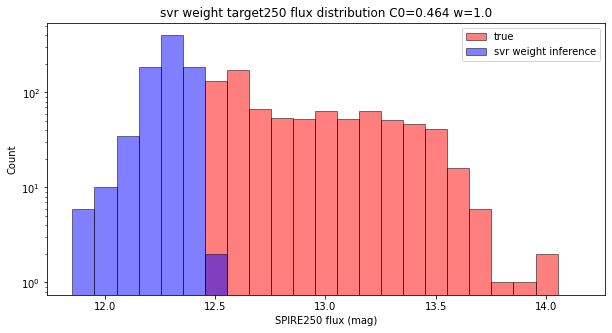

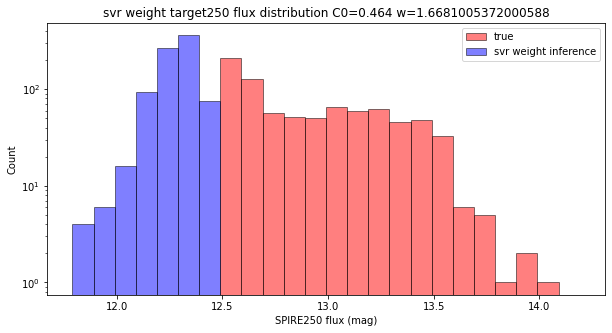

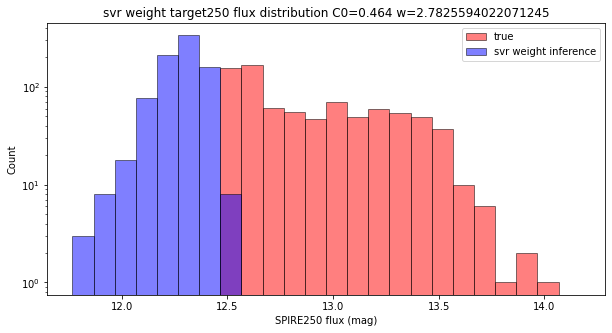

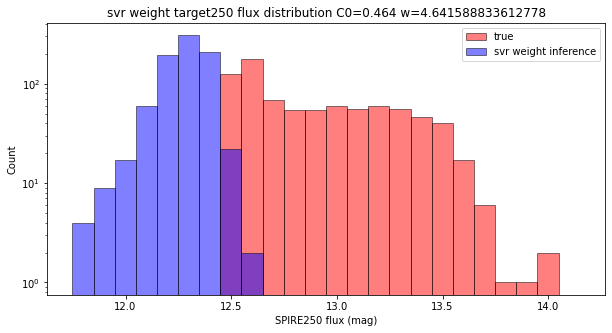

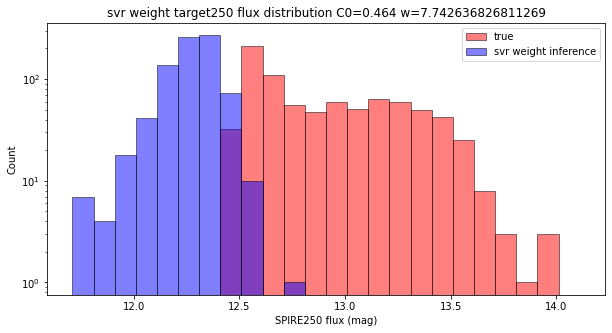

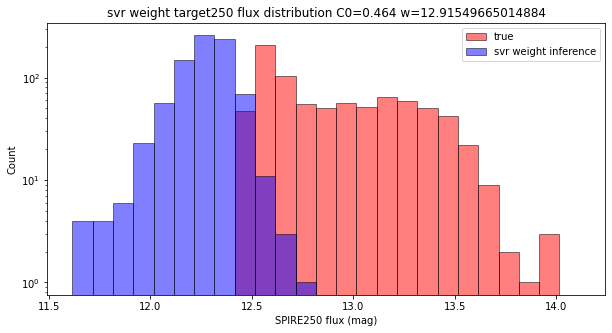

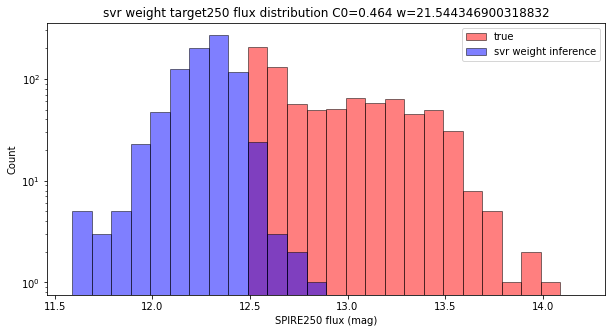

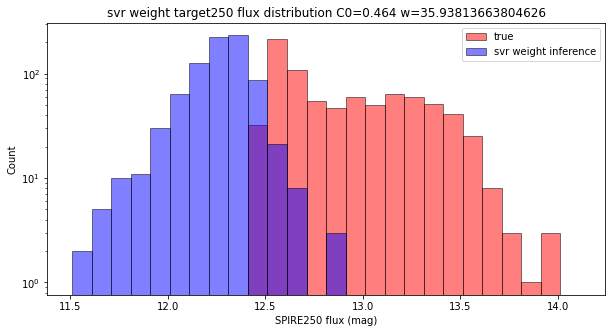

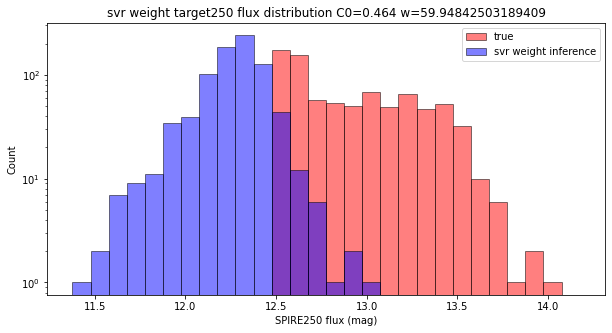

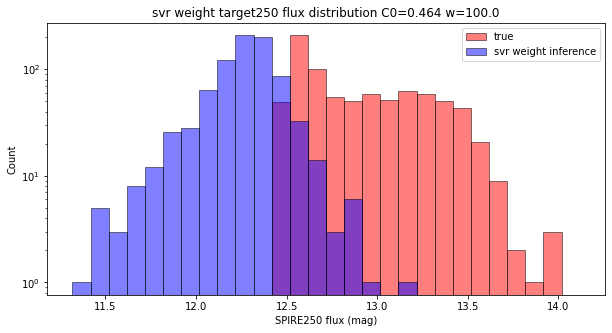

In [226]:
# w=np.linspace(1,2,10)
w=np.logspace(0,2,10)
j=0
for i in w:
    fig, axs = plt.subplots(1,figsize=(10,5))
    C=0.464158
    gamma=0.0278255
    epsilon=0.1
#     w=2.54
    kernel='rbf'
    svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)

    # knnre=knn.fit(train250z,y=target250['m250']).predict(testz_imp)

    # X=train250z[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','z']]
    # Yz=testz_imp[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','z']]

    X=s12cwtrain250
    y=s12cwtarget250['m250']
    Y=s12cwvalidinput250
    y1=s12cwvalidtarget250['m250']
#     weight=np.abs(np.random.randn(1800))

#     X=train
#     y=target['m250']
#     Y=validtrain
#     y1=validtarget['m250']

    svrre=svr.fit(X=X,y=y,sample_weight=s12df_cwweight_original*i).predict(Y)

    binwidth=0.1
    data=y1
    data1=svrre
    binmin=np.min([np.min(data),np.min(data1)])
    binmax=np.max([np.max(data),np.max(data1)])
    bins=np.arange(binmin,binmax+2*binwidth,binwidth)


    # plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
    axs.hist(y1,bins=bins,label='true',edgecolor = 'black',color='r',alpha=0.5)
    axs.hist(svrre,bins=bins,label='svr weight inference',edgecolor = 'black',color='b',alpha=0.5)
    axs.semilogy()
    axs.legend()
    axs.set_xlabel('SPIRE250 flux (mag)')
    axs.set_ylabel('Count')
    axs.set_title('svr weight target250 flux distribution C0=0.464 w=%s'%(i))
#     max(target250['m250']),min(target250['m250'])
#     plt.savefig('result/distribution/svr weight target250 flux distribution')
#     plt.savefig('result/distribution/svr weight log distribution C0=0464 w%s'%(j))
    j=j+1

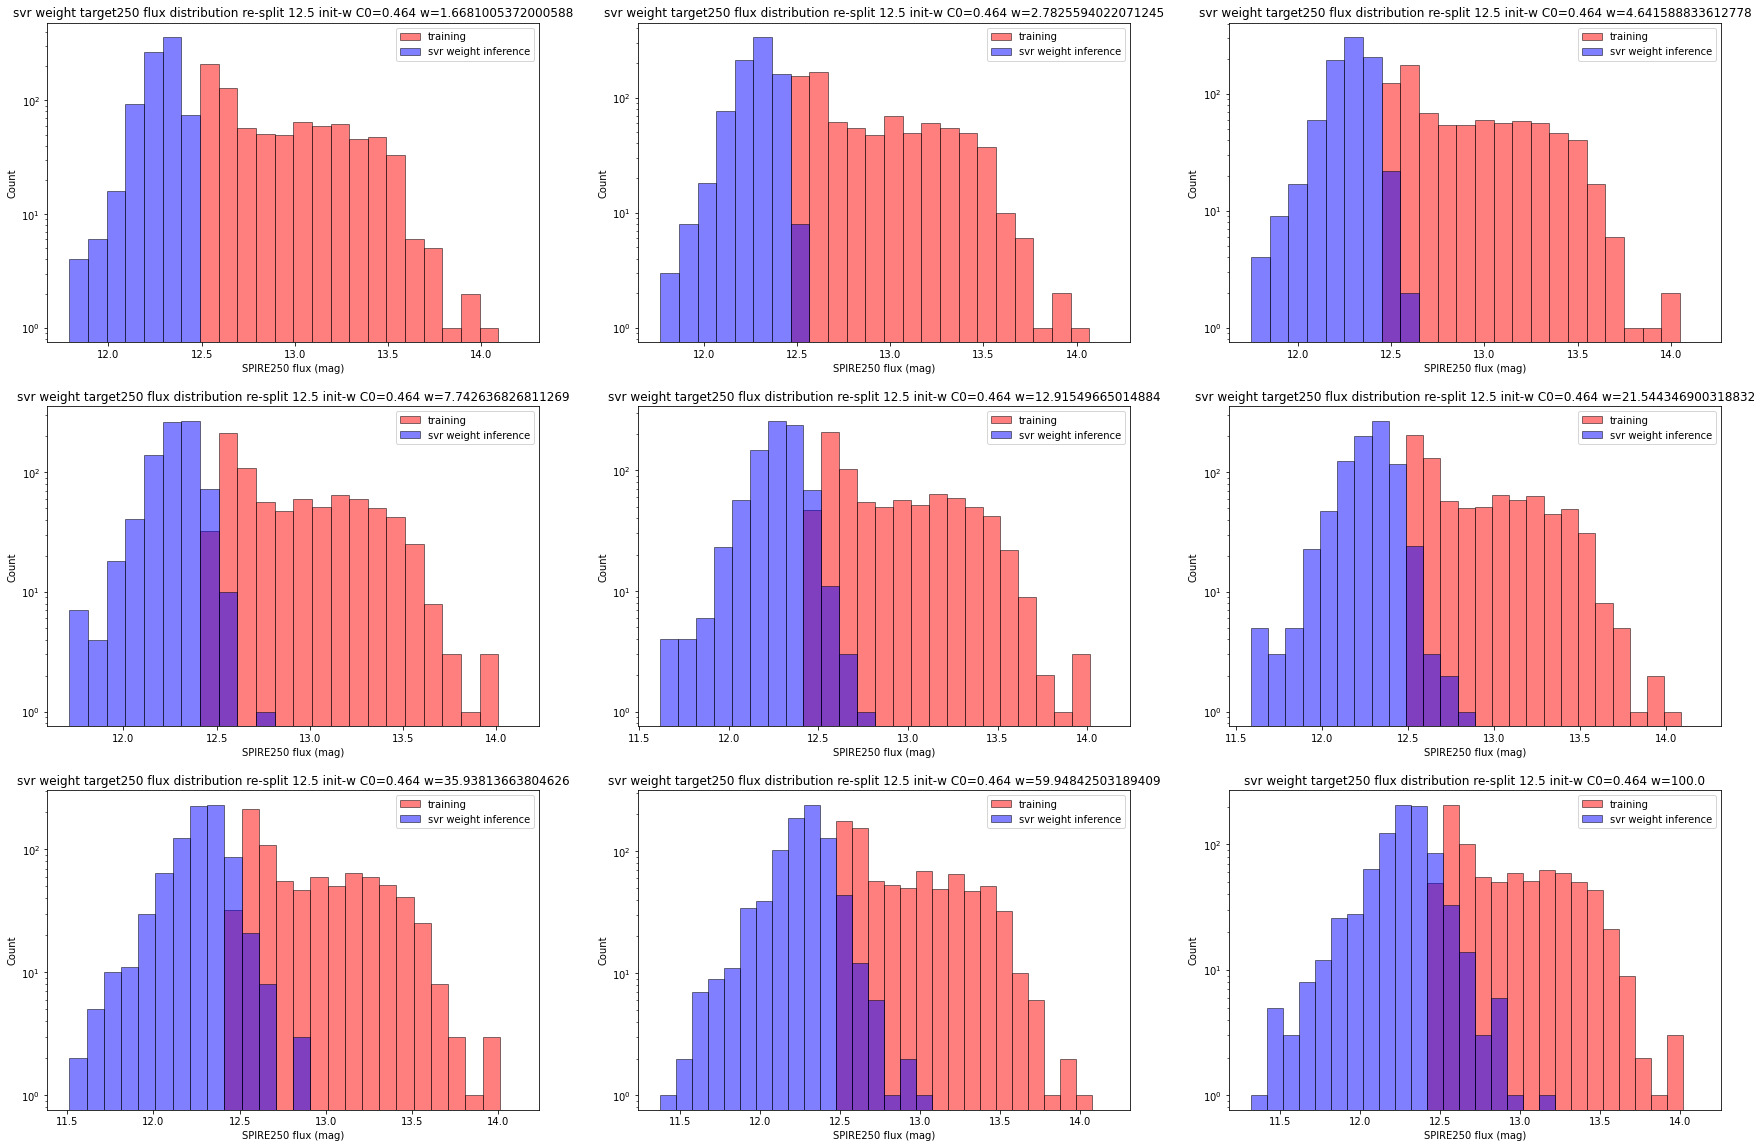

In [239]:
w=np.logspace(0,2,10)
w=w[1:]
j=0

fig, axs = plt.subplots(3,3,figsize=(30,20))
for i in w:
    
    C=0.464158
    gamma=0.0278255
    epsilon=0.1
#     w=2.54
    kernel='rbf'
    svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)

    # knnre=knn.fit(train250z,y=target250['m250']).predict(testz_imp)

    # X=train250z[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','z']]
    # Yz=testz_imp[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','z']]
    X=s12cwtrain250
    y=s12cwtarget250['m250']
    Y=s12cwvalidinput250
    y1=s12cwvalidtarget250['m250']
#     weight=np.abs(np.random.randn(1800))

#     svrre=svr.fit(X=train250z,y=target250['m250'],sample_weight=df_weight*i).predict(Y)
    svrre=svr.fit(X=X,y=y,sample_weight=s12df_cwweight_original*i).predict(Y)
    
    binwidth=0.1
#     data=target250['m250']
    data=y1
    data1=svrre
    binmin=np.min([np.min(data),np.min(data1)])
    binmax=np.max([np.max(data),np.max(data1)])
    bins=np.arange(binmin,binmax+2*binwidth,binwidth)
    
    a=j//3
    b=j%3
    

    # plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
    axs[a,b].hist(y1,bins=bins,label='training',edgecolor = 'black',color='r',alpha=0.5)
    axs[a,b].hist(svrre,bins=bins,label='svr weight inference',edgecolor = 'black',color='b',alpha=0.5)
    axs[a,b].semilogy()
    axs[a,b].legend()
    axs[a,b].set_xlabel('SPIRE250 flux (mag)')
    axs[a,b].set_ylabel('Count')
    axs[a,b].set_title('svr weight target250 flux distribution re-split 12.5 init-w C0=0.464 w=%s'%(i))
#     max(target250['m250']),min(target250['m250'])
    j=j+1
    
fig.text(0.5, 0.08, 'SPIRE250 flux (mag)', ha='center',fontsize=50)
fig.text(0.08, 0.5, 'Count', va='center', rotation='vertical',fontsize=50)
#     plt.savefig('result/distribution/svr weight target250 flux distribution')
# plt.savefig('result/distribution/svr weight log change s12 split initial weight')

In [41]:
#cross-validation svr_rbf spire250

def svr(dx=train250,dy=target250['m250'],X=train250,y=target250['m250'],test=testz,C=100,gamma=0.1,epsilon=0.1,kernel='rbf',n_splits=10,test_ratio=0.1,train_ratio=0.9,random_state=0):
    svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)
#     ss = ShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=0)
    
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=0)
    kf.get_n_splits(X)
    rmse=[]
    drmse=[]
    result=[]
    for train_index, test_index in kf.split(X):
        #print("%s %s" % (train_index, test_index))
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]    #set the train test dataset
        
        result_svr=svr.fit(X_train,y_train).predict(X_test),svr.fit(X_train,y_train).predict(X_train)
        result+=result_svr[0], y_test,result_svr[1], y_train
        
        a=dx.iloc[test_index]['N2m'].values-result_svr[0]
        dmse=sklearn.metrics.mean_squared_error(a,dy.iloc[test_index].values)
        drmse+=[math.sqrt(dmse)]

        
#         print(data.iloc[test_index]['N2m'].values.shape,result_svr[0].shape)
#         print(result)
        mse=sklearn.metrics.mean_squared_error(y_test,result_svr[0]),sklearn.metrics.mean_squared_error(y_train,result_svr[1])
        rmse+=[(math.sqrt(mse[0]),math.sqrt(mse[1]))]
#         print(mse,rmse)
        

#         #print("%s %s" % (train_index, test_index))

#         result_svr=svr.fit(X_train,y_train).predict(test)
# #         print(result_svr)
#         result.append(result_svr)
# #         print(result)

#     df_result=pd.DataFrame(data=result)
#     df_result=df_result.T
#     df=pd.concat([df_result,df_result.mean(axis=1),df_result.std(axis=1)],axis=1)
# #     print(df)
#     col=['1','2','3','4','5','6','7','8','9','10','mean','std']
#     df.columns=col
#     df['rmse']=0
#     df['mse']=0
#     df['mae']=0
#     df['mape']=0
#     xa=col[:-2]
# #     print(xa)
#     for i in xa:
#         df['rmse']+=(df['mean']-df[i])**2
#         df['mse']+=(df['mean']-df[i])**2
#         df['mae']+=(df['mean']-df[i]).abs()
#         df['mape']+=(df['mean']-df[i]).abs()
#     df['rmse']=(df['rmse']/10)**0.5
#     df['mae']=df['mae']/10
#     df['mape']= df['mape']/df['mean']*100
#     # df['mean']==df['a']
# #     df
    #print(rmse)
    #rmse[0][1]
 
    return np.mean([i[0] for i in rmse]),np.mean([i[1] for i in rmse]),rmse,result,kernel,drmse

In [53]:
%time test=svr(X=colortrain[trainname],y=colortarget['N2m_SPIRE250'],C=hre[2],gamma=hre[3])

Wall time: 6.9 s


In [88]:
##function recall the best coeff of error and heatmap
##return rmse of test,train set and the min of test

def heatmap(X=train250,y=target250['m250'],C=np.logspace(-1,2,10),gamma=np.logspace(-2,0,10),kernel='rbf',n_splits=10,test_ratio=0.1):
    grid=np.zeros((len(C),len(gamma))),np.zeros((len(C),len(gamma)))
#     grid_rbf1=np.zeros((len(C),len(gamma)))
    
    for i,c in enumerate(C):
        for j,g in enumerate(gamma):
            grid[0][i,j],grid[1][i,j]=svr(X=X,y=y,C=c,gamma=g, kernel=kernel,
                                                  n_splits=n_splits, test_ratio=test_ratio)[:2]
        print (i , j)

    min_ind, vtestmin=np.argmin(grid[0]), np.min(grid[0])
    Cmin=C[min_ind%100//10]
    gmin=gamma[min_ind%10]
    vtrain=grid[1][min_ind%100//10][min_ind%10]
    
    return grid,kernel,Cmin,gmin,vtestmin,vtrain

In [100]:
colorbrighttarget

,GCm_SPIRE250,RCm_SPIRE250,ICm_SPIRE250,ZCm_SPIRE250,YCm_SPIRE250,N2m_SPIRE250,N3m_SPIRE250,N4m_SPIRE250,S7m_SPIRE250,S9m_SPIRE250,S11m_SPIRE250,L15m_SPIRE250,L18m_SPIRE250,L24m_SPIRE250,w1m_SPIRE250,w2m_SPIRE250,ir1_SPIRE250,ir2_SPIRE250
21,10.982,9.499,8.394272,7.952539,7.623869,6.811000,6.497000,7.123000,8.460892,6.346000,5.522000,5.993000,5.775000,5.688180,6.77400,7.250000,6.844000,7.060000
105,11.754,9.961,8.664000,8.188000,7.875000,6.548000,6.271000,6.702000,9.278671,8.169642,7.311404,6.301575,6.965274,6.585934,6.80000,7.603000,6.807000,7.194000
235,13.132,12.320,12.126000,12.136000,10.810000,8.764886,8.084798,8.212990,6.489000,6.126000,5.110000,4.165000,3.849000,3.272000,8.46600,8.292000,8.163000,7.994000
353,8.559,7.422,6.818000,6.367000,6.128000,5.462000,5.749000,6.180000,5.458000,3.937795,3.303040,4.197594,4.418061,4.410837,5.91900,6.128000,5.953000,5.906000
381,10.673,9.457,8.811000,8.322000,8.130000,7.036000,6.698000,7.011000,6.766000,5.647000,5.246000,4.991000,5.142000,4.681000,6.74500,7.007000,6.573000,6.788000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91153,12.029,11.169,11.857000,10.313000,10.525000,6.842000,6.560000,6.670000,6.654000,6.202000,5.960000,4.988000,5.171000,4.638515,6.77700,6.763000,6.417000,6.412000
91331,11.677,11.282,10.545000,9.939000,9.611000,6.347000,6.233000,6.240000,6.842617,6.676000,5.834000,4.292000,4.056000,3.867919,6.54200,6.639000,6.254110,6.418089
91374,12.006,10.490,9.690000,9.274000,9.023000,8.002000,7.616000,8.370000,9.356963,8.230288,6.735432,5.859227,5.880433,5.669607,7.81900,8.721000,7.800000,7.839000
91690,7.945,6.601,6.065000,5.739000,5.544000,5.090000,5.499000,5.833000,5.401000,4.519000,4.231000,4.116000,3.779000,3.203378,5.71900,5.913000,5.639000,5.753000


In [101]:
# norre=heatmap
%time norhre=heatmap(X=norcolorbrighttrain,y=colorbrighttarget['N2m_SPIRE250'])
norre=svr(X=norcolorbrighttrain,y=colorbrighttarget['N2m_SPIRE250'],C=norhre[2],gamma=norhre[3])
norre[:2],norhre[2:4]

0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9
Wall time: 11min 17s


((1.4079667707996033, 1.3791749408626937), (4.6415888336127775, 1.0))

In [102]:
norre=svr(X=norcolorbrighttrain,y=colorbrighttarget['N2m_SPIRE250'],C=norhre[2],gamma=norhre[3])
norre[:2],norhre[2:4]

((0.5491145039482317, 0.5330366673143265), (4.6415888336127775, 1.0))

In [103]:
%time nornorhre=heatmap(X=norcolorbrighttrain,y=norcolorbrighttarget['N2m_SPIRE250'])
nornorre=svr(X=norcolorbrighttrain,y=norcolorbrighttarget['N2m_SPIRE250'],C=norhre[2],gamma=norhre[3])
nornorre[:2],nornorhre[2:4]

0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9
Wall time: 3min


NameError: name 'norcolortarget' is not defined

In [104]:
nornorre=svr(X=norcolorbrighttrain,y=norcolorbrighttarget['N2m_SPIRE250'],C=norhre[2],gamma=norhre[3])
nornorre[:2],nornorhre[2:4]

((0.07486373485498846, 0.07074936424951175), (1.0, 1.0))

In [19]:
re=svr(X=colortrain[trainname],y=colortarget['N2m_SPIRE250'])

In [27]:
%time hre=heatmap(X=colortrain[trainname],y=colortarget['N2m_SPIRE250'])
re250=svr(X=colortrain[trainname],y=colortarget['N2m_SPIRE250'],C=hre[2],gamma=hre[3])
re250[:2]

0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9
Wall time: 19min 12s


In [65]:
%time hre15=heatmap(X=colortrain[trainname15],y=colortarget['N2m_SPIRE250'])

In [73]:
re15=svr(X=colortrain[trainname15],y=colortarget['N2m_SPIRE250'],C=hre15[2],gamma=hre15[3])

In [66]:
%time hre20=heatmap(X=colortrain[trainname15],y=colortarget['N2m_SPIRE250'])

In [74]:
re20=svr(X=colortrain[trainname20],y=colortarget['N2m_SPIRE250'],C=hre20[2],gamma=hre20[3])

In [75]:
re15[:2],re20[:2]

((0.5778215933746764, 0.5440374915355539),
 (0.5847708613433836, 0.5239859607746993))

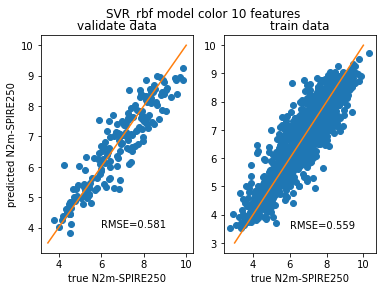

In [36]:
#plot invalidate training set result
flux_list,validate_rmse,train_rmse=re250[3],re250[0],re250[1]
fig,ax = plt.subplots(1,2)
plt.suptitle('SVR_rbf model color 10 features')
x = np.linspace(0, 6.5, 1000)
ax[0].plot(flux_list[1],flux_list[0],'o')
ax[0].plot(x+3.5, x+3.5 , linestyle='solid')
ax[0].set_xlabel('true N2m-SPIRE250')
ax[0].set_ylabel('predicted N2m-SPIRE250')
# ax[0].legend(['','y=x'])
ax[0].set_title('validate data')
ax[0].text(6,4,'RMSE='+str(validate_rmse)[0:5])

x = np.linspace(0, 7, 1000)
ax[1].plot(flux_list[3],flux_list[2],'o')
ax[1].plot(x+3, x+3 , linestyle='solid')
ax[1].set_xlabel('true N2m-SPIRE250')
#ax[1].set_ylabel('predict flux(mag)')
# ax[1].legend(['','y=x'])
ax[1].set_title('train data')
ax[1].text(6,3.5,'RMSE='+str(train_rmse)[0:5])

# svr_lin.get_params(deep=True)
# svr_lin_r=svr_lin.score(X_test,y_test),svr_lin.score(X_train,y_train)
#print(svr_r)

plt.savefig('SVR_rbf model color 10 features')

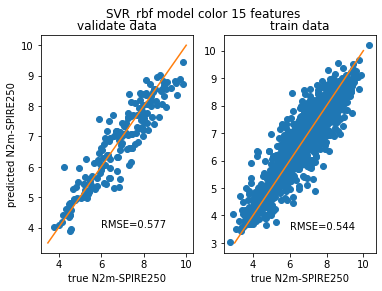

In [76]:
#plot invalidate training set result
flux_list,validate_rmse,train_rmse=re15[3],re15[0],re15[1]
fig,ax = plt.subplots(1,2)
plt.suptitle('SVR_rbf model color 15 features')
x = np.linspace(0, 6.5, 1000)
ax[0].plot(flux_list[1],flux_list[0],'o')
ax[0].plot(x+3.5, x+3.5 , linestyle='solid')
ax[0].set_xlabel('true N2m-SPIRE250')
ax[0].set_ylabel('predicted N2m-SPIRE250')
# ax[0].legend(['','y=x'])
ax[0].set_title('validate data')
ax[0].text(6,4,'RMSE='+str(validate_rmse)[0:5])

x = np.linspace(0, 7, 1000)
ax[1].plot(flux_list[3],flux_list[2],'o')
ax[1].plot(x+3, x+3 , linestyle='solid')
ax[1].set_xlabel('true N2m-SPIRE250')
#ax[1].set_ylabel('predict flux(mag)')
# ax[1].legend(['','y=x'])
ax[1].set_title('train data')
ax[1].text(6,3.5,'RMSE='+str(train_rmse)[0:5])

# svr_lin.get_params(deep=True)
# svr_lin_r=svr_lin.score(X_test,y_test),svr_lin.score(X_train,y_train)
#print(svr_r)

plt.savefig('SVR_rbf model color 15 features')

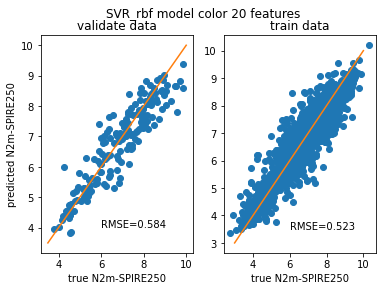

In [77]:
#plot invalidate training set result
flux_list,validate_rmse,train_rmse=re20[3],re20[0],re20[1]
fig,ax = plt.subplots(1,2)
plt.suptitle('SVR_rbf model color 20 features')
x = np.linspace(0, 6.5, 1000)
ax[0].plot(flux_list[1],flux_list[0],'o')
ax[0].plot(x+3.5, x+3.5 , linestyle='solid')
ax[0].set_xlabel('true N2m-SPIRE250')
ax[0].set_ylabel('predicted N2m-SPIRE250')
# ax[0].legend(['','y=x'])
ax[0].set_title('validate data')
ax[0].text(6,4,'RMSE='+str(validate_rmse)[0:5])

x = np.linspace(0, 7, 1000)
ax[1].plot(flux_list[3],flux_list[2],'o')
ax[1].plot(x+3, x+3 , linestyle='solid')
ax[1].set_xlabel('true N2m-SPIRE250')
#ax[1].set_ylabel('predict flux(mag)')
# ax[1].legend(['','y=x'])
ax[1].set_title('train data')
ax[1].text(6,3.5,'RMSE='+str(train_rmse)[0:5])

# svr_lin.get_params(deep=True)
# svr_lin_r=svr_lin.score(X_test,y_test),svr_lin.score(X_train,y_train)
#print(svr_r)

plt.savefig('SVR_rbf model color 20 features')

In [329]:
train250z['z']

21       0.673
105      0.701
235      2.510
353      0.375
381      0.806
         ...  
91331    1.616
91374    0.551
91385    0.574
91690    0.256
91860    3.746
Name: z, Length: 1800, dtype: float64

In [330]:
re=heatmap(X=train250z,y=target250['m250'])

0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9


In [ ]:
# re250=svr(X=train250z,y=target250['m250'],C=re[2],gamma=re[3])
re250=svr(X=train250z,y=target250['m250'],C=0.464158,gamma=0.0278255)

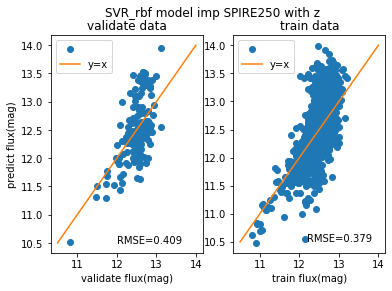

In [333]:
#plot invalidate training set result
flux_list,validate_rmse,train_rmse=re250[3],re250[0],re250[1]
fig,ax = plt.subplots(1,2)
plt.suptitle('SVR_rbf model imp SPIRE250 with z')
x = np.linspace(0.5, 4, 1000)
ax[0].plot(flux_list[0],flux_list[1],'o')
ax[0].plot(x+10, x+10 , linestyle='solid')
ax[0].set_xlabel('validate flux(mag)')
ax[0].set_ylabel('predict flux(mag)')
ax[0].legend(['','y=x'])
ax[0].set_title('validate data')
ax[0].text(12,10.5,'RMSE='+str(validate_rmse)[0:5])

ax[1].plot(flux_list[2],flux_list[3],'o')
ax[1].plot(x+10, x+10 , linestyle='solid')
ax[1].set_xlabel('train flux(mag)')
#ax[1].set_ylabel('predict flux(mag)')
ax[1].legend(['','y=x'])
ax[1].set_title('train data')
ax[1].text(12.2,10.5,'RMSE='+str(train_rmse)[0:5])

# svr_lin.get_params(deep=True)
# svr_lin_r=svr_lin.score(X_test,y_test),svr_lin.score(X_train,y_train)
#print(svr_r)

# plt.savefig('SVR_rbf model imp SPIRE250 with z')

In [335]:
hre350=heatmap(X=train350z,y=target350['m350'])

0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9


In [336]:
re350=svr(X=train350z,y=target350['m350'],C=hre350[2],gamma=hre350[3])

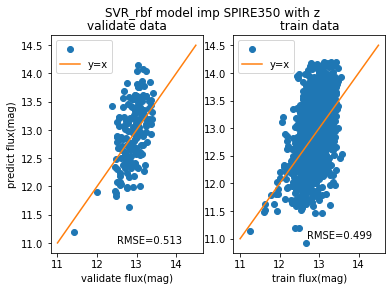

In [338]:
#plot invalidate training set result
flux_list,validate_rmse,train_rmse=re350[3],re350[0],re350[1]
fig,ax = plt.subplots(1,2)
plt.suptitle('SVR_rbf model imp SPIRE350 with z')
x = np.linspace(0.5, 4, 1000)
ax[0].plot(flux_list[0],flux_list[1],'o')
ax[0].plot(x+10.5, x+10.5 , linestyle='solid')
ax[0].set_xlabel('validate flux(mag)')
ax[0].set_ylabel('predict flux(mag)')
ax[0].legend(['','y=x'])
ax[0].set_title('validate data')
ax[0].text(12.5,11,'RMSE='+str(validate_rmse)[0:5])

ax[1].plot(flux_list[2],flux_list[3],'o')
ax[1].plot(x+10.5, x+10.5 , linestyle='solid')
ax[1].set_xlabel('train flux(mag)')
#ax[1].set_ylabel('predict flux(mag)')
ax[1].legend(['','y=x'])
ax[1].set_title('train data')
ax[1].text(12.7,11,'RMSE='+str(train_rmse)[0:5])

# svr_lin.get_params(deep=True)
# svr_lin_r=svr_lin.score(X_test,y_test),svr_lin.score(X_train,y_train)
#print(svr_r)

# plt.savefig('SVR_rbf model imp SPIRE350 with z')

In [339]:
hre500=heatmap(X=train500z,y=target500['m500'])

0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9


In [340]:
re500=svr(X=train500z,y=target500['m500'],C=hre500[2],gamma=hre500[3])

In [50]:
len(train500),len(train350),len(train250)

(950, 1646, 1800)

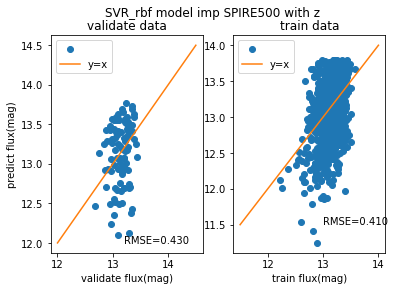

In [341]:
#plot invalidate training set result
flux_list,validate_rmse,train_rmse=re500[3],re500[0],re500[1]
fig,ax = plt.subplots(1,2)
plt.suptitle('SVR_rbf model imp SPIRE500 with z')
x = np.linspace(0.5, 3, 1000)
ax[0].plot(flux_list[0],flux_list[1],'o')
ax[0].plot(x+11.5, x+11.5 , linestyle='solid')
ax[0].set_xlabel('validate flux(mag)')
ax[0].set_ylabel('predict flux(mag)')
ax[0].legend(['','y=x'])
ax[0].set_title('validate data')
ax[0].text(13.2,12,'RMSE='+str(validate_rmse)[0:5])

ax[1].plot(flux_list[2],flux_list[3],'o')
ax[1].plot(x+11, x+11 , linestyle='solid')
ax[1].set_xlabel('train flux(mag)')
#ax[1].set_ylabel('predict flux(mag)')
ax[1].legend(['','y=x'])
ax[1].set_title('train data')
ax[1].text(13,11.5,'RMSE='+str(train_rmse)[0:5])

# svr_lin.get_params(deep=True)
# svr_lin_r=svr_lin.score(X_test,y_test),svr_lin.score(X_train,y_train)
#print(svr_r)

plt.savefig('SVR_rbf model imp SPIRE500 with z')

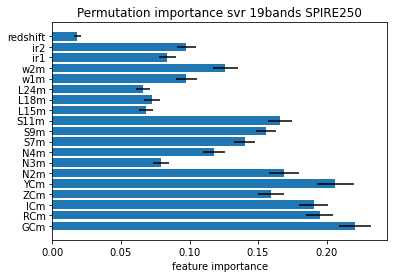

In [50]:
C=0.464
gamma=0.07
epsilon=0.1
kernel='rbf'
svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)
svr_fit=svr.fit(train250z,target250['m250'])

r = permutation_importance(svr_fit, train250z,target250['m250'],n_repeats=100,random_state=0)

x=np.array([i for i in range(19)])
# r['importances_std']

lir_trainsz=['GCm','RCm','ICm','ZCm','YCm','N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','redshift']
plt.barh(lir_trainsz,r['importances_mean'],xerr=r['importances_std'])
plt.xlabel('feature importance')
plt.title('Permutation importance svr 19bands SPIRE250')
# plt.savefig('Permutation importance svr 19bands SPIRE250')

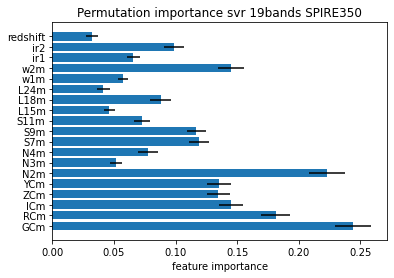

In [49]:
C=0.464
gamma=0.07
epsilon=0.1
kernel='rbf'
svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)
svr_fit=svr.fit(train350z,target350['m350'])
r = permutation_importance(svr_fit, train350z,target350['m350'],n_repeats=100,random_state=0)
x=np.array([i for i in range(19)])
# r['importances_std']

lir_trainsz=['GCm','RCm','ICm','ZCm','YCm','N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','redshift']
plt.barh(lir_trainsz,r['importances_mean'],xerr=r['importances_std'])
plt.xlabel('feature importance')
plt.title('Permutation importance svr 19bands SPIRE350')
# plt.savefig('Permutation importance svr 19bands SPIRE350')

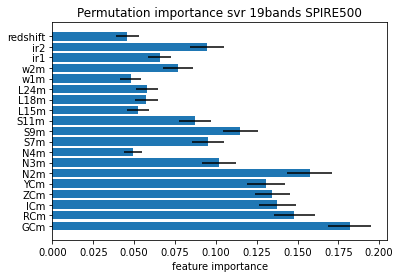

In [51]:
C=0.464
gamma=0.07
epsilon=0.1
kernel='rbf'
svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)
svr_fit=svr.fit(train500z,target500['m500'])
r = permutation_importance(svr_fit, train500z,target500['m500'],n_repeats=100,random_state=0)
x=np.array([i for i in range(19)])
# r['importances_std']

lir_trainsz=['GCm','RCm','ICm','ZCm','YCm','N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','redshift']
plt.barh(lir_trainsz,r['importances_mean'],xerr=r['importances_std'])
plt.xlabel('feature importance')
plt.title('Permutation importance svr 19bands SPIRE500')
# plt.savefig('Permutation importance svr 19bands SPIRE500')

In [14]:
def svr_trainw(X=train250,y=target250['m250'],weight=df_weight,w=1,C=1,gamma=0.1,epsilon=0.1,kernel='rbf',n_splits=10,test_ratio=0.1,train_ratio=0.9,random_state=0):
    svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)
#     ss = ShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=0)
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=0)
    kf.get_n_splits(X)
    rmse=[]
    result=[]
    trainind=[]
    testind=[]
    for train_index, test_index in kf.split(X):
        #print("%s %s" % (train_index, test_index))
        X_train, X_test, y_train, y_test ,weight_train= X.iloc[train_index], X.iloc[test_index],y.iloc[train_index],y.iloc[test_index],weight[train_index]    #set the train test dataset
        result_svr=svr.fit(X_train,y_train,sample_weight=weight_train*w).predict(X_test),svr.fit(X_train,y_train,sample_weight=weight_train*w).predict(X_train) 
        result+=result_svr[0], y_test,result_svr[1], y_train
#         print(result)
        mse=sklearn.metrics.mean_squared_error(y_test,result_svr[0]),sklearn.metrics.mean_squared_error(y_train,result_svr[1])
        rmse+=[(math.sqrt(mse[0]),math.sqrt(mse[1]))]
#         print(mse,rmse)
        trainind.append(train_index)
        testind.append(test_index)

    #print(rmse)
    #rmse[0][1]
 
    return np.mean([i[0] for i in rmse]),np.mean([i[1] for i in rmse]),rmse,result,kernel,trainind,testind

In [18]:
re=svr_trainw(X=train250z,C=1,w=1,gamma=0.07)

In [19]:
re[:2]

(0.4268292244096698, 0.35590242163619196)

In [23]:
re350=svr_train(X=train350z,y=target350['m350'],C=10,w=10,gamma=0.07)


In [24]:
re350[:2]

(0.7309038107788025, 0.27030397331357053)

In [8]:
# ##function recall the best coeff of error and heatmap
# ##return rmse of test,train set and the min of test

# def heatmap(X=train250,y=target250['m250'],w=np.logspace(0,2,10),C=np.logspace(-1,1,10),gamma=np.logspace(-2,0,10),kernel='rbf',n_splits=10,test_ratio=0.1):
#     grid=np.zeros((len(C),len(gamma))),np.zeros((len(C),len(gamma)))
# #     grid_rbf1=np.zeros((len(C),len(gamma)))
    
#     for i,c in enumerate(C):
#         for j,g in enumerate(gamma):
#             grid[0][i,j],grid[1][i,j]=svr_train(X=X,y=y,C=c,gamma=g, kernel=kernel,
#                                                   n_splits=n_splits, test_ratio=test_ratio)[:2]
# #         print (i , j)

#     min_ind, vtestmin = np.argmin(grid[0]), np.min(grid[0])
#     Cmin = C[min_ind%100//10]
#     gmin = gamma[min_ind%10]
#     vtrain = grid[1][min_ind%100//10][min_ind%10]
    
#     return grid,kernel,Cmin,gmin,vtestmin,vtrain

In [22]:
##function recall the best coeff of error and heatmap
##return rmse of test,train set and the min of test

def heatmapw(X=train250z,y=target250['m250'],weight=df_weight,w=np.logspace(0,2,100),C=0.464,gamma=0.07,kernel='rbf',n_splits=10,test_ratio=0.1):
    grid=np.zeros(len(w)),np.zeros(len(w))
#     grid_rbf1=np.zeros((len(C),len(gamma)))
    
    for i,r in enumerate(w):
        
        grid[0][i],grid[1][i]=svr_trainw(X=X,y=y,C=C,gamma=gamma, kernel=kernel,w=r,weight=weight,
                                                  n_splits=n_splits, test_ratio=test_ratio)[:2]
        print (i)

    min_ind, vtestmin = np.argmin(grid[0]), np.min(grid[0])
    wmin=w[min_ind]
    vtrain = grid[1][min_ind]
    
    return grid,kernel,wmin,vtestmin,vtrain

In [23]:
hwre=heatmapw(w=np.logspace(-1,1,10))

0
1
2
3
4
5
6
7
8
9


In [24]:
df_hwre=pd.DataFrame(data=hwre[0])

In [118]:
df_hwre.T.to_csv('result/error weight 100 cv .csv')

In [41]:
df_hwre=pd.read_csv('result/error weight 100 cv .csv', low_memory=False,index_col=0)

In [28]:
df_hwre=df_hwre.T

In [33]:
df_hwre[0]

0    0.454515
1    0.447326
2    0.439946
3    0.434184
4    0.429766
5    0.427126
6    0.426840
7    0.428294
8    0.433677
9    0.442378
Name: 0, dtype: float64

Text(0.5, 1.0, '250um valiadate and training error with weight')

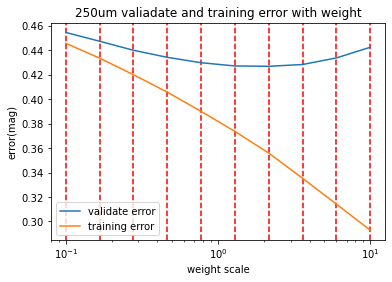

In [34]:
x=np.logspace(-1,1,10)
plt.semilogx()
# for i,n in enumerate(x):
#     a=i*10
#     plt.plot(n,hwre[0][0][a],'x',color='r')
# #     print(i,n)
# x=np.logspace(0,2,10)
for i in x:
    plt.axvline(i,color='r',linestyle ="--")
    
    
plt.plot(x,df_hwre[0],label='validate error')
plt.plot(x,df_hwre[1],label='training error')
plt.xlabel('weight scale')
plt.ylabel('error(mag)')
plt.legend()
plt.title('250um valiadate and training error with weight')
# plt.savefig('result/distribution/250um valiadate and training error with weight')

# np.min(df_hwre[0])


0.42670663669411485

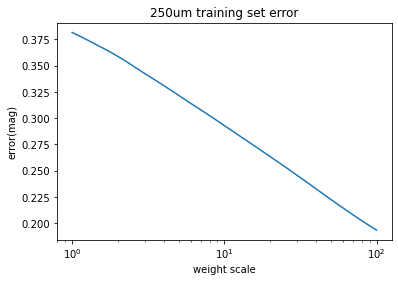

In [205]:
x=np.logspace(0,2,10)
plt.semilogx()
# for i,n in enumerate(x):
#     a=i*10
#     plt.plot(n,hwre[0][0][a],'x',color='r')
# #     print(i,n)
# x=np.logspace(0,2,10)
# for i in x:
#     plt.axvline(i,color='r',linestyle ="--")
    
    
plt.plot(np.logspace(0,2,100),df_hwre[1])
plt.xlabel('weight scale')
plt.ylabel('error(mag)')
plt.title('250um training set error')
plt.savefig('result/distribution/250um training set error with weight')

# np.min(df_hwre[0])


In [32]:
w=np.linspace(10,50,10)
w

array([10.        , 14.44444444, 18.88888889, 23.33333333, 27.77777778,
       32.22222222, 36.66666667, 41.11111111, 45.55555556, 50.        ])

In [33]:
##function recall the best coeff of error and heatmap
##return rmse of test,train set and the min of test

def heatmap(X=train250z,y=target250['m250'],weight=df_weight,w=np.linspace(10,50,10),C=np.linspace(0.1,1,10),gamma=np.linspace(0.01,1,10),kernel='rbf',n_splits=10,test_ratio=0.1):
    grid=np.zeros((len(C),len(gamma),len(w))),np.zeros((len(C),len(gamma),len(w)))
#     grid_rbf1=np.zeros((len(C),len(gamma)))
    
    for i,c in enumerate(C):
        for j,g in enumerate(gamma):
            for k,r in enumerate(w):
                grid[0][i,j,k],grid[1][i,j,k]=svr_train(X=X,y=y,C=c,gamma=g, kernel=kernel,w=r,weight=weight,
                                                      n_splits=n_splits, test_ratio=test_ratio)[:2]
                print (i , j)

    min_ind, vtestmin = np.argmin(grid[0]), np.min(grid[0])
#     Cmin = C[min_ind%1000//10]
#     gmin = gamma[min_ind%100//10]
#     wmin = w[min_ind%10]
#     vtrain = grid[1][min_ind%1000//10][min_ind%100//10][min_ind%10]
    
#     return grid,kernel,Cmin,gmin,wmin,vtestmin,vtrain
    return grid,kernel,vtestmin,min_ind

In [42]:
# hre=heatmap()

In [35]:
grid=hre[0]
re=[]
for k in range(len(grid[0])):
    for j in range(len(grid[0][0])):
        for i in range(len(grid[0][0][0])):
            a=[grid[0][k][j][i],grid[1][k][j][i]]
            re.append(a)
#             re.append(hre[0][0][0][i])
#             re.append(hre[1][0][0][i])


In [43]:
# re

In [36]:
a=[]
for i in range(len(re)):
    a.append(re[i][0])
np.min(a)

0.4135198431211882

In [37]:
df_hre=pd.DataFrame(data=re)
df_hre.to_csv('result/error weight 1000 cv v2.csv')

In [9]:
def svr_result(X=train250,y=target250['m250'],test=test_imp,C=100,gamma=0.1,epsilon=0.1,kernel='rbf',n_splits=10,test_ratio=0.1,train_ratio=0.9,random_state=0):
    svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)
#     ss = ShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=0)
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=0)
    kf.get_n_splits(X)
    result=[]
    
    for train_index, test_index in kf.split(X):
        #print("%s %s" % (train_index, test_index))
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]    #set the train test dataset
        result_svr=svr.fit(X_train,y_train).predict(test)
#         print(result_svr)
        result.append(result_svr)
#         print(result)

    df_result=pd.DataFrame(data=result)
    df_result=df_result.T
    df=pd.concat([df_result,df_result.mean(axis=1),df_result.std(axis=1)],axis=1)
#     print(df)
    col=['1','2','3','4','5','6','7','8','9','10','mean','std']
    df.columns=col
    df['rmse']=0
    df['mse']=0
    df['mae']=0
    df['mape']=0
    xa=col[:-2]
#     print(xa)
    for i in xa:
        df['rmse']+=(df['mean']-df[i])**2
        df['mse']+=(df['mean']-df[i])**2
        df['mae']+=(df['mean']-df[i]).abs()
        df['mape']+=(df['mean']-df[i]).abs()
    df['rmse']=(df['rmse']/10)**0.5
    df['mae']=df['mae']/10
    df['mape']= df['mape']/df['mean']*100
    # df['mean']==df['a']
#     df
    
    

    return df,df_result

In [23]:
testz_imp

,GCm,RCm,ICm,ZCm,YCm,N2m,N3m,N4m,S7m,S9m,S11m,L15m,L18m,L24m,w1m,w2m,ir1,ir2,z
0,23.481,21.951,21.276000,20.823000,20.353000,19.743000,19.761000,19.981000,20.035586,18.295000,17.872000,17.958133,18.181155,19.546483,19.950000,20.125000,19.926000,19.899000,0.562
1,26.554,25.860,25.340000,24.684173,23.924000,20.876743,20.327000,20.488000,21.273808,19.930666,18.985908,17.986864,17.066079,16.957309,21.471000,20.717000,21.103990,20.320064,2.270
2,21.705,20.215,19.425000,19.104000,18.851000,18.129000,18.390000,18.999000,19.816078,18.816000,18.165514,18.451043,18.180000,17.662294,18.570000,18.930000,18.578000,18.629000,0.385
3,23.230,21.963,20.791000,20.283000,20.135000,19.846000,19.969000,20.292000,19.918274,20.216799,19.141640,17.633000,18.425410,18.861494,19.999000,20.528000,19.500000,19.559000,0.626
4,25.489,24.316,23.002000,22.256000,21.737000,19.390000,19.018000,19.693000,20.352496,19.140361,18.201473,18.713837,18.201302,17.666628,19.369000,19.830000,19.292000,19.272000,1.161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67705,25.607,26.476,25.021000,24.697000,24.021263,20.185611,19.273140,18.596616,18.272062,18.642593,17.711090,16.136083,15.861000,16.388000,19.569712,18.863089,19.097859,18.283329,1.673
67706,26.014,26.075,25.452000,24.967000,24.655311,21.450084,20.874743,20.453667,19.467239,18.317585,17.560884,16.860255,16.671000,16.633859,20.778428,19.841193,20.271951,19.535944,1.711
67707,27.203,26.535,25.506092,24.784231,24.312535,20.994403,20.610906,20.125717,20.475899,19.960054,19.272493,17.904458,17.304297,16.718707,21.003361,20.744431,19.984328,20.083644,1.863
67708,27.464,25.471,25.223723,24.880000,24.348109,21.333444,20.373441,20.074025,18.641485,18.692440,17.787427,17.754842,17.263000,16.632535,20.488595,19.768181,20.273386,19.185252,3.746


In [29]:
C=0.464
gamma=0.07
epsilon=0.1
#     w=2.54
kernel='rbf'
X=train250z
Y=testz_imp
svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)
svrre=svr.fit(X,y=target250['m250'],sample_weight=df_weight).predict(Y)

In [35]:
type(df_weight)

list

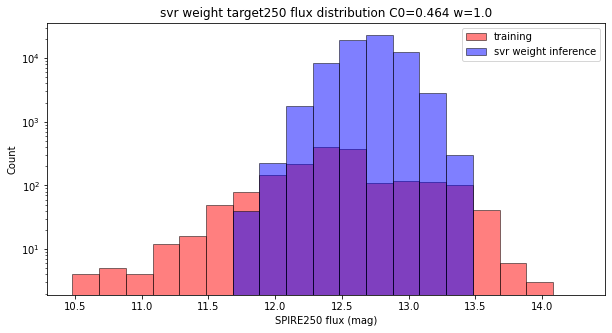

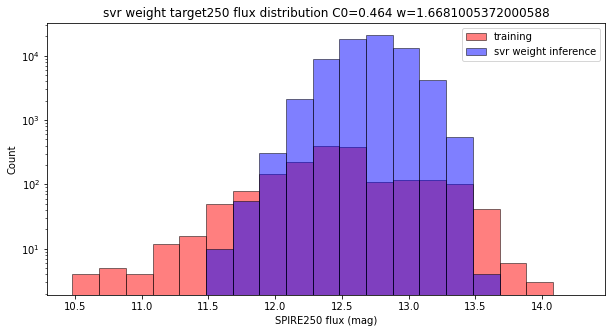

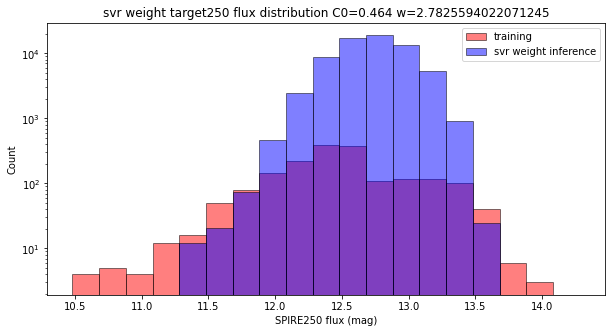

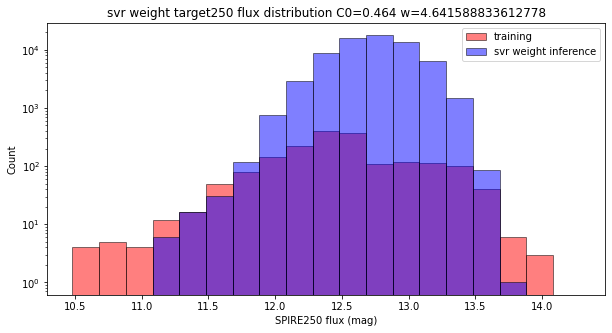

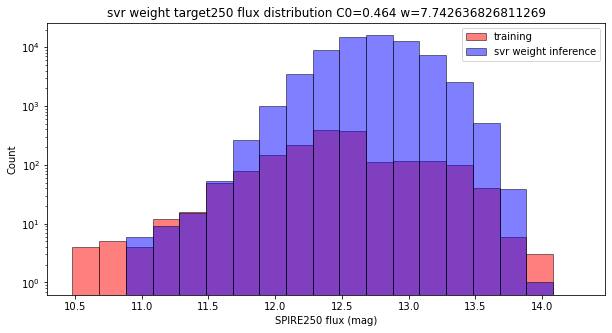

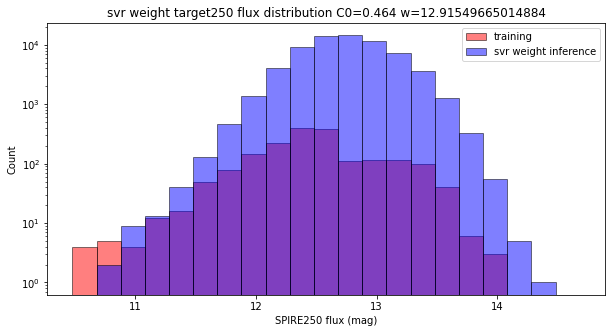

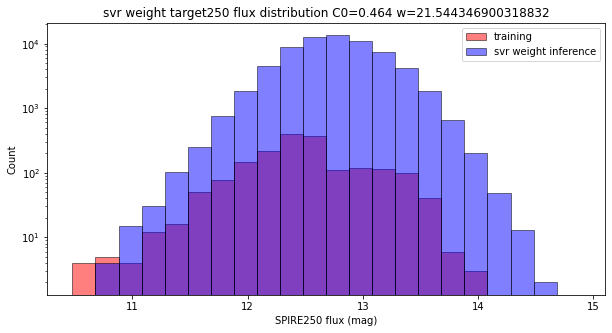

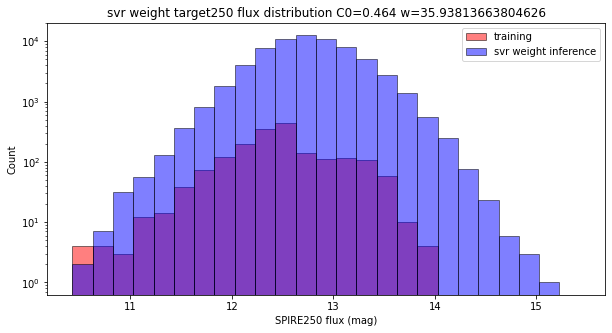

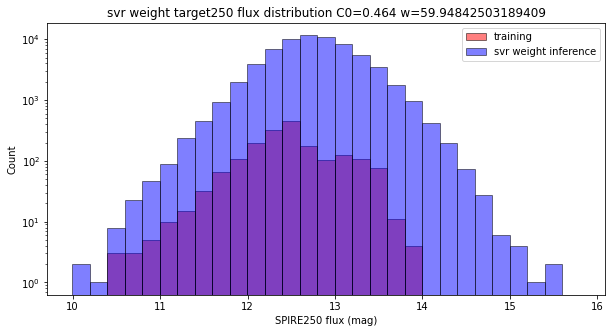

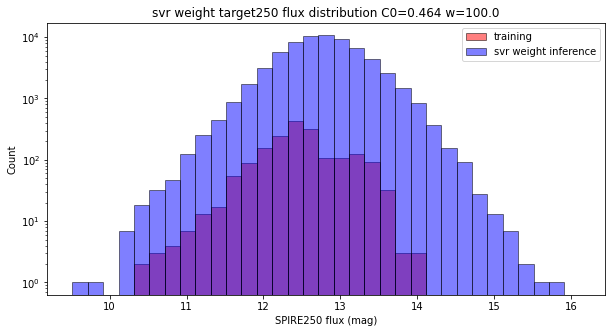

In [37]:
w=np.logspace(0,2,10)
j=0
for i in w:
    fig, axs = plt.subplots(1,figsize=(10,5))
    C=0.464
    gamma=0.07
    epsilon=0.1
#     w=2.54
    kernel='rbf'
    svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)

    # knnre=knn.fit(train250z,y=target250['m250']).predict(testz_imp)

    # X=train250z[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','z']]
    # Yz=testz_imp[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','z']]

    X=train250z
    Y=testz_imp
#     weight=np.abs(np.random.randn(1800))

    svrre=svr.fit(X=train250z,y=target250['m250'],sample_weight=df_weight*i).predict(Y)

    binwidth=0.2
    data=target250['m250']
    data1=svrre
    binmin=np.min([np.min(data),np.min(data1)])
    binmax=np.max([np.max(data),np.max(data1)])
    bins=np.arange(binmin,binmax+2*binwidth,binwidth)


    # plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
    axs.hist(target250['m250'],bins=bins,label='training',edgecolor = 'black',color='r',alpha=0.5)
    axs.hist(svrre,bins=bins,label='svr weight inference',edgecolor = 'black',color='b',alpha=0.5)
    axs.semilogy()
    axs.legend()
    axs.set_xlabel('SPIRE250 flux (mag)')
    axs.set_ylabel('Count')
    axs.set_title('svr weight target250 flux distribution C0=0.464 w=%s'%(i))
    max(target250['m250']),min(target250['m250'])
#     plt.savefig('result/distribution/svr weight target250 flux distribution')
#     plt.savefig('result/distribution/svr weight log distribution C0=0464 w%s'%(j))
    j=j+1

In [45]:
a=np.array([0,1,2,3,4,5,6,7,8])
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [50]:
w=np.logspace(0,2,10)
w=w[1:]
w

array([  1.66810054,   2.7825594 ,   4.64158883,   7.74263683,
        12.91549665,  21.5443469 ,  35.93813664,  59.94842503,
       100.        ])

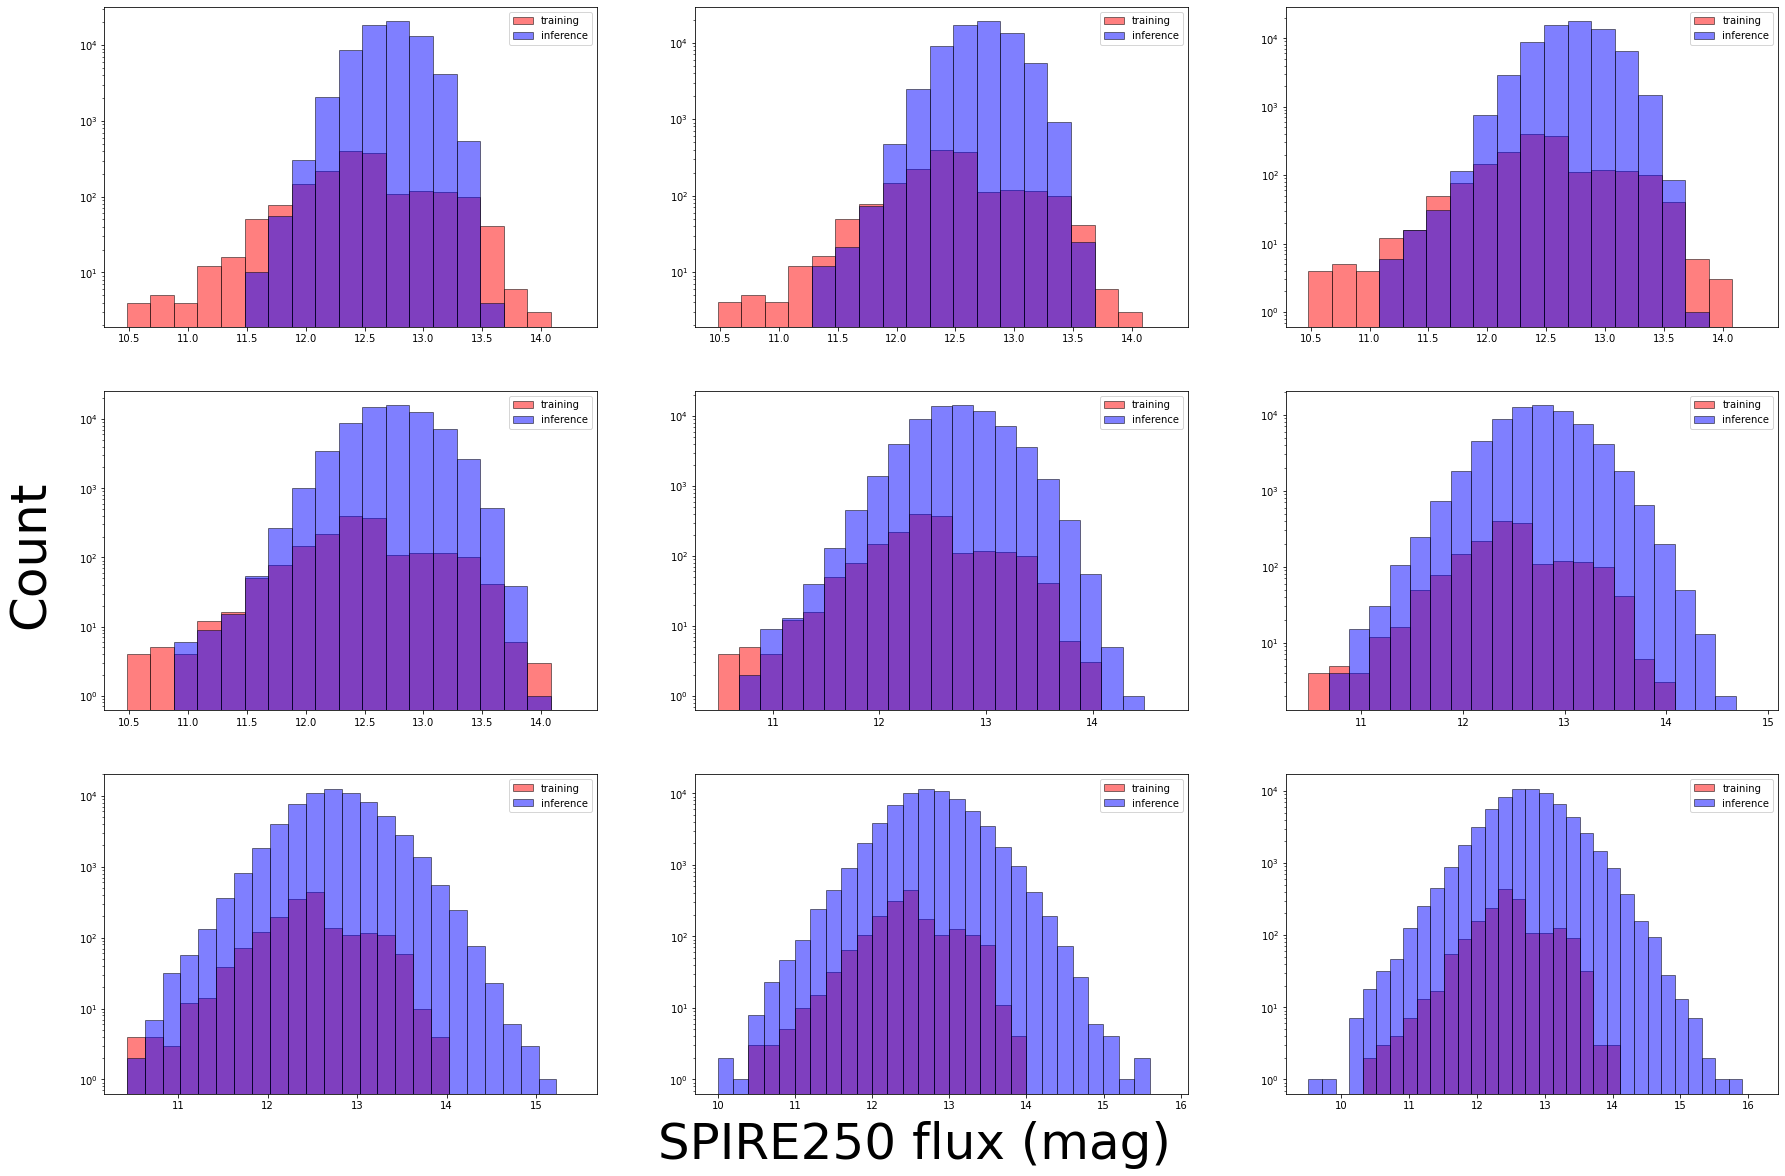

In [268]:
w=np.logspace(0,2,10)
w=w[1:]
j=0

fig, axs = plt.subplots(3,3,figsize=(30,20))
for i in w:
    
    C=0.464
    gamma=0.07
    epsilon=0.1
#     w=2.54
    kernel='rbf'
    svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)

    # knnre=knn.fit(train250z,y=target250['m250']).predict(testz_imp)

    # X=train250z[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','z']]
    # Yz=testz_imp[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','z']]

    X=train250z
    Y=testz_imp
#     weight=np.abs(np.random.randn(1800))

    svrre=svr.fit(X=train250z,y=target250['m250'],sample_weight=df_weight*i).predict(Y)

    binwidth=0.2
    data=target250['m250']
    data1=svrre
    binmin=np.min([np.min(data),np.min(data1)])
    binmax=np.max([np.max(data),np.max(data1)])
    bins=np.arange(binmin,binmax+2*binwidth,binwidth)
    
    a=j//3
    b=j%3
    

    # plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
    axs[a,b].hist(target250['m250'],bins=bins,label='training',edgecolor = 'black',color='r',alpha=0.5)
    axs[a,b].hist(svrre,bins=bins,label='inference',edgecolor = 'black',color='b',alpha=0.5)
    axs[a,b].semilogy()
    axs[a,b].legend()
#     axs[a,b].set_xlabel('SPIRE250 flux (mag)',fontsize=20)
#     axs[a,b].set_ylabel('Count',fontsize=20)
#     axs[a,b].set_title('svr weight target250 flux distribution C0=0.464 w=%s'%(i),fontsize=20)
#     max(target250['m250']),min(target250['m250'])
    j=j+1

    
fig.text(0.5, 0.08, 'SPIRE250 flux (mag)', ha='center',fontsize=50)
fig.text(0.08, 0.5, 'Count', va='center', rotation='vertical',fontsize=50)
# plt.xlabel('SPIRE250 flux (mag)',fontsize=20)
# plt.ylabel('Count',fontsize=20)
# plt.title('weight scale change distribution')
# plt.savefig('result/distribution/svr weight log change')
# plt.savefig('result/distribution/svr weight log change')
    

In [36]:
from sklearn import neighbors
n_neighbors=5

knn=neighbors.KNeighborsRegressor(n_neighbors,weights='distance',p=19)
knn.fit(train250z,y=target250['m250'])

KNeighborsRegressor(p=19, weights='distance')

In [37]:
knnre=knn.predict(testz_imp)

In [38]:
# print(knnre,len(knnre))

[12.62525651 12.73774695 12.70935524 ... 12.95471027 12.42731817
 12.5389483 ] 67710


(13.995, 10.481)

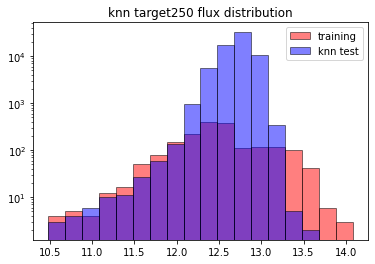

In [65]:
from sklearn import neighbors
n_neighbors=20

knn=neighbors.KNeighborsRegressor(n_neighbors,weights='distance',p=19)

# knnre=knn.fit(train250z,y=target250['m250']).predict(testz_imp)

X=train250z[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','z']]
Yz=testz_imp[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','z']]

knnre=knn.fit(X,y=target250['m250']).predict(Yz)

binwidth=0.2
data=target250['m250']
bins=np.arange(np.min(data), np.max(data) + binwidth, binwidth)
# plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
plt.hist(target250['m250'],bins=bins,label='training',edgecolor = 'black',color='r',alpha=0.5)
plt.hist(knnre,bins=bins,label='knn test',edgecolor = 'black',color='b',alpha=0.5)
plt.semilogy()
plt.legend()
plt.title('knn target250 flux distribution')
max(target250['m250']),min(target250['m250'])
# plt.savefig('result/distribution/knn target250 flux distribution')

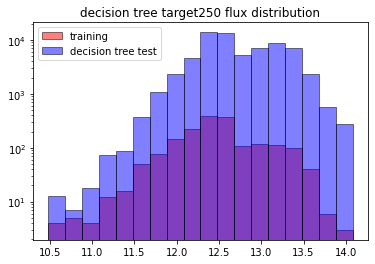

In [61]:
from sklearn import tree
dt=tree.DecisionTreeRegressor()
dtre=dt.fit(train250z,target250['m250']).predict(testz_imp)

binwidth=0.2
data=target250['m250']
bins=np.arange(np.min(data), np.max(data) + binwidth, binwidth)
# plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
plt.hist(target250['m250'],bins=bins,label='training',edgecolor = 'black',color='r',alpha=0.5)
plt.hist(dtre,bins=bins,label='decision tree test',edgecolor = 'black',color='b',alpha=0.5)
plt.semilogy()
plt.legend()
plt.title('decision tree target250 flux distribution')
max(target250['m250']),min(target250['m250'])
# plt.savefig('result/distribution/decision tree target250 flux distribution')

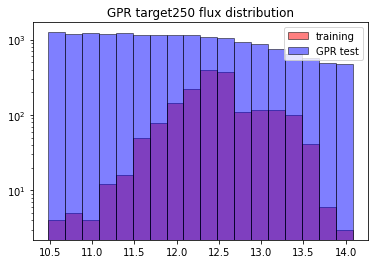

In [62]:
from sklearn import gaussian_process
GPR=gaussian_process.GaussianProcessRegressor()
gprre=GPR.fit(train250z,target250['m250']).predict(testz_imp)

binwidth=0.2
data=target250['m250']
bins=np.arange(np.min(data), np.max(data) + binwidth, binwidth)
# plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
plt.hist(target250['m250'],bins=bins,label='training',edgecolor = 'black',color='r',alpha=0.5)
plt.hist(gprre,bins=bins,label='GPR test',edgecolor = 'black',color='b',alpha=0.5)
plt.semilogy()
plt.legend()
plt.title('GPR target250 flux distribution')
max(target250['m250']),min(target250['m250'])
# plt.savefig('result/distribution/GPR target250 flux distribution')

(13.995, 10.481)

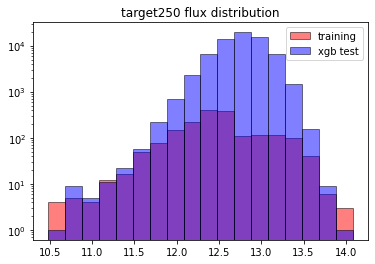

In [57]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor(booster='gbtree',objective="reg:squarederror",gamma=0.01,random_state=42,max_depth=5)
xgbre=xgb_model.fit(train250z,target250['m250']).predict(testz_imp)

binwidth=0.2
data=target250['m250']
bins=np.arange(np.min(data), np.max(data) + binwidth, binwidth)
# plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
plt.hist(target250['m250'],bins=bins,label='training',edgecolor = 'black',color='r',alpha=0.5)
plt.hist(xgbre,bins=bins,label='xgb test',edgecolor = 'black',color='b',alpha=0.5)
plt.semilogy()
plt.legend()
plt.title('target250 flux distribution')
max(target250['m250']),min(target250['m250'])
# plt.savefig('result/distribution/')

(13.995, 10.481)

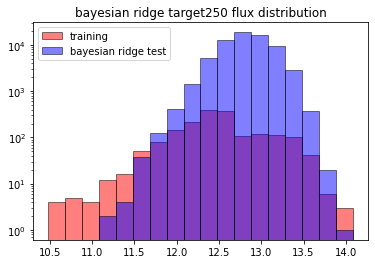

In [70]:
from sklearn import linear_model
baye=linear_model.BayesianRidge()
bayere=baye.fit(train250z,target250['m250']).predict(testz_imp)


binwidth=0.2
data=target250['m250']
bins=np.arange(np.min(data), np.max(data) + binwidth, binwidth)
# plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
plt.hist(target250['m250'],bins=bins,label='training',edgecolor = 'black',color='r',alpha=0.5)
plt.hist(bayere,bins=bins,label='bayesian ridge test',edgecolor = 'black',color='b',alpha=0.5)
plt.semilogy()
plt.legend()
plt.title('bayesian ridge target250 flux distribution')
max(target250['m250']),min(target250['m250'])
# plt.savefig('result/distribution/bayesian ridge target250 flux distribution')

In [48]:
from sklearn import linear_model
def linear_train(X=train250z,y=target250['m250'],C=100,gamma=0.1,epsilon=0.1,kernel='rbf',n_splits=10,test_ratio=0.1,train_ratio=0.9,random_state=0):
    baye=linear_model.BayesianRidge()
#     ss = ShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=0)
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=0)
    kf.get_n_splits(X)
    rmse=[]
    result=[]
    trainind=[]
    testind=[]
    for train_index, test_index in kf.split(X):
        #print("%s %s" % (train_index, test_index))
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]    #set the train test dataset
        result_svr=baye.fit(X_train,y_train).predict(X_test),baye.fit(X_train,y_train).predict(X_train) 
        result+=result_svr[0], y_test,result_svr[1], y_train
#         print(result)
        mse=sklearn.metrics.mean_squared_error(y_test,result_svr[0]),sklearn.metrics.mean_squared_error(y_train,result_svr[1])
        rmse+=[(math.sqrt(mse[0]),math.sqrt(mse[1]))]
#         print(mse,rmse)
        trainind.append(train_index)
        testind.append(test_index)

    #print(rmse)
    #rmse[0][1]
 
    return np.mean([i[0] for i in rmse]),np.mean([i[1] for i in rmse]),rmse,result,kernel,trainind,testind

In [49]:
linere=linear_train(X=train250z)
linere[:2]

(0.4227860242448248, 0.4194442453880424)

In [54]:
from sklearn import neighbors
def knn_train(X=train250z,y=target250['m250'],n_splits=10,test_ratio=0.1,train_ratio=0.9,random_state=0,n_neighbors=5,weights='distance',p=19):
    knn=neighbors.KNeighborsRegressor(n_neighbors=n_neighbors,weights=weights,p=p)
#     ss = ShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=0)
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=0)
    kf.get_n_splits(X)
    rmse=[]
    result=[]
    trainind=[]
    testind=[]
    for train_index, test_index in kf.split(X):
        #print("%s %s" % (train_index, test_index))
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]    #set the train test dataset
        result_svr=knn.fit(X_train,y_train).predict(X_test),knn.fit(X_train,y_train).predict(X_train) 
        result+=result_svr[0], y_test,result_svr[1], y_train
#         print(result)
        mse=sklearn.metrics.mean_squared_error(y_test,result_svr[0]),sklearn.metrics.mean_squared_error(y_train,result_svr[1])
        rmse+=[(math.sqrt(mse[0]),math.sqrt(mse[1]))]
#         print(mse,rmse)
        trainind.append(train_index)
        testind.append(test_index)

    #print(rmse)
    #rmse[0][1]
 
    return np.mean([i[0] for i in rmse]),np.mean([i[1] for i in rmse]),rmse,result,trainind,testind

In [55]:
knnre=knn_train()

In [56]:
knnre[:2]

(0.4423585484629215, 0.0)

In [28]:
htmap=heatmap()

In [29]:
htmap[:-4]

((array([[0.41839304, 0.4166803 , 0.41650313, 0.41779616, 0.41970566,
          0.42345941, 0.4318587 , 0.44373628, 0.46094094, 0.47918007],
         [0.41451988, 0.41411898, 0.41446281, 0.4156842 , 0.41785566,
          0.42068562, 0.42642788, 0.43477406, 0.44689087, 0.46660344],
         [0.41357398, 0.41311754, 0.41410296, 0.41633251, 0.41890752,
          0.42357159, 0.43071285, 0.43444511, 0.44101599, 0.45514885],
         [0.41312111, 0.41353909, 0.4155636 , 0.41866498, 0.42536217,
          0.43385641, 0.44177141, 0.44271384, 0.44290057, 0.45112797],
         [0.41322769, 0.41492742, 0.41813207, 0.42502342, 0.43564182,
          0.45151059, 0.45962015, 0.45572034, 0.44689016, 0.45088508],
         [0.41429645, 0.41687413, 0.4237097 , 0.43281108, 0.45558029,
          0.47563144, 0.47988786, 0.46379933, 0.44824932, 0.45149478],
         [0.41588355, 0.42156113, 0.43081862, 0.44947185, 0.48077121,
          0.5041856 , 0.49383193, 0.46616591, 0.44998353, 0.45149478],
         [0.4

In [30]:
htzmap=heatmap(X=train250z)

In [ ]:
htzmap[:-4]

In [ ]:
are,bre=svr_result()

(13.995, 10.481)

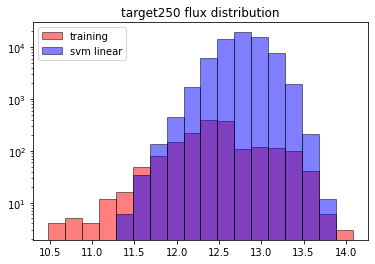

In [31]:
binwidth=0.2
data=target250['m250']
bins=np.arange(np.min(data), np.max(data) + binwidth, binwidth)
# plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
plt.hist(target250['m250'],bins=bins,label='training',edgecolor = 'black',color='r',alpha=0.5)
plt.hist(alin['mean'],bins=bins,label='svm linear',edgecolor = 'black',color='b',alpha=0.5)
plt.semilogy()
plt.legend()
plt.title('target250 flux distribution')
max(target250['m250']),min(target250['m250'])
# plt.savefig('result/distribution/')

(13.995, 10.481)

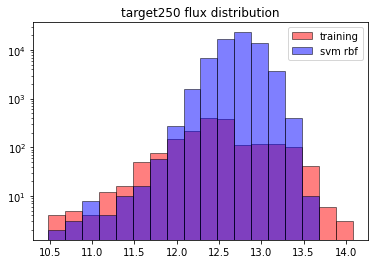

In [42]:
binwidth=0.2
data=target250['m250']
bins=np.arange(np.min(data), np.max(data) + binwidth, binwidth)
plt.hist(target250['m250'],bins=bins,label='training',edgecolor = 'black',color='r',alpha=0.5)
plt.hist(arbf['mean'],bins=bins,label='svm rbf',edgecolor = 'black',color='b',alpha=0.5)
# plt.hist(alin['mean'],bins=20,label='svm linear',edgecolor = 'black',color='b',alpha=0.5)
plt.semilogy()
plt.legend()
plt.title('target250 flux distribution')
max(target250['m250']),min(target250['m250'])

In [30]:
alin,blin=svr_result(test=test_imp,C=1,gamma=0.07,kernel='linear')
# alin

In [10]:
relin=svr_train(C=0.464,gamma=0.07,kernel='linear')

In [11]:
relin[:2]

(0.4239697622809759, 0.4196180596987872)

(13.815597424620881, 11.283888661335109)

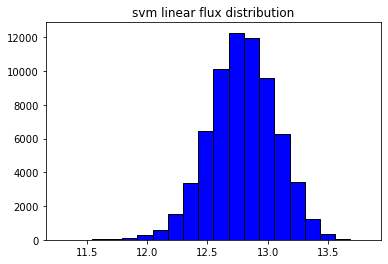

In [15]:
# a.to_csv('result/errtest.csv')
plt.hist(alin['mean'],bins=20,label='svm linear',edgecolor = 'black',color='b')
plt.title('svm linear flux distribution')
max(alin['mean']),min(alin['mean'])

In [32]:
arbf,brbf=svr_result(test=test_imp,C=1,gamma=0.07,kernel='rbf')

(13.538707183275047, 10.627604954172448)

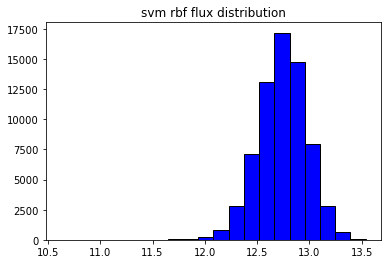

In [18]:
# a.to_csv('result/errtest.csv')
plt.hist(arbf['mean'],bins=20,label='svm rbf',edgecolor = 'black',color='b')
plt.title('svm rbf flux distribution')
max(arbf['mean']),min(arbf['mean'])

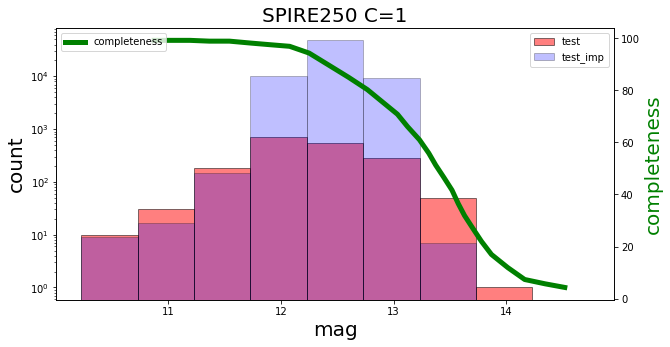

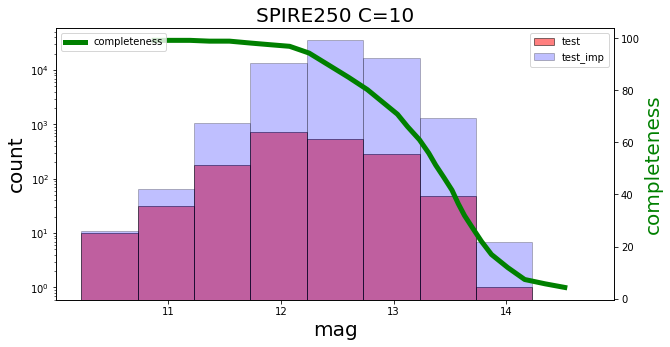

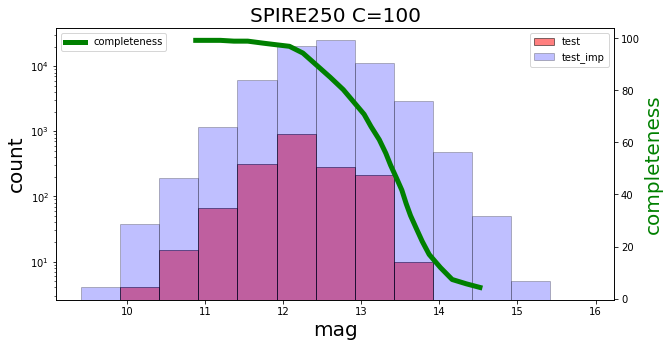

In [67]:
C=[1,10,100]
for i in C:
    zarbf,zbrbf=svr_result(X=train250z,test=testz_imp,C=i,gamma=0.07,kernel='rbf')
    fig, axs = plt.subplots(1,figsize=(10,5))
    x1=target250['m250']
    x2=zarbf['mean']
    # y1=xgbtrain250[col[i]]
    # y2=train250[col[i]]
    binwidth=0.5
    #     counts, bins, bars = plt.hist([x1,x2]) 
    #     count.append(counts)
    #     plt.cla()

    binmin=np.min([np.min(x1),np.min(x2)])
    binmax=np.max([np.max(x1),np.max(x2)])
    bins=np.arange(binmin,binmax+2*binwidth,binwidth)
    axs.semilogy()
    #     counts, bins, bars=axs[i].hist([x1,x2],bins=bins,alpha=0.5,label=label,edgecolor = 'black',color=colors,align='left')
    counts, bins, bars = axs.hist(x1,bins=bins,alpha=0.5,label='test',edgecolor = 'black',color='red',align='left')
    counts, bins, bars = axs.hist(x2,bins=bins,alpha=0.25,label='test_imp',edgecolor = 'black',color='b',align='left')
    #     print(counts,bins,bars)
    #     print(counts[0])

    axs1=axs.twinx()
    axs1.plot(complete[3],complete[1],linewidth=5,label='completeness',color='g')
    axs1.set_ylabel('completeness',fontsize=20,color='g')
    axs1.legend(loc='upper left')

    axs.set_title('SPIRE250 C=%s'%(i),fontsize=20)
    axs.legend()
    axs.set_xlabel('mag',fontsize=20)
    axs.set_ylabel('count',fontsize=20)

    #     plt.show()
#     plt.savefig('result/SPIRE250log distribution with completeness C=%s'%(i))

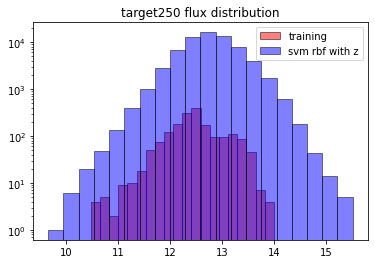

In [37]:
# zarbf,zbrbf=svr_result(X=train250z,test=testz_imp,C=100,gamma=0.07,kernel='rbf')

plt.hist(target250['m250'],bins=20,label='training',edgecolor = 'black',color='r',alpha=0.5)
plt.hist(zarbf['mean'],bins=20,label='svm rbf with z',edgecolor = 'black',color='b',alpha=0.5)
# plt.hist(alin['mean'],bins=20,label='svm linear',edgecolor = 'black',color='b',alpha=0.5)

plt.semilogy()
plt.legend()
plt.title('target250 flux distribution')
# max(target250['m250']),min(target250['m250'])
plt.savefig('result/distribution/C100')

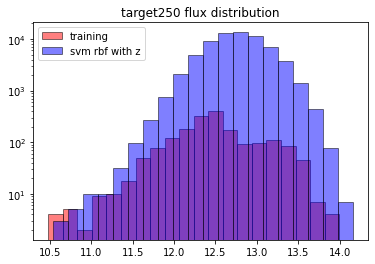

In [34]:
# zarbf,zbrbf=svr_result(X=train250z,test=testz_imp,C=10,gamma=0.07,kernel='rbf')

plt.hist(target250['m250'],bins=20,label='training',edgecolor = 'black',color='r',alpha=0.5)
plt.hist(zarbf['mean'],bins=20,label='svm rbf with z',edgecolor = 'black',color='b',alpha=0.5)
# plt.hist(alin['mean'],bins=20,label='svm linear',edgecolor = 'black',color='b',alpha=0.5)
plt.semilogy()
plt.legend()
plt.title('target250 flux distribution')
max(target250['m250']),min(target250['m250'])
plt.savefig('result/distribution/C10')

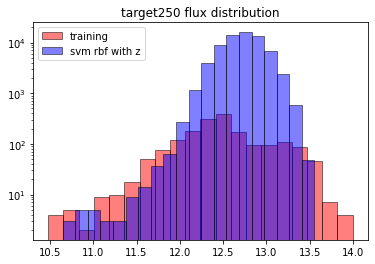

In [35]:
zarbf,zbrbf=svr_result(X=train250z,test=testz_imp,C=1,gamma=0.07,kernel='rbf')

plt.hist(target250['m250'],bins=20,label='training',edgecolor = 'black',color='r',alpha=0.5)
plt.hist(zarbf['mean'],bins=20,label='svm rbf with z',edgecolor = 'black',color='b',alpha=0.5)
# plt.hist(alin['mean'],bins=20,label='svm linear',edgecolor = 'black',color='b',alpha=0.5)
plt.semilogy()
plt.legend()
plt.title('target250 flux distribution')
max(target250['m250']),min(target250['m250'])
plt.savefig('result/distribution/C1')

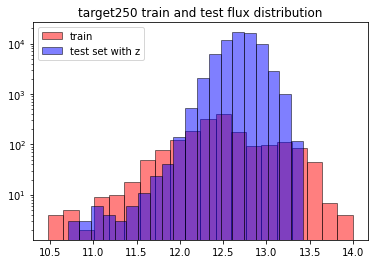

In [9]:
# zarbf,zbrbf=svr_result(X=train250z,test=testz_imp,C=0.464,gamma=0.07,kernel='rbf')

plt.hist(target250['m250'],bins=20,label='train',edgecolor = 'black',color='r',alpha=0.5)
plt.hist(zarbf['mean'],bins=20,label='test set with z',edgecolor = 'black',color='b',alpha=0.5)
# plt.hist(alin['mean'],bins=20,label='svm linear',edgecolor = 'black',color='b',alpha=0.5)
plt.semilogy()
plt.legend()
plt.title('target250 train and test flux distribution')
max(target250['m250']),min(target250['m250'])
# plt.savefig('result/distribution/target250 train and test flux distribution C=0.464,gamma0.07')

In [36]:
atrain=svr_train(X=train250z,y=target250['m250'],C=1,gamma=0.07,kernel='rbf')
atrain[:2]

(0.41562445200234616, 0.3462334178580259)

In [14]:
atrain=svr_train(X=train250z,y=target250['m250'],C=100,gamma=0.07,kernel='rbf')

In [15]:
atrain[:2]

(0.5720556489668874, 0.1421605594206812)

In [27]:
atrain=svr_train(X=train250z,y=target250['m250'],C=10,gamma=0.07,kernel='rbf')

In [28]:
atrain[:2]

(0.4564730021851021, 0.25264070575975023)

In [37]:
a,b=svr_result(test=test_imp.iloc[:5],C=0.464,gamma=0.07)
a

,1,2,3,4,5,6,7,8,9,10,mean,std,rmse,mse,mae,mape
0,12.833838,12.891633,12.805964,12.883579,12.832045,12.742340,12.754783,12.834127,12.903325,12.798651,12.828028,0.054717,0.051909,0.026945,0.042075,3.279934
1,12.632063,12.645613,12.651869,12.578889,12.649612,12.726240,12.730899,12.673680,12.660943,12.649249,12.659906,0.044043,0.041783,0.017458,0.030428,2.403477
2,12.979149,12.899745,12.873124,12.968314,12.906998,13.020901,12.990555,12.896029,12.772852,12.884989,12.919265,0.072431,0.068714,0.047216,0.056371,4.363348
3,12.888349,13.097616,12.926681,13.048120,13.053661,12.983412,12.861491,12.941184,13.052605,13.068776,12.992190,0.083248,0.078976,0.062372,0.071966,5.539187
4,12.731853,12.683855,12.754487,12.681899,12.632750,12.650449,12.665786,12.695883,12.691309,12.736042,12.692431,0.038786,0.036795,0.013539,0.029708,2.340599


In [38]:
e1,e2=svr_result(X=trainerr250,y=targeterr250['m250e'],test=testerr_imp.iloc[:5],C=0.464,gamma=0.07)
e1

,1,2,3,4,5,6,7,8,9,10,mean,std,rmse,mse,mae,mape
0,0.190049,0.189891,0.190098,0.189017,0.189628,0.188983,0.189353,0.190009,0.190263,0.189359,0.189665,0.000464,0.000440,0.000002,0.000397,2.093121
1,0.226692,0.230273,0.229960,0.232128,0.229242,0.227428,0.228650,0.232418,0.226585,0.227085,0.229046,0.002147,0.002036,0.000041,0.001758,7.676095
2,0.193846,0.192988,0.195971,0.192917,0.193338,0.193444,0.194401,0.195203,0.194759,0.193967,0.194084,0.000998,0.000947,0.000009,0.000800,4.122369
3,0.203842,0.205174,0.205433,0.204309,0.204815,0.204029,0.205041,0.204633,0.204211,0.204609,0.204610,0.000516,0.000490,0.000002,0.000410,2.001857
4,0.195884,0.195790,0.197366,0.195838,0.195950,0.195886,0.195868,0.197755,0.196404,0.195769,0.196251,0.000719,0.000682,0.000005,0.000554,2.825351


In [39]:
a,b=svr_result(test=test_imp,C=0.464,gamma=0.07)
a

,1,2,3,4,5,6,7,8,9,10,mean,std,rmse,mse,mae,mape
0,12.833838,12.891633,12.805964,12.883579,12.832045,12.742340,12.754783,12.834127,12.903325,12.798651,12.828028,0.054717,0.051909,0.026945,0.042075,3.279934
1,12.632063,12.645613,12.651869,12.578889,12.649612,12.726240,12.730899,12.673680,12.660943,12.649249,12.659906,0.044043,0.041783,0.017458,0.030428,2.403477
2,12.979149,12.899745,12.873124,12.968314,12.906998,13.020901,12.990555,12.896029,12.772852,12.884989,12.919265,0.072431,0.068714,0.047216,0.056371,4.363348
3,12.888349,13.097616,12.926681,13.048120,13.053661,12.983412,12.861491,12.941184,13.052605,13.068776,12.992190,0.083248,0.078976,0.062372,0.071966,5.539187
4,12.731853,12.683855,12.754487,12.681899,12.632750,12.650449,12.665786,12.695883,12.691309,12.736042,12.692431,0.038786,0.036795,0.013539,0.029708,2.340599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67705,12.151508,12.177697,12.175857,12.178790,12.246909,12.245807,12.162696,12.200087,12.178724,12.203412,12.192149,0.032352,0.030692,0.009420,0.025524,2.093486
67706,12.408819,12.447078,12.449099,12.440086,12.451043,12.457235,12.432508,12.362400,12.395630,12.420933,12.426483,0.030013,0.028473,0.008107,0.023630,1.901593
67707,12.657460,12.648873,12.662119,12.596393,12.701843,12.724708,12.712731,12.695699,12.689012,12.710992,12.679983,0.038905,0.036908,0.013622,0.031017,2.446174
67708,12.484645,12.478639,12.471136,12.476364,12.486118,12.501822,12.426036,12.487115,12.489978,12.490047,12.479190,0.020509,0.019457,0.003786,0.012917,1.035084


In [63]:
train250[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2']]

,N2m,N3m,N4m,S7m,S9m,S11m,L15m,L18m,L24m,w1m,w2m,ir1,ir2
21,19.120000,18.806000,19.432000,20.769892,18.655000,17.831000,18.302000,18.084000,17.997180,19.083000,19.559000,19.153000,19.369000
105,18.813000,18.536000,18.967000,21.543671,20.434642,19.576404,18.566575,19.230274,18.850934,19.065000,19.868000,19.072000,19.459000
235,21.187886,20.507798,20.635990,18.912000,18.549000,17.533000,16.588000,16.272000,15.695000,20.889000,20.715000,20.586000,20.417000
353,17.872000,18.159000,18.590000,17.868000,16.347795,15.713040,16.607594,16.828061,16.820837,18.329000,18.538000,18.363000,18.316000
381,19.052000,18.714000,19.027000,18.782000,17.663000,17.262000,17.007000,17.158000,16.697000,18.761000,19.023000,18.589000,18.804000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91331,18.619000,18.505000,18.512000,19.114617,18.948000,18.106000,16.564000,16.328000,16.139919,18.814000,18.911000,18.526110,18.690089
91374,20.370000,19.984000,20.738000,21.724963,20.598288,19.103432,18.227227,18.248433,18.037607,20.187000,21.089000,20.168000,20.207000
91385,19.061000,18.739000,18.805000,19.621944,18.974630,18.541107,18.021213,18.215000,18.559131,19.415459,20.085006,19.982000,20.287000
91690,16.965000,17.374000,17.708000,17.276000,16.394000,16.106000,15.991000,15.654000,15.078378,17.594000,17.788000,17.514000,17.628000


In [65]:
a,b=svr_result(X=train250[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2']],test=test_imp[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2']],C=0.464,gamma=0.07)
# a

(13.24350345200806, 10.783050863850372)

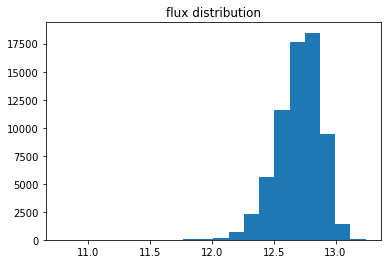

In [66]:
# a.to_csv('result/errtest.csv')
plt.hist(a['mean'],bins=20)
plt.title('flux distribution')
max(a['mean']),min(a['mean'])

In [49]:
e1,e2=svr_result(X=trainerr250,y=targeterr250['m250e'],test=testerr_imp,C=0.464,gamma=0.07)
e1

,1,2,3,4,5,6,7,8,9,10,mean,std,rmse,mse,mae,mape
0,0.190049,0.189891,0.190098,0.189017,0.189628,0.188983,0.189353,0.190009,0.190263,0.189359,0.189665,0.000464,0.000440,0.000002,0.000397,2.093121
1,0.226692,0.230273,0.229960,0.232128,0.229242,0.227428,0.228650,0.232418,0.226585,0.227085,0.229046,0.002147,0.002036,0.000041,0.001758,7.676095
2,0.193846,0.192988,0.195971,0.192917,0.193338,0.193444,0.194401,0.195203,0.194759,0.193967,0.194084,0.000998,0.000947,0.000009,0.000800,4.122369
3,0.203842,0.205174,0.205433,0.204309,0.204815,0.204029,0.205041,0.204633,0.204211,0.204609,0.204610,0.000516,0.000490,0.000002,0.000410,2.001857
4,0.195884,0.195790,0.197366,0.195838,0.195950,0.195886,0.195868,0.197755,0.196404,0.195769,0.196251,0.000719,0.000682,0.000005,0.000554,2.825351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67705,0.195623,0.196172,0.194526,0.197637,0.195182,0.193711,0.193764,0.197775,0.195120,0.194262,0.195377,0.001453,0.001378,0.000019,0.001140,5.832948
67706,0.177946,0.176800,0.175736,0.176857,0.176560,0.174244,0.174876,0.178757,0.177727,0.175733,0.176524,0.001407,0.001334,0.000018,0.001101,6.237822
67707,0.230365,0.234259,0.233710,0.235411,0.232621,0.231313,0.232972,0.234388,0.230108,0.231877,0.232702,0.001780,0.001688,0.000028,0.001446,6.212217
67708,0.203304,0.204558,0.204357,0.204748,0.203827,0.202927,0.203369,0.205497,0.203270,0.203533,0.203939,0.000818,0.000776,0.000006,0.000681,3.338040


In [59]:
max(target250['m250']),min(target250['m250'])

(13.995, 10.481)

0.33330116399847043

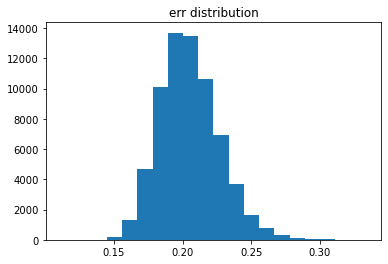

In [52]:
# a.to_csv('result/errtest.csv')
plt.hist(e1['mean'],bins=20)
plt.title('err distribution')
max(e1['mean'])

In [38]:
re=svr(X=train250,y=target250['m250'],test=test_imp)

In [39]:
re1=svr(X=train250,y=target250['m250'],test=test_imp)

In [ ]:
num=len(re[3])/4
x=[4*i for i in range(int(num))]
result=[]
resultall=[]
for i in x:
    result.append(re[3][i])
    resultall.append(re[3][i+2])
result

In [28]:
reh=heatmap(y=target250['m250'])

In [111]:
targeterr250

,m250e
21,0.231
105,0.199
235,0.223
353,0.225
381,0.154
...,...
91331,0.203
91374,0.207
91385,0.337
91690,0.139


In [112]:
reerr=svr(X=trainerr250,y=targeterr250['m250e'],C=0.464,gamma=0.07)

In [29]:
reh[2],reh[3],reh[4],reh[5]

(10.0, 0.01, 0.4089570922617692, 0.3813166780967185)

In [30]:
reh3=heatmap(X=train350,y=target350['m350'])

In [31]:
reh3[2],reh3[3],reh3[4],reh3[5]

(1.0, 0.01, 0.5146203186524017, 0.500248523602663)

In [34]:
reh5=heatmap(X=train500,y=target500['m500'])

In [35]:
reh5[2],reh5[3],reh5[4],reh5[5]

(0.46415888336127786,
 0.0774263682681127,
 0.4368669615417476,
 0.3608691711884794)

In [98]:
re=svr(y=target250['m250'],C=0.464,gamma=0.07)

In [99]:
re[3][2]

array([12.6193792 , 12.5417804 , 12.53521363, ..., 12.94615436,
       12.28215395, 12.31175901])

In [100]:
num=len(re[3])/4
x=[4*i for i in range(int(num))]
result=[]
resultall=[]
for i in x:
    result.append(re[3][i])
    resultall.append(re[3][i+2])
# result

In [101]:
result=pd.DataFrame(data=result)
result=pd.DataFrame(data=result.T)
# result

In [102]:
resultall=pd.DataFrame(data=resultall)
resultall=pd.DataFrame(data=resultall.T)


In [103]:
result

,0,1,2,3,4,5,6,7,8,9
0,12.681012,12.339877,12.659849,12.766863,12.680010,12.607347,12.415647,12.560663,12.240822,11.936850
1,12.332404,12.773020,12.399523,12.586910,12.682376,12.444705,12.417409,12.272620,12.549219,12.425078
2,12.219917,12.328015,12.676037,12.614530,12.315404,12.328743,12.646300,12.368732,12.289272,12.339931
3,12.324429,12.296717,11.995066,12.599742,12.622977,12.737300,12.689339,12.684974,12.224987,12.386583
4,11.573387,12.751174,12.851398,12.445180,12.521257,12.783954,12.515482,12.226434,12.950237,12.432620
...,...,...,...,...,...,...,...,...,...,...
175,12.537572,12.349376,11.957650,12.177638,12.536166,12.359640,12.052012,11.961253,12.388949,12.650946
176,12.614010,12.630526,12.623424,12.290278,12.931022,12.454522,12.600848,12.230923,12.125806,12.270559
177,12.415463,12.447813,12.528839,12.766840,12.356366,12.384447,12.131875,12.640347,12.318147,12.303617
178,12.510228,12.348559,12.258602,12.556958,12.868067,12.127738,12.266684,12.094109,13.046110,12.722676
